In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as clr
from functions import *
import matplotlib.animation as animation
from tqdm import tqdm
from joblib import Parallel, delayed
from scipy import stats
from pycircstat import watson_williams
from pycircstat import resultant_vector_length
from scipy.stats import linregress
from scipy.stats import circstd

# Neural angle, effect of FFHFS

## For Penny

In [37]:
monkey = 'penny'
times = np.arange(2000, 3300, 10)
centering = 'go'
stats = np.load('stats_'+monkey+'_go_validt_tr_ordering_[10, 10, 25, 25]_windowsize_10.npy', allow_pickle=True)

In [56]:
T_start = 50
T_end = 85
print(times[T_start], times[T_end])

targets_to_consider = [1,2,3,5,6,7] 

2500 2850


In [57]:
# getting the radius of the projections on the TDR plane
radii = np.abs(stats[:,2])
radii_ct8 = np.abs(stats[:,3])
rr = radii/radii_ct8 # this is the radius ratio

angles = stats[:,1,:]

radius_ratio = [np.array([])]*4
for t in range(T_start,T_end):#range(times.shape[0]):
    for cond in range(4):
        radius_ratio[cond] = np.concatenate((radius_ratio[cond], rr[t,cond].ravel()))

Text(0.5, 1.0, 'Radius of neural-states projected on the target related plane for a given \n condition over the radius found for cont8 from 2550 to 2800 ms')

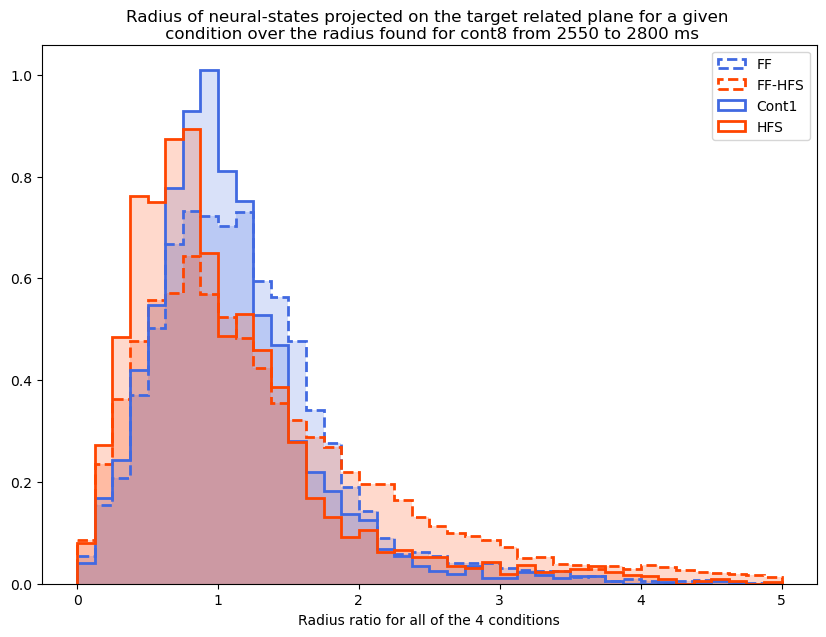

In [58]:
cond_list = ['FF', 'FF-HFS', 'Cont1', 'HFS']
colors = ['royalblue', 'orangered', 'royalblue', 'orangered']
linestyles = ['--', '--', '-', '-']
plt.figure(figsize =(10,7))
plt.rcParams['svg.fonttype'] = 'none'

for cond in range(4):
    plt.hist(radius_ratio[cond], density=True, range = (0,5), bins = 40, label = cond_list[cond], alpha = 1, histtype='step', linewidth = 2, color = colors[cond], linestyle=linestyles[cond])
    plt.hist(radius_ratio[cond], density=True, range = (0,5), bins = 40, alpha = 0.2, histtype='stepfilled', color = colors[cond])
plt.legend()

plt.xlabel('Radius ratio for all of the 4 conditions')
plt.title('Radius of neural-states projected on the target related plane for a given \n condition over the radius found for cont8 from 2550 to 2800 ms', wrap = True)

#plt.savefig(monkey+'_radius_ratio_'+centering+'.svg', transparent=True, bbox_inches="tight")

In [59]:
rr_thresh = 0.5

rvl_ff = np.zeros(120)
rvl_ffhfs = np.zeros(120)
rvl_cont1 = np.zeros(120)
rvl_hfs = np.zeros(120)


for T in range(120):
    (ang_reor_ff, rr_reor_ff, ang_reor_ffhfs, rr_reor_ffhfs, ang_reor_cont1, rr_reor_cont1, ang_reor_hfs, rr_reor_hfs) = get_reor_vars(angles, rr,T,T+10, targets_to_consider)
    
    selec_angle_ffhfs = ang_reor_ffhfs[:,:][(rr_reor_ffhfs[:,:]>rr_thresh)]
    rvl_ffhfs[T] = resultant_vector_length(selec_angle_ffhfs)
    
    selec_angle_ff = ang_reor_ff[:,:][(rr_reor_ff[:,:]>rr_thresh)]
    rvl_ff[T] = resultant_vector_length(selec_angle_ff)
    
    selec_angle_hfs = ang_reor_hfs[:,:][(rr_reor_hfs[:,:]>rr_thresh)]
    rvl_hfs[T] = resultant_vector_length(selec_angle_hfs)
    
    selec_angle_cont1 = ang_reor_cont1[:,:][(rr_reor_cont1[:,:]>rr_thresh)]
    rvl_cont1[T] = resultant_vector_length(selec_angle_cont1)


Text(0.5, 1.0, 'Resultant vector length for a distribution of neural angles over many trials at a given time.\n Only the trials with a radius ratio greater than 0.5 were selected')

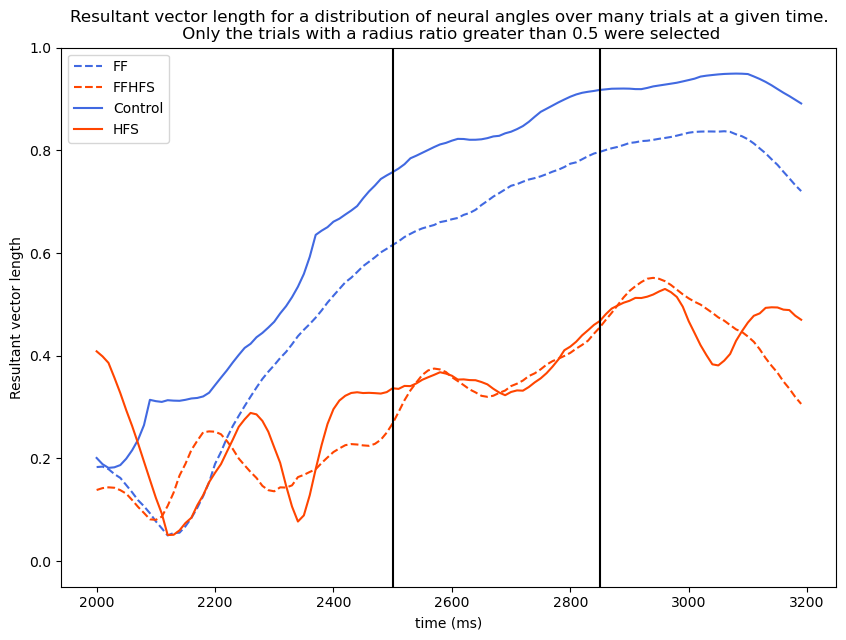

In [60]:
plt.figure(figsize = (10,7))
plt.rcParams['svg.fonttype'] = 'none'

plt.plot(times[:-10],rvl_ff, color = 'royalblue', linestyle = '--', label = 'FF')
plt.plot(times[:-10],rvl_ffhfs, color = 'orangered', linestyle = '--', label = 'FFHFS')
plt.plot(times[:-10],rvl_cont1, color = 'royalblue', label = 'Control')
plt.plot(times[:-10],rvl_hfs, color = 'orangered', label = 'HFS')

plt.vlines(times[T_start], -1, 1, color='k')
plt.vlines(times[T_end], -1, 1, color='k')
plt.ylim(-0.05, 1)
plt.xlabel('time (ms)')
plt.ylabel('Resultant vector length')
plt.legend()
plt.title('Resultant vector length for a distribution of neural angles over many trials at a given time.\n Only the trials with a radius ratio greater than %s were selected'%rr_thresh )
#plt.savefig(monkey+'_RVL_'+centering+'.svg', transparent=True, bbox_inches="tight")

### DIR 1 2

In [61]:
rr_thresh = 0.5

# DO THE PLOT OF THE RVL

rvl_ff_dir1 = np.zeros(120)
rvl_ffhfs_dir1 = np.zeros(120)
rvl_ff_dir2 = np.zeros(120)
rvl_ffhfs_dir2 = np.zeros(120)
rvl_cont1 = np.zeros(120)
rvl_hfs = np.zeros(120)


for T in range(120):
    (ang_reor_ff_dir1, rr_reor_ff_dir1, ang_reor_ffhfs_dir1, rr_reor_ffhfs_dir1, ang_reor_ff_dir2, rr_reor_ff_dir2, ang_reor_ffhfs_dir2, rr_reor_ffhfs_dir2, ang_reor_cont1, rr_reor_cont1, ang_reor_hfs, rr_reor_hfs) = get_vars_dir12(angles, rr,T,T+10, targets_to_consider)
    
    selec_angle_ffhfs_dir1 = ang_reor_ffhfs_dir1[:,:][(rr_reor_ffhfs_dir1[:,:]>rr_thresh)]
    rvl_ffhfs_dir1[T] = resultant_vector_length(selec_angle_ffhfs_dir1)
    
    selec_angle_ff_dir1 = ang_reor_ff_dir1[:,:][(rr_reor_ff_dir1[:,:]>rr_thresh)]
    rvl_ff_dir1[T] = resultant_vector_length(selec_angle_ff_dir1)
    
    selec_angle_ffhfs_dir2 = ang_reor_ffhfs_dir2[:,:][(rr_reor_ffhfs_dir2[:,:]>rr_thresh)]
    rvl_ffhfs_dir2[T] = resultant_vector_length(selec_angle_ffhfs_dir2)
    
    selec_angle_ff_dir2 = ang_reor_ff_dir2[:,:][(rr_reor_ff_dir2[:,:]>rr_thresh)]
    rvl_ff_dir2[T] = resultant_vector_length(selec_angle_ff_dir2)
    
    
    selec_angle_hfs = ang_reor_hfs[:,:][(rr_reor_hfs[:,:]>rr_thresh)]
    rvl_hfs[T] = resultant_vector_length(selec_angle_hfs)
    
    selec_angle_cont1 = ang_reor_cont1[:,:][(rr_reor_cont1[:,:]>rr_thresh)]
    rvl_cont1[T] = resultant_vector_length(selec_angle_cont1)

Text(0.5, 1.0, 'DIR 2')

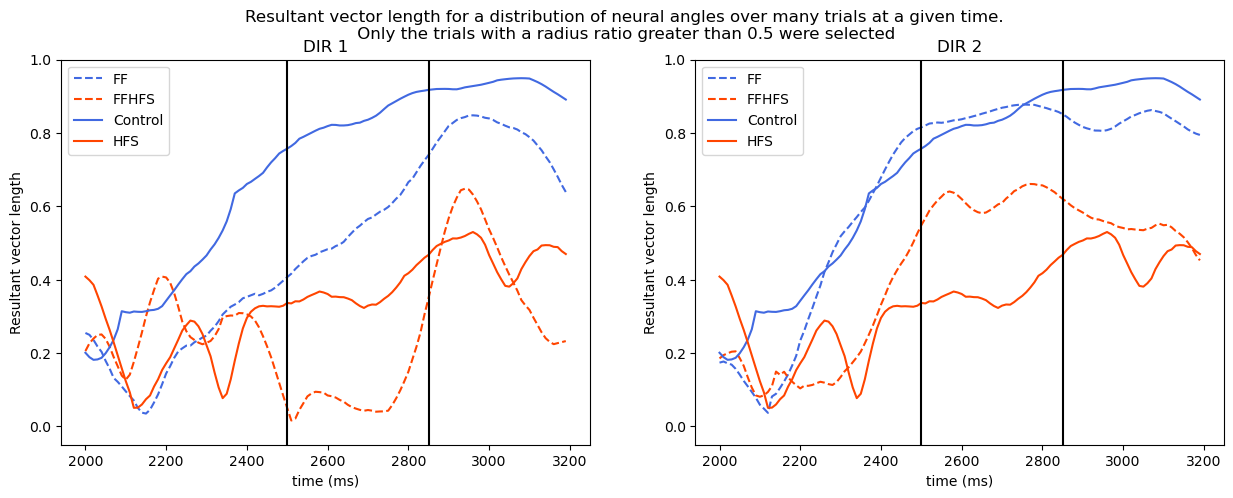

In [62]:
fig, ax = plt.subplots(1, 2, figsize = (15,5), dpi = 100)
plt.rcParams['svg.fonttype'] = 'none'

ax[0].plot(times[:-10],rvl_ff_dir1, color = 'royalblue', linestyle = '--', label = 'FF')
ax[0].plot(times[:-10],rvl_ffhfs_dir1, color = 'orangered', linestyle = '--', label = 'FFHFS')
ax[0].plot(times[:-10],rvl_cont1, color = 'royalblue', label = 'Control')
ax[0].plot(times[:-10],rvl_hfs, color = 'orangered', label = 'HFS')

ax[0].vlines(times[T_start], -1, 1, color='k')
ax[0].vlines(times[T_end], -1, 1, color='k')
ax[0].set_ylim(-0.05, 1)
ax[0].set_xlabel('time (ms)')
ax[0].set_ylabel('Resultant vector length')
ax[0].legend()
ax[0].set_title('DIR 1')

plt.suptitle('Resultant vector length for a distribution of neural angles over many trials at a given time.\n Only the trials with a radius ratio greater than %s were selected'%rr_thresh )


ax[1].plot(times[:-10],rvl_ff_dir2, color = 'royalblue', linestyle = '--', label = 'FF')
ax[1].plot(times[:-10],rvl_ffhfs_dir2, color = 'orangered', linestyle = '--', label = 'FFHFS')
ax[1].plot(times[:-10],rvl_cont1, color = 'royalblue', label = 'Control')
ax[1].plot(times[:-10],rvl_hfs, color = 'orangered', label = 'HFS')

ax[1].vlines(times[T_start], -1, 1, color='k')
ax[1].vlines(times[T_end], -1, 1, color='k')
ax[1].set_ylim(-0.05, 1)
ax[1].set_xlabel('time (ms)')
ax[1].set_ylabel('Resultant vector length')
ax[1].legend()
ax[1].set_title('DIR 2')


#plt.savefig(monkey+'_RVL_'+centering+'.svg', transparent=True, bbox_inches="tight")

In [63]:
(ang_reor_ff_dir1, rr_reor_ff_dir1, ang_reor_ffhfs_dir1, rr_reor_ffhfs_dir1, ang_reor_ff_dir2, rr_reor_ff_dir2, ang_reor_ffhfs_dir2, rr_reor_ffhfs_dir2, ang_reor_cont1, rr_reor_cont1, ang_reor_hfs, rr_reor_hfs) = get_vars_dir12(angles, rr,T_start,T_end, targets_to_consider)

In [64]:
starting_trial = 0


dir1_angle = []
dir2_angle = []

for (ang_reor,rr_reor) in [(ang_reor_ff_dir1, rr_reor_ff_dir1), (ang_reor_ffhfs_dir1, rr_reor_ffhfs_dir1), (ang_reor_cont1, rr_reor_cont1), (ang_reor_hfs, rr_reor_hfs)]:

    dir1_angle.append(ang_reor[:,starting_trial:][(rr_reor[:,starting_trial:]>rr_thresh)])

total_percent_data_dir1 =(rr_reor_ffhfs_dir1[:,starting_trial:]>rr_thresh).sum()/ang_reor_ffhfs_dir1[:,starting_trial:].ravel().shape[0]


for (ang_reor,rr_reor) in [(ang_reor_ff_dir2, rr_reor_ff_dir2), (ang_reor_ffhfs_dir2, rr_reor_ffhfs_dir2), (ang_reor_cont1, rr_reor_cont1), (ang_reor_hfs, rr_reor_hfs)]:

    dir2_angle.append(ang_reor[:,starting_trial:][(rr_reor[:,starting_trial:]>rr_thresh)])

total_percent_data_dir2 =(rr_reor_ffhfs_dir2[:,starting_trial:]>rr_thresh).sum()/ang_reor_ffhfs_dir2[:,starting_trial:].ravel().shape[0]


In [65]:
print(total_percent_data_dir1, total_percent_data_dir2)

0.8025925925925926 0.8964814814814814


In [66]:
avg_angles = np.zeros((4,2))
for i in range(4):
    avg_angles[i,0] = compute_angle_average(dir1_angle[i])
for i in range(4):
    avg_angles[i,1] = compute_angle_average(dir2_angle[i])


/var/folders/tz/7jgtwmdx0rzbplvnb9_wvmp00000gp/T/ipykernel_56924/3028468447.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set_xticklabels(label)
/var/folders/tz/7jgtwmdx0rzbplvnb9_wvmp00000gp/T/ipykernel_56924/3028468447.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,0].set_xticklabels(label)
/var/folders/tz/7jgtwmdx0rzbplvnb9_wvmp00000gp/T/ipykernel_56924/3028468447.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_xticklabels(label)
/var/folders/tz/7jgtwmdx0rzbplvnb9_wvmp00000gp/T/ipykernel_56924/3028468447.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,1].set_xticklabels(label)
/var/folders/tz/7jgtwmdx

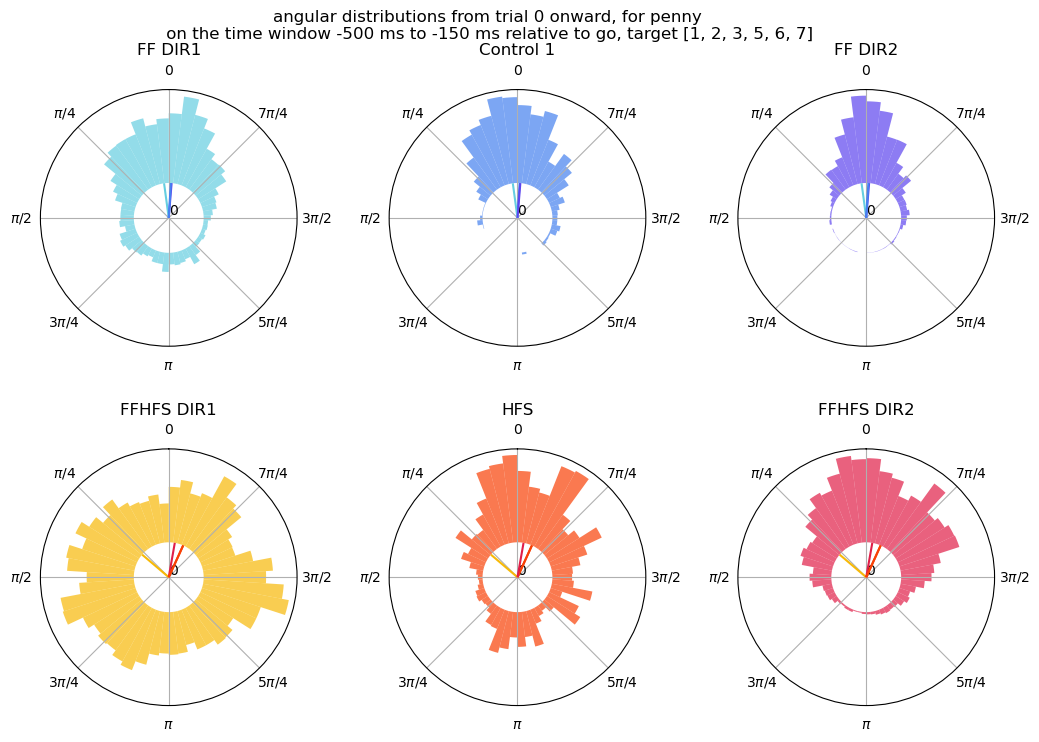

In [67]:
N = 50


label = ['$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$',
                  r'$\pi$', r'$5\pi/4$', r'$3\pi/2$', r'$7\pi/4$']


colors = np.array([[(69, 130, 240), (101, 207, 225),  (93, 69, 240)],
                  [(249, 65, 6) , (248, 186, 7), (225, 30, 72)]])/256


fig, ax = plt.subplots(2, 3, figsize = (24,8), dpi = 100, subplot_kw={'projection': 'polar'})
plt.subplots_adjust(hspace=0.4, wspace = -0.7)
plt.rcParams['svg.fonttype'] = 'none'



barsc = ax[0,0].hist(dir1_angle[0], bins = N, density = True, bottom = 0, alpha = 0.7, range = (-np.pi, np.pi), color = colors[0,1])
ax[0,0].clear()
bottom = barsc[0].max()*0.4
ax[0,0].set_theta_zero_location("N")
bars = ax[0,0].hist(dir1_angle[0], bins = N, density = True, bottom =bottom, alpha = 0.7, range = (-np.pi, np.pi), color = colors[0,1])
ax[0,0].vlines(avg_angles[0], ymin = 0, ymax = bottom, colors = colors[0,1:3])
ax[0,0].vlines(avg_angles[2,0], ymin = 0, ymax = bottom, colors = colors[0,0])
ax[0,0].set_title('FF DIR1')
ax[0,0].set_rgrids([0])
ax[0,0].set_xticklabels(label)

barsc = ax[1,0].hist(dir1_angle[1], bins = N, density = True, bottom=0, alpha = 0.7, range = (-np.pi, np.pi), color = colors[1,1])
ax[1,0].clear()
bottom = barsc[0].max()*0.4
ax[1,0].set_theta_zero_location("N")
bars = ax[1,0].hist(dir1_angle[1], bins = N, density = True, bottom=bottom, alpha = 0.7, range = (-np.pi, np.pi), color = colors[1,1])
ax[1,0].vlines(avg_angles[1], ymin = 0, ymax = bottom, colors = colors[1,1:3])
ax[1,0].vlines(avg_angles[3], ymin = 0, ymax = bottom, colors = colors[1,0])
ax[1,0].set_rgrids([0])
ax[1,0].set_xticklabels(label)
ax[1,0].set_title('FFHFS DIR1')

barsc = ax[0,1].hist(dir1_angle[2], bins = N, density = True, bottom=0, alpha = 0.7, range = (-np.pi, np.pi), color = colors[0,0])
ax[0,1].clear()
bottom = barsc[0].max()*0.4
ax[0,1].set_theta_zero_location("N")
bars = ax[0,1].hist(dir1_angle[2], bins = N, density = True, bottom=bottom, alpha = 0.7, range = (-np.pi, np.pi), color = colors[0,0])
ax[0,1].vlines(avg_angles[2,0], ymin = 0, ymax = bottom, colors = colors[0,0])
ax[0,1].vlines(avg_angles[0], ymin = 0, ymax = bottom, colors = colors[0,1:3])
ax[0,1].set_rgrids([0])
ax[0,1].set_xticklabels(label)
ax[0,1].set_title('Control 1')


barsc = ax[1,1].hist(dir1_angle[3], bins = N, density = True, bottom=0, alpha = 0.7, range = (-np.pi, np.pi), color = colors[1,0])
ax[1,1].clear()
bottom = barsc[0].max()*0.4
ax[1,1].set_theta_zero_location("N")
bars = ax[1,1].hist(dir1_angle[3], bins = N, density = True, bottom=bottom, alpha = 0.7, range = (-np.pi, np.pi), color = colors[1,0])
ax[1,1].vlines(avg_angles[3], ymin = 0, ymax = bottom, colors = colors[1,0])
ax[1,1].vlines(avg_angles[1], ymin = 0, ymax = bottom, colors = colors[1,1:3])
ax[1,1].set_rgrids([0])
ax[1,1].set_xticklabels(label)
ax[1,1].set_title('HFS')

barsc = ax[0,2].hist(dir2_angle[0], bins = N, density = True, bottom=0, alpha = 0.7, range = (-np.pi, np.pi), color = colors[0,2])
ax[0,2].clear()
bottom = barsc[0].max()*0.4
ax[0,2].set_theta_zero_location("N")
bars = ax[0,2].hist(dir2_angle[0], bins = N, density = True, bottom=bottom, alpha = 0.7, range = (-np.pi, np.pi), color = colors[0,2])
ax[0,2].vlines(avg_angles[0], ymin = 0, ymax = bottom, colors = colors[0,1:3])
ax[0,2].vlines(avg_angles[2,0], ymin = 0, ymax = bottom, colors = colors[0,0])
ax[0,2].set_rgrids([0])
ax[0,2].set_xticklabels(label)
ax[0,2].set_title('FF DIR2')

barsc = ax[1,2].hist(dir2_angle[1], bins = N, density = True, bottom=0, alpha = 0.7, range = (-np.pi, np.pi), color = colors[1,2])
ax[1,2].clear()
bottom = barsc[0].max()*0.4
ax[1,2].set_theta_zero_location("N")
bars = ax[1,2].hist(dir2_angle[1], bins = N, density = True, bottom=bottom, alpha = 0.7, range = (-np.pi, np.pi), color = colors[1,2])
ax[1,2].vlines(avg_angles[1], ymin = 0, ymax = bottom, colors = colors[1,1:3])
ax[1,2].vlines(avg_angles[3], ymin = 0, ymax = bottom, colors = colors[1,0])
ax[1,2].set_rgrids([0])
ax[1,2].set_xticklabels(label)
ax[1,2].set_title('FFHFS DIR2')

#leg = fig.legend()
# Use custom colors and opacity
#for r, bar in zip(radii, bars):
#    bar.set_facecolor(plt.cm.jet(r / 10.))
#   bar.set_alpha(0.8)

plt.suptitle('angular distributions from trial %d '%(starting_trial)+'onward, for ' +monkey
          +'\n on the time window %d ms to %d ms relative to go'%(times[T_start]-3000, times[T_end]-3000)+', target %s' %targets_to_consider)



#plt.savefig('ang_dev_circles_'+monkey+'_cwVccw_target%s_time_window_%d_to_%d_'%(targets_to_consider,times[T_start], times[T_end])+centering+'.svg', transparent=True, bbox_inches="tight")
plt.show()

## For Sophie

In [19]:
monkey = 'sophie'
times = np.arange(2000, 3300, 10)
centering = 'go'
stats = np.load('stats_'+monkey+'_go_validt_tr_ordering_[15, 15, 25, 25]_windowsize_10.npy', allow_pickle=True)

In [20]:
T_start = 50
T_end = 85
print(times[T_start], times[T_end])

targets_to_consider = [1,2,3,5,6,7] 

2500 2850


In [21]:
# getting the radius of the projections on the TDR plane
radii = np.abs(stats[:,2])
radii_ct8 = np.abs(stats[:,3])
rr = radii/radii_ct8 # this is the radius ratio

angles = stats[:,1,:]

radius_ratio = [np.array([])]*4
for t in range(T_start,T_end):#range(times.shape[0]):
    for cond in range(4):
        radius_ratio[cond] = np.concatenate((radius_ratio[cond], rr[t,cond].ravel()))

/var/folders/tz/7jgtwmdx0rzbplvnb9_wvmp00000gp/T/ipykernel_56924/1167106644.py:4: RuntimeWarning: invalid value encountered in divide
  rr = radii/radii_ct8 # this is the radius ratio


Text(0.5, 1.0, 'Radius of neural-states projected on the target related plane for a given \n condition over the radius found for cont8 from 2550 to 2800 ms')

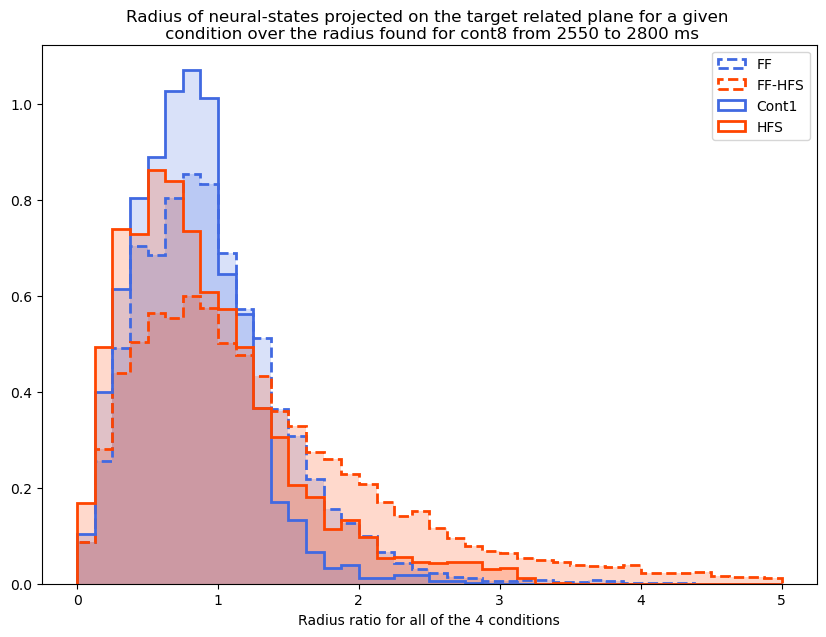

In [22]:
cond_list = ['FF', 'FF-HFS', 'Cont1', 'HFS']
colors = ['royalblue', 'orangered', 'royalblue', 'orangered']
linestyles = ['--', '--', '-', '-']
plt.figure(figsize =(10,7))
plt.rcParams['svg.fonttype'] = 'none'


for cond in range(4):
    plt.hist(radius_ratio[cond], density=True, range = (0,5), bins = 40, label = cond_list[cond], alpha = 1, histtype='step', linewidth = 2, color = colors[cond], linestyle=linestyles[cond])
    plt.hist(radius_ratio[cond], density=True, range = (0,5), bins = 40, alpha = 0.2, histtype='stepfilled', color = colors[cond])
plt.legend()

plt.xlabel('Radius ratio for all of the 4 conditions')
plt.title('Radius of neural-states projected on the target related plane for a given \n condition over the radius found for cont8 from 2550 to 2800 ms', wrap = True)

#plt.savefig(monkey+'_radius_ratio_'+centering+'.svg', transparent=True, bbox_inches="tight")

In [24]:
rr_thresh = 0.5

rvl_ff = np.zeros(120)
rvl_ffhfs = np.zeros(120)
rvl_cont1 = np.zeros(120)
rvl_hfs = np.zeros(120)


for T in range(120):
    (ang_reor_ff, rr_reor_ff, ang_reor_ffhfs, rr_reor_ffhfs, ang_reor_cont1, rr_reor_cont1, ang_reor_hfs, rr_reor_hfs) = get_reor_vars(angles, rr,T,T+10, targets_to_consider)
    
    selec_angle_ffhfs = ang_reor_ffhfs[:,:][(rr_reor_ffhfs[:,:]>rr_thresh)]
    rvl_ffhfs[T] = resultant_vector_length(selec_angle_ffhfs)
    
    selec_angle_ff = ang_reor_ff[:,:][(rr_reor_ff[:,:]>rr_thresh)]
    rvl_ff[T] = resultant_vector_length(selec_angle_ff)
    
    selec_angle_hfs = ang_reor_hfs[:,:][(rr_reor_hfs[:,:]>rr_thresh)]
    rvl_hfs[T] = resultant_vector_length(selec_angle_hfs)
    
    selec_angle_cont1 = ang_reor_cont1[:,:][(rr_reor_cont1[:,:]>rr_thresh)]
    rvl_cont1[T] = resultant_vector_length(selec_angle_cont1)


Text(0.5, 1.0, 'Resultant vector length for a distribution of neural angles over many trials at a given time.\n Only the trials with a radius ratio greater than 0.5 were selected')

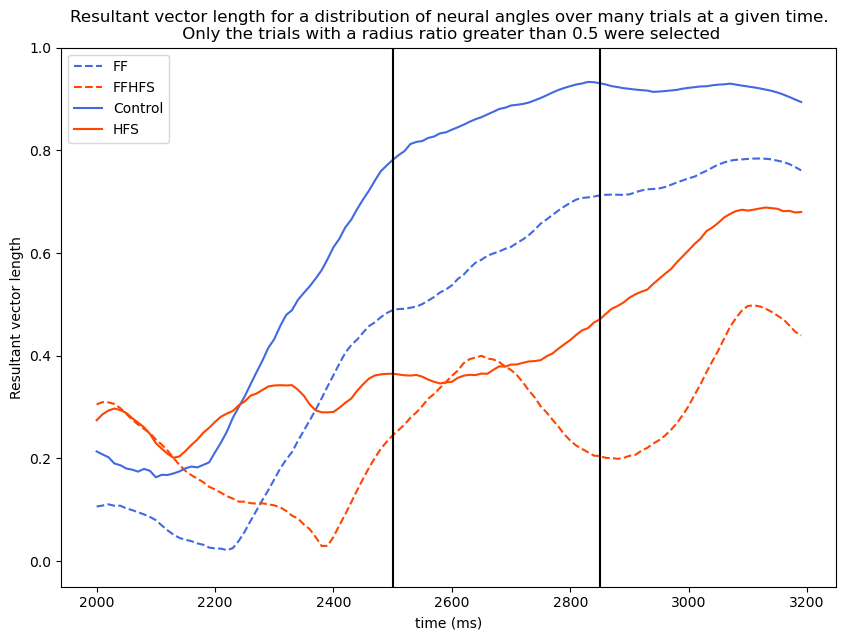

In [25]:
plt.figure(figsize = (10,7))
plt.rcParams['svg.fonttype'] = 'none'

plt.plot(times[:-10],rvl_ff, color = 'royalblue', linestyle = '--', label = 'FF')
plt.plot(times[:-10],rvl_ffhfs, color = 'orangered', linestyle = '--', label = 'FFHFS')
plt.plot(times[:-10],rvl_cont1, color = 'royalblue', label = 'Control')
plt.plot(times[:-10],rvl_hfs, color = 'orangered', label = 'HFS')

plt.vlines(times[T_start], -1, 1, color='k')
plt.vlines(times[T_end], -1, 1, color='k')
plt.ylim(-0.05, 1)
plt.xlabel('time (ms)')
plt.ylabel('Resultant vector length')
plt.legend()
plt.title('Resultant vector length for a distribution of neural angles over many trials at a given time.\n Only the trials with a radius ratio greater than %s were selected'%rr_thresh )
#plt.savefig(monkey+'_RVL_'+centering+'.svg', transparent=True, bbox_inches="tight")

### DIR 1 2

In [26]:
rr_thresh = 0.5

# DO THE PLOT OF THE RVL

rvl_ff_dir1 = np.zeros(120)
rvl_ffhfs_dir1 = np.zeros(120)
rvl_ff_dir2 = np.zeros(120)
rvl_ffhfs_dir2 = np.zeros(120)
rvl_cont1 = np.zeros(120)
rvl_hfs = np.zeros(120)


for T in range(120):
    (ang_reor_ff_dir1, rr_reor_ff_dir1, ang_reor_ffhfs_dir1, rr_reor_ffhfs_dir1, ang_reor_ff_dir2, rr_reor_ff_dir2, ang_reor_ffhfs_dir2, rr_reor_ffhfs_dir2, ang_reor_cont1, rr_reor_cont1, ang_reor_hfs, rr_reor_hfs) = get_vars_dir12(angles, rr,T,T+10, targets_to_consider)
    
    selec_angle_ffhfs_dir1 = ang_reor_ffhfs_dir1[:,:][(rr_reor_ffhfs_dir1[:,:]>rr_thresh)]
    rvl_ffhfs_dir1[T] = resultant_vector_length(selec_angle_ffhfs_dir1)
    
    selec_angle_ff_dir1 = ang_reor_ff_dir1[:,:][(rr_reor_ff_dir1[:,:]>rr_thresh)]
    rvl_ff_dir1[T] = resultant_vector_length(selec_angle_ff_dir1)
    
    selec_angle_ffhfs_dir2 = ang_reor_ffhfs_dir2[:,:][(rr_reor_ffhfs_dir2[:,:]>rr_thresh)]
    rvl_ffhfs_dir2[T] = resultant_vector_length(selec_angle_ffhfs_dir2)
    
    selec_angle_ff_dir2 = ang_reor_ff_dir2[:,:][(rr_reor_ff_dir2[:,:]>rr_thresh)]
    rvl_ff_dir2[T] = resultant_vector_length(selec_angle_ff_dir2)
    
    
    selec_angle_hfs = ang_reor_hfs[:,:][(rr_reor_hfs[:,:]>rr_thresh)]
    rvl_hfs[T] = resultant_vector_length(selec_angle_hfs)
    
    selec_angle_cont1 = ang_reor_cont1[:,:][(rr_reor_cont1[:,:]>rr_thresh)]
    rvl_cont1[T] = resultant_vector_length(selec_angle_cont1)

Text(0.5, 1.0, 'DIR 2')

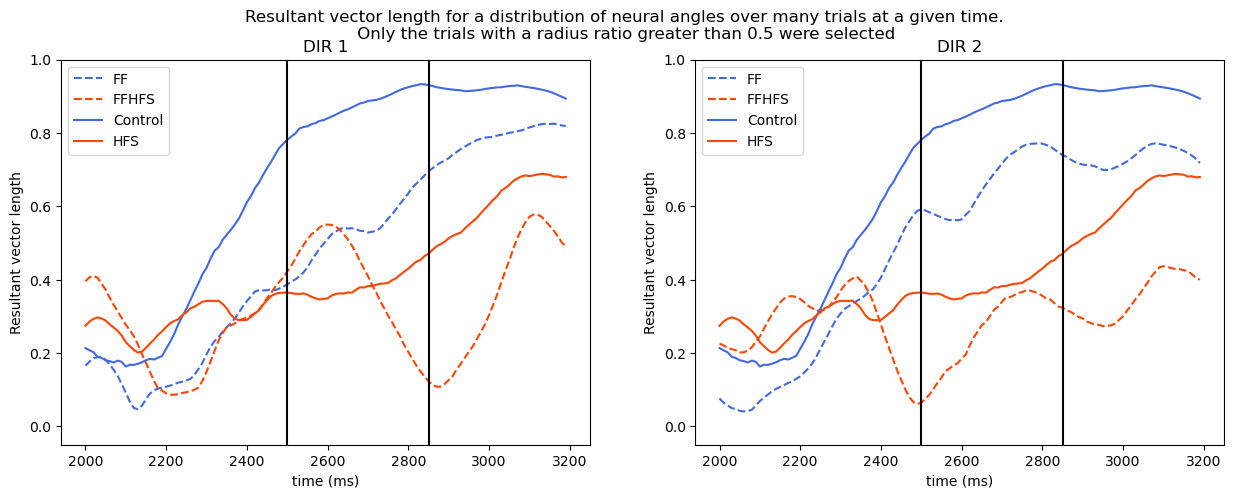

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (15,5), dpi = 100)
plt.rcParams['svg.fonttype'] = 'none'

ax[0].plot(times[:-10],rvl_ff_dir1, color = 'royalblue', linestyle = '--', label = 'FF')
ax[0].plot(times[:-10],rvl_ffhfs_dir1, color = 'orangered', linestyle = '--', label = 'FFHFS')
ax[0].plot(times[:-10],rvl_cont1, color = 'royalblue', label = 'Control')
ax[0].plot(times[:-10],rvl_hfs, color = 'orangered', label = 'HFS')

ax[0].vlines(times[T_start], -1, 1, color='k')
ax[0].vlines(times[T_end], -1, 1, color='k')
ax[0].set_ylim(-0.05, 1)
ax[0].set_xlabel('time (ms)')
ax[0].set_ylabel('Resultant vector length')
ax[0].legend()
ax[0].set_title('DIR 1')

plt.suptitle('Resultant vector length for a distribution of neural angles over many trials at a given time.\n Only the trials with a radius ratio greater than %s were selected'%rr_thresh )


ax[1].plot(times[:-10],rvl_ff_dir2, color = 'royalblue', linestyle = '--', label = 'FF')
ax[1].plot(times[:-10],rvl_ffhfs_dir2, color = 'orangered', linestyle = '--', label = 'FFHFS')
ax[1].plot(times[:-10],rvl_cont1, color = 'royalblue', label = 'Control')
ax[1].plot(times[:-10],rvl_hfs, color = 'orangered', label = 'HFS')

ax[1].vlines(times[T_start], -1, 1, color='k')
ax[1].vlines(times[T_end], -1, 1, color='k')
ax[1].set_ylim(-0.05, 1)
ax[1].set_xlabel('time (ms)')
ax[1].set_ylabel('Resultant vector length')
ax[1].legend()
ax[1].set_title('DIR 2')


#plt.savefig(monkey+'_RVL_'+centering+'.svg', transparent=True, bbox_inches="tight")

In [28]:
(ang_reor_ff_dir1, rr_reor_ff_dir1, ang_reor_ffhfs_dir1, rr_reor_ffhfs_dir1, ang_reor_ff_dir2, rr_reor_ff_dir2, ang_reor_ffhfs_dir2, rr_reor_ffhfs_dir2, ang_reor_cont1, rr_reor_cont1, ang_reor_hfs, rr_reor_hfs) = get_vars_dir12(angles, rr,T_start,T_end, targets_to_consider)

In [29]:
starting_trial = 0


dir1_angle = []
dir2_angle = []

for (ang_reor,rr_reor) in [(ang_reor_ff_dir1, rr_reor_ff_dir1), (ang_reor_ffhfs_dir1, rr_reor_ffhfs_dir1), (ang_reor_cont1, rr_reor_cont1), (ang_reor_hfs, rr_reor_hfs)]:

    dir1_angle.append(ang_reor[:,starting_trial:][(rr_reor[:,starting_trial:]>rr_thresh)])

total_percent_data_dir1 =(rr_reor_ffhfs_dir1[:,starting_trial:]>rr_thresh).sum()/ang_reor_ffhfs_dir1[:,starting_trial:].ravel().shape[0]


for (ang_reor,rr_reor) in [(ang_reor_ff_dir2, rr_reor_ff_dir2), (ang_reor_ffhfs_dir2, rr_reor_ffhfs_dir2), (ang_reor_cont1, rr_reor_cont1), (ang_reor_hfs, rr_reor_hfs)]:

    dir2_angle.append(ang_reor[:,starting_trial:][(rr_reor[:,starting_trial:]>rr_thresh)])

total_percent_data_dir2 =(rr_reor_ffhfs_dir2[:,starting_trial:]>rr_thresh).sum()/ang_reor_ffhfs_dir2[:,starting_trial:].ravel().shape[0]


In [30]:
print(total_percent_data_dir1, total_percent_data_dir2)

0.8622222222222222 0.817962962962963


In [31]:
avg_angles = np.zeros((4,2))
for i in range(4):
    avg_angles[i,0] = compute_angle_average(dir1_angle[i])
for i in range(4):
    avg_angles[i,1] = compute_angle_average(dir2_angle[i])


/var/folders/tz/7jgtwmdx0rzbplvnb9_wvmp00000gp/T/ipykernel_56924/1310183796.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set_xticklabels(label)
/var/folders/tz/7jgtwmdx0rzbplvnb9_wvmp00000gp/T/ipykernel_56924/1310183796.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,0].set_xticklabels(label)
/var/folders/tz/7jgtwmdx0rzbplvnb9_wvmp00000gp/T/ipykernel_56924/1310183796.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_xticklabels(label)
/var/folders/tz/7jgtwmdx0rzbplvnb9_wvmp00000gp/T/ipykernel_56924/1310183796.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,1].set_xticklabels(label)
/var/folders/tz/7jgtwmdx

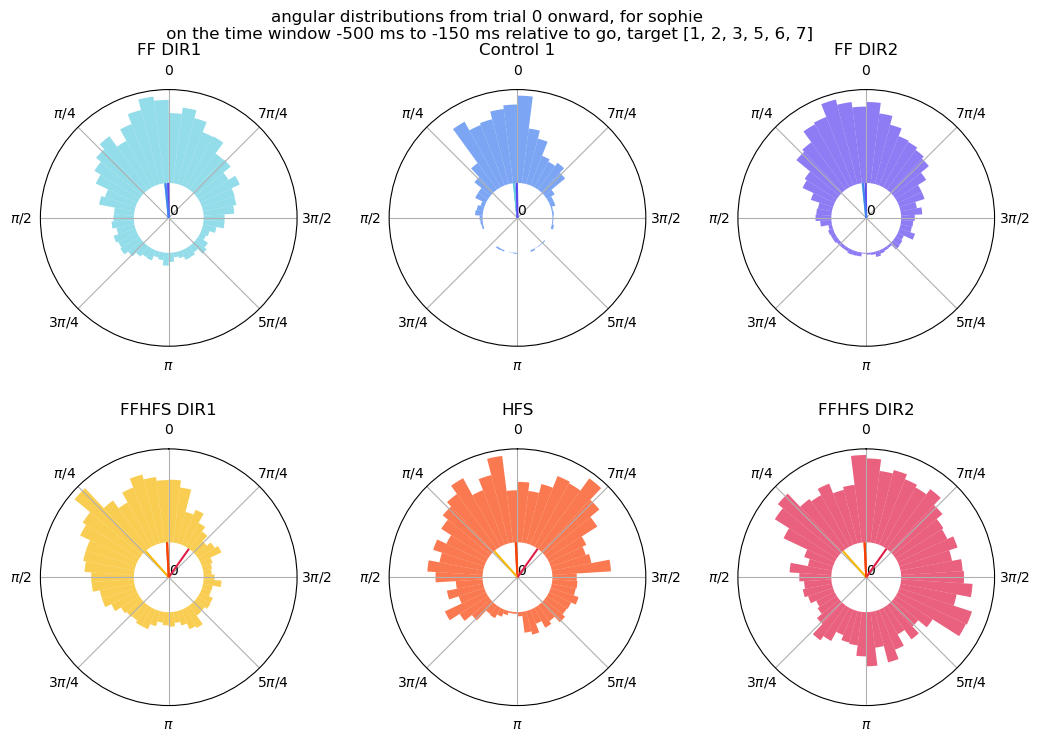

In [36]:
N = 50


label = ['$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$',
                  r'$\pi$', r'$5\pi/4$', r'$3\pi/2$', r'$7\pi/4$']


colors = np.array([[(69, 130, 240), (101, 207, 225),  (93, 69, 240)],
                  [(249, 65, 6) , (248, 186, 7), (225, 30, 72)]])/256


fig, ax = plt.subplots(2, 3, figsize = (24,8), dpi = 100, subplot_kw={'projection': 'polar'})
plt.subplots_adjust(hspace=0.4, wspace = -0.7)

plt.rcParams['svg.fonttype'] = 'none'


barsc = ax[0,0].hist(dir1_angle[0], bins = N, density = True, bottom = 0, alpha = 0.7, range = (-np.pi, np.pi), color = colors[0,1])
ax[0,0].clear()
bottom = barsc[0].max()*0.4
ax[0,0].set_theta_zero_location("N")
bars = ax[0,0].hist(dir1_angle[0], bins = N, density = True, bottom =bottom, alpha = 0.7, range = (-np.pi, np.pi), color = colors[0,1])
ax[0,0].vlines(avg_angles[0], ymin = 0, ymax = bottom, colors = colors[0,1:3])
ax[0,0].vlines(avg_angles[2,0], ymin = 0, ymax = bottom, colors = colors[0,0])
ax[0,0].set_title('FF DIR1')
ax[0,0].set_rgrids([0])
ax[0,0].set_xticklabels(label)

barsc = ax[1,0].hist(dir1_angle[1], bins = N, density = True, bottom=0, alpha = 0.7, range = (-np.pi, np.pi), color = colors[1,1])
ax[1,0].clear()
bottom = barsc[0].max()*0.4
ax[1,0].set_theta_zero_location("N")
bars = ax[1,0].hist(dir1_angle[1], bins = N, density = True, bottom=bottom, alpha = 0.7, range = (-np.pi, np.pi), color = colors[1,1])
ax[1,0].vlines(avg_angles[1], ymin = 0, ymax = bottom, colors = colors[1,1:3])
ax[1,0].vlines(avg_angles[3], ymin = 0, ymax = bottom, colors = colors[1,0])
ax[1,0].set_rgrids([0])
ax[1,0].set_xticklabels(label)
ax[1,0].set_title('FFHFS DIR1')

barsc = ax[0,1].hist(dir1_angle[2], bins = N, density = True, bottom=0, alpha = 0.7, range = (-np.pi, np.pi), color = colors[0,0])
ax[0,1].clear()
bottom = barsc[0].max()*0.4
ax[0,1].set_theta_zero_location("N")
bars = ax[0,1].hist(dir1_angle[2], bins = N, density = True, bottom=bottom, alpha = 0.7, range = (-np.pi, np.pi), color = colors[0,0])
ax[0,1].vlines(avg_angles[2,0], ymin = 0, ymax = bottom, colors = colors[0,0])
ax[0,1].vlines(avg_angles[0], ymin = 0, ymax = bottom, colors = colors[0,1:3])
ax[0,1].set_rgrids([0])
ax[0,1].set_xticklabels(label)
ax[0,1].set_title('Control 1')


barsc = ax[1,1].hist(dir1_angle[3], bins = N, density = True, bottom=0, alpha = 0.7, range = (-np.pi, np.pi), color = colors[1,0])
ax[1,1].clear()
bottom = barsc[0].max()*0.4
ax[1,1].set_theta_zero_location("N")
bars = ax[1,1].hist(dir1_angle[3], bins = N, density = True, bottom=bottom, alpha = 0.7, range = (-np.pi, np.pi), color = colors[1,0])
ax[1,1].vlines(avg_angles[3], ymin = 0, ymax = bottom, colors = colors[1,0])
ax[1,1].vlines(avg_angles[1], ymin = 0, ymax = bottom, colors = colors[1,1:3])
ax[1,1].set_rgrids([0])
ax[1,1].set_xticklabels(label)
ax[1,1].set_title('HFS')

barsc = ax[0,2].hist(dir2_angle[0], bins = N, density = True, bottom=0, alpha = 0.7, range = (-np.pi, np.pi), color = colors[0,2])
ax[0,2].clear()
bottom = barsc[0].max()*0.4
ax[0,2].set_theta_zero_location("N")
bars = ax[0,2].hist(dir2_angle[0], bins = N, density = True, bottom=bottom, alpha = 0.7, range = (-np.pi, np.pi), color = colors[0,2])
ax[0,2].vlines(avg_angles[0], ymin = 0, ymax = bottom, colors = colors[0,1:3])
ax[0,2].vlines(avg_angles[2,0], ymin = 0, ymax = bottom, colors = colors[0,0])
ax[0,2].set_rgrids([0])
ax[0,2].set_xticklabels(label)
ax[0,2].set_title('FF DIR2')

barsc = ax[1,2].hist(dir2_angle[1], bins = N, density = True, bottom=0, alpha = 0.7, range = (-np.pi, np.pi), color = colors[1,2])
ax[1,2].clear()
bottom = barsc[0].max()*0.4
ax[1,2].set_theta_zero_location("N")
bars = ax[1,2].hist(dir2_angle[1], bins = N, density = True, bottom=bottom, alpha = 0.7, range = (-np.pi, np.pi), color = colors[1,2])
ax[1,2].vlines(avg_angles[1], ymin = 0, ymax = bottom, colors = colors[1,1:3])
ax[1,2].vlines(avg_angles[3], ymin = 0, ymax = bottom, colors = colors[1,0])
ax[1,2].set_rgrids([0])
ax[1,2].set_xticklabels(label)
ax[1,2].set_title('FFHFS DIR2')

#leg = fig.legend()
# Use custom colors and opacity
#for r, bar in zip(radii, bars):
#    bar.set_facecolor(plt.cm.jet(r / 10.))
#   bar.set_alpha(0.8)

plt.suptitle('angular distributions from trial %d '%(starting_trial)+'onward, for ' +monkey
          +'\n on the time window %d ms to %d ms relative to go'%(times[T_start]-3000, times[T_end]-3000)+', target %s' %targets_to_consider)



#plt.savefig('ang_dev_circles_'+monkey+'_cwVccw_target%s_time_window_%d_to_%d_'%(targets_to_consider,times[T_start], times[T_end])+centering+'.svg', transparent=True, bbox_inches="tight")
plt.show()

# Neural angle, learning through trials

## For Penny

In [68]:
monkey = 'penny'
times = np.arange(2000, 3300, 10)
centering = 'go'
stats = np.load('stats_'+monkey+'_go_validt_tr_ordering_[10, 10, 25, 25]_windowsize_10.npy', allow_pickle=True)

In [69]:
T_start = 40
T_end = 85
print(times[T_start], times[T_end])

targets_to_consider = [1,2,3,5,6,7]  # select here the targets you want to select for the analysis

2400 2850


In [70]:
# getting the radius of the projections on the TDR plane
radii = np.abs(stats[:,2])
radii_ct8 = np.abs(stats[:,3])
rr = radii/radii_ct8 # this is the radius ratio

angles = stats[:,1,:]

radius_ratio = [np.array([])]*4
for t in range(T_start,T_end):#range(times.shape[0]):
    for cond in range(4):
        radius_ratio[cond] = np.concatenate((radius_ratio[cond], rr[t,cond].ravel()))

Text(0.5, 1.0, 'Radius of neural-states projected on the target related plane for a given \n condition over the radius found for cont8 from 2550 to 2800 ms')

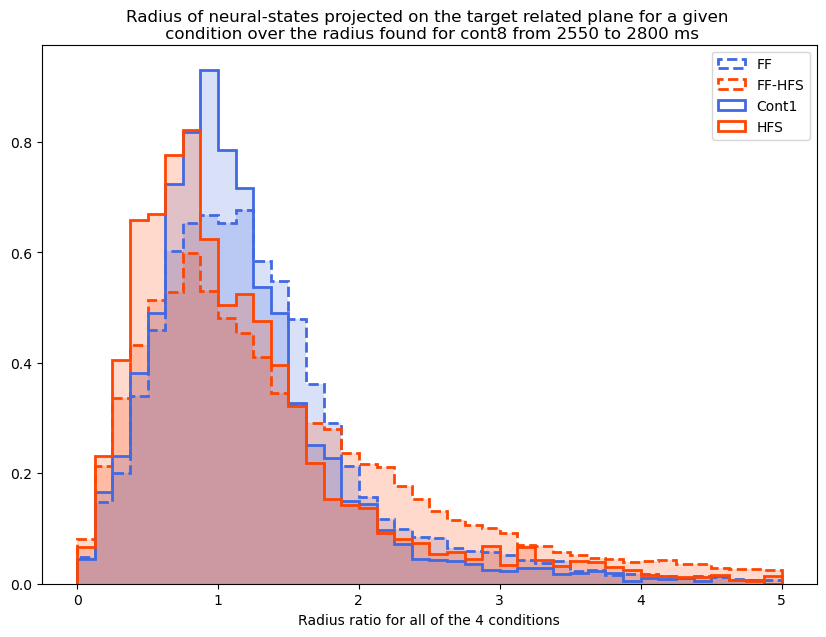

In [71]:
cond_list = ['FF', 'FF-HFS', 'Cont1', 'HFS']
colors = ['royalblue', 'orangered', 'royalblue', 'orangered']
linestyles = ['--', '--', '-', '-']
plt.figure(figsize =(10,7))
plt.rcParams['svg.fonttype'] = 'none'

for cond in range(4):
    plt.hist(radius_ratio[cond], density=True, range = (0,5), bins = 40, label = cond_list[cond], alpha = 1, histtype='step', linewidth = 2, color = colors[cond], linestyle=linestyles[cond])
    plt.hist(radius_ratio[cond], density=True, range = (0,5), bins = 40, alpha = 0.2, histtype='stepfilled', color = colors[cond])
plt.legend()

plt.xlabel('Radius ratio for all of the 4 conditions')
plt.title('Radius of neural-states projected on the target related plane for a given \n condition over the radius found for cont8 from 2550 to 2800 ms', wrap = True)

#plt.savefig(monkey+'_radius_ratio_'+centering+'.svg', transparent=True, bbox_inches="tight")

In [72]:
rr_thresh = 0.5

rvl_ff = np.zeros(120)
rvl_ffhfs = np.zeros(120)
rvl_cont1 = np.zeros(120)
rvl_hfs = np.zeros(120)


for T in range(120):
    (ang_reor_ff, rr_reor_ff, ang_reor_ffhfs, rr_reor_ffhfs, ang_reor_cont1, rr_reor_cont1, ang_reor_hfs, rr_reor_hfs) = get_reor_vars(angles, rr,T,T+10, targets_to_consider)
    
    selec_angle_ffhfs = ang_reor_ffhfs[:,:][(rr_reor_ffhfs[:,:]>rr_thresh)]
    rvl_ffhfs[T] = resultant_vector_length(selec_angle_ffhfs)
    
    selec_angle_ff = ang_reor_ff[:,:][(rr_reor_ff[:,:]>rr_thresh)]
    rvl_ff[T] = resultant_vector_length(selec_angle_ff)
    
    selec_angle_hfs = ang_reor_hfs[:,:][(rr_reor_hfs[:,:]>rr_thresh)]
    rvl_hfs[T] = resultant_vector_length(selec_angle_hfs)
    
    selec_angle_cont1 = ang_reor_cont1[:,:][(rr_reor_cont1[:,:]>rr_thresh)]
    rvl_cont1[T] = resultant_vector_length(selec_angle_cont1)


Text(0.5, 1.0, 'Resultant vector length for a distribution of neural angles over many trials at a given time.\n Only the trials with a radius ratio greater than 0.5 were selected')

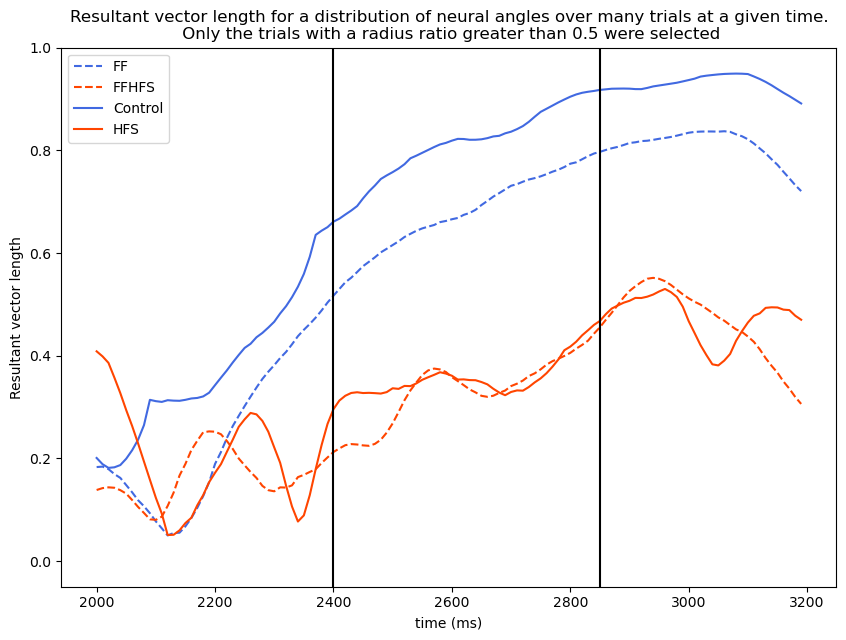

In [73]:
plt.figure(figsize = (10,7))
plt.rcParams['svg.fonttype'] = 'none'

plt.plot(times[:-10],rvl_ff, color = 'royalblue', linestyle = '--', label = 'FF')
plt.plot(times[:-10],rvl_ffhfs, color = 'orangered', linestyle = '--', label = 'FFHFS')
plt.plot(times[:-10],rvl_cont1, color = 'royalblue', label = 'Control')
plt.plot(times[:-10],rvl_hfs, color = 'orangered', label = 'HFS')

plt.vlines(times[T_start], -1, 1, color='k')
plt.vlines(times[T_end], -1, 1, color='k')
plt.ylim(-0.05, 1)
plt.xlabel('time (ms)')
plt.ylabel('Resultant vector length')
plt.legend()
plt.title('Resultant vector length for a distribution of neural angles over many trials at a given time.\n Only the trials with a radius ratio greater than %s were selected'%rr_thresh )
#plt.savefig(monkey+'_RVL_'+centering+'.svg', transparent=True, bbox_inches="tight")

In [74]:
(ang_reor_ff, rr_reor_ff, ang_reor_ffhfs, rr_reor_ffhfs, ang_reor_cont1, rr_reor_cont1, ang_reor_hfs, rr_reor_hfs) = get_reor_vars(angles, rr,T_start,T_end, targets_to_consider)

In [75]:
nb_bin_trials_early = 5
nb_bin_trials_late = 5

early_angle = []
intermediate_angle = []
late_angle = []

for (ang_reor,rr_reor) in [(ang_reor_ff, rr_reor_ff), (ang_reor_ffhfs, rr_reor_ffhfs), (ang_reor_cont1, rr_reor_cont1), (ang_reor_hfs, rr_reor_hfs)]:

    early_angle.append(ang_reor[:,:nb_bin_trials_early][(rr_reor[:,:nb_bin_trials_early]>rr_thresh)])
    late_angle.append(ang_reor[:,-nb_bin_trials_late:][(rr_reor[:,-nb_bin_trials_late:]>rr_thresh)])
    intermediate_angle.append(ang_reor[:,nb_bin_trials_early:-nb_bin_trials_late][(rr_reor[:,nb_bin_trials_early:-nb_bin_trials_late]>rr_thresh)])


total_percent_data_early =(rr_reor_ffhfs[:,:nb_bin_trials_early]>rr_thresh).sum()/ang_reor_ffhfs[:,:nb_bin_trials_early].ravel().shape[0]
total_percent_data_late = (rr_reor_ffhfs[:,-nb_bin_trials_late:]>rr_thresh).sum()/ang_reor_ffhfs[:,-nb_bin_trials_late:].ravel().shape[0]
total_percent_data_intermediate = (rr_reor_ffhfs[:,nb_bin_trials_early:-nb_bin_trials_late]>rr_thresh).sum()/ang_reor_ffhfs[:,nb_bin_trials_early:-nb_bin_trials_late].ravel().shape[0]

In [76]:
print(total_percent_data_early, total_percent_data_late, total_percent_data_intermediate)

0.836231884057971 0.881159420289855 0.8704106280193237


In [77]:
avg_angles = np.zeros((4,3))
std_angles = np.zeros((4,3))
err_angles = np.zeros((4,3))

for i in range(4):
    avg_angles[i,0] = compute_angle_average(early_angle[i])
    std_angles[i,0] = circstd(early_angle[i], high = np.pi, low = -np.pi)
    err_angles[i,0] = std_angles[i,0]/np.sqrt(len(early_angle[i]))
for i in range(4):
    avg_angles[i,1] = compute_angle_average(intermediate_angle[i])
    std_angles[i,1] = circstd(intermediate_angle[i], high = np.pi, low = -np.pi)
    err_angles[i,1] = std_angles[i,1]/np.sqrt(len(intermediate_angle[i]))
for i in range(4):
    avg_angles[i,2] = compute_angle_average(late_angle[i])
    std_angles[i,2] = circstd(late_angle[i], high = np.pi, low = -np.pi)
    err_angles[i,2] = std_angles[i,2]/np.sqrt(len(late_angle[i]))

/Users/ninou/Nextcloud/These/data_sharon/for_github/functions.py:29: RuntimeWarning: Mean of empty slice
  return np.angle(np.nanmean(cplx, axis=axis))


In [78]:
FF_rel_to_cont_angles = get_ang_diff(avg_angles[0,[0,2]] - compute_angle_average(avg_angles[2]))
FFHFS_rel_to_hfs_angles =  get_ang_diff(avg_angles[1,[0,2]] - compute_angle_average(avg_angles[3]))

Text(0.5, 1.0, 'Angular deviation in the first 5 compared to the last 5 trials for penny')

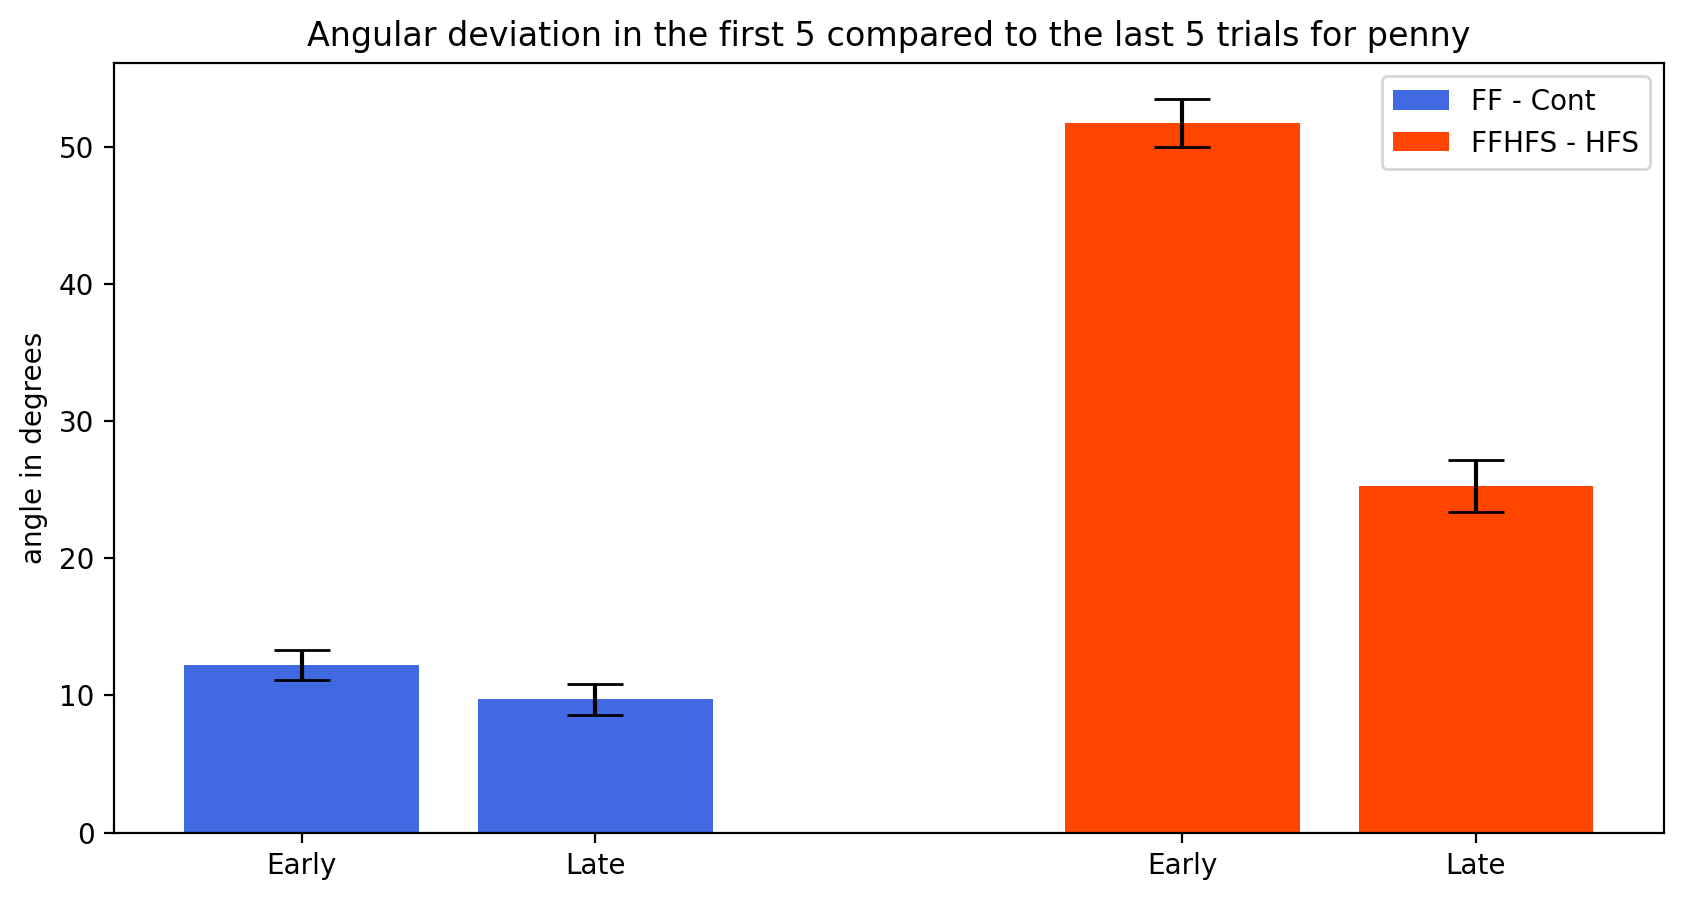

In [79]:
fig, ax = plt.subplots(figsize = (10,5), dpi = 200)
plt.rcParams['svg.fonttype'] = 'none'

xpos = np.array([-0.5,0.5])

colors = ['royalblue', 'orangered']

#ax.bar(xpos, avg_angles[0,[0,2]]*180/np.pi, yerr=err_angles[0,[0,2]]*180/np.pi , label= 'FF', color = colors[0], capsize = 10)
#ax.bar(xpos+3, avg_angles[1,[0,2]]*180/np.pi, yerr=err_angles[1,[0,2]]*180/np.pi , label = 'FFHFS', color = colors[1], capsize = 10)

ax.bar(xpos, FF_rel_to_cont_angles*180/np.pi, yerr=err_angles[0,[0,2]]*180/np.pi , label= 'FF - Cont', color = colors[0], capsize = 10)
ax.bar(xpos+3, FFHFS_rel_to_hfs_angles*180/np.pi, yerr=err_angles[1,[0,2]]*180/np.pi , label = 'FFHFS - HFS', color = colors[1], capsize = 10)

ax.set_xticks([-0.5,0.5,2.5,3.5])
ax.set_xticklabels(['Early', 'Late', 'Early', 'Late'])

ax.set_ylabel('angle in degrees')
ax.legend()
ax.set_title('Angular deviation in the first %d compared to the last %d trials for '%(nb_bin_trials_early, nb_bin_trials_late)+monkey)
#plt.savefig('Angular_dev_early_VS_late_with_standard_error_rel_to_cont_and_hfs'+monkey+'.svg', transparent=True, bbox_inches="tight")

In [80]:
ang_thru_tr_ffhfs = []
ang_thru_tr_ffhfs_avg = []
ang_thru_tr_ffhfs_std = []
ang_thru_tr_ffhfs_err = []
for bi in range(25//5):
    ang_thru_tr_ffhfs.append(ang_reor_ffhfs[:,bi*5:(bi+1)*5][(rr_reor_ffhfs[:,bi*5:(bi+1)*5]>rr_thresh)])

for bi in range(25//5):
    ang_thru_tr_ffhfs_avg.append(compute_angle_average(ang_thru_tr_ffhfs[bi]))
    ang_thru_tr_ffhfs_std.append(circstd(ang_thru_tr_ffhfs[bi], high = np.pi, low = -np.pi))
    ang_thru_tr_ffhfs_err.append(ang_thru_tr_ffhfs_std[-1]/np.sqrt(len(ang_thru_tr_ffhfs[bi])))
    

    
    
ang_thru_tr_ff = []
ang_thru_tr_ff_avg = []
ang_thru_tr_ff_std = []
ang_thru_tr_ff_err = []
for bi in range(25//5):
    ang_thru_tr_ff.append(ang_reor_ff[:,bi*5:(bi+1)*5][(rr_reor_ff[:,bi*5:(bi+1)*5]>rr_thresh)])

for bi in range(25//5):
    ang_thru_tr_ff_avg.append(compute_angle_average(ang_thru_tr_ff[bi]))
    ang_thru_tr_ff_std.append(circstd(ang_thru_tr_ff[bi], high = np.pi, low = -np.pi))
    ang_thru_tr_ff_err.append(ang_thru_tr_ff_std[-1]/np.sqrt(len(ang_thru_tr_ff[bi])))

In [81]:
np.array(ang_thru_tr_ffhfs_avg).shape

(5,)

Text(0.5, 0, 'trial, ordered from early trial to late trial')

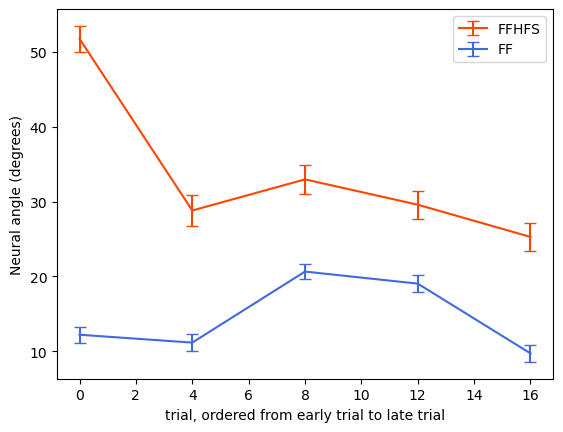

In [82]:
xpos = np.array([0,4,8,12,16])

plt.rcParams['svg.fonttype'] = 'none'


plt.errorbar(xpos, np.array(ang_thru_tr_ffhfs_avg- compute_angle_average(avg_angles[3]))*180/np.pi, yerr = np.array(ang_thru_tr_ffhfs_err)*180/np.pi, color = 'orangered', label = 'FFHFS', capsize = 4)
plt.errorbar(xpos, (np.array(ang_thru_tr_ff_avg)-compute_angle_average(avg_angles[2]))*180/np.pi,  yerr = np.array(ang_thru_tr_ff_err)*180/np.pi, color = 'royalblue', label = 'FF', capsize = 4)
plt.legend()
plt.ylabel('Neural angle (degrees)')
plt.xlabel('trial, ordered from early trial to late trial')
#plt.savefig('Angular_dev_thru_tr_with_standard_error_rel_to_cont_and_hfs_'+monkey+'.pdf', transparent=True, bbox_inches="tight")

## For Sophie

In [83]:
monkey = 'sophie'
times = np.arange(2000, 3300, 10)
centering = 'go'
stats = np.load('stats_'+monkey+'_go_validt_tr_ordering_[15, 15, 25, 25]_windowsize_10.npy', allow_pickle=True)

In [84]:
T_start = 40
T_end = 85
print(times[T_start], times[T_end])

targets_to_consider = [1,2,3,5,6,7] 

2400 2850


In [85]:
# getting the radius of the projections on the TDR plane
radii = np.abs(stats[:,2])
radii_ct8 = np.abs(stats[:,3])
rr = radii/radii_ct8 # this is the radius ratio

angles = stats[:,1,:]

radius_ratio = [np.array([])]*4
for t in range(T_start,T_end):#range(times.shape[0]):
    for cond in range(4):
        radius_ratio[cond] = np.concatenate((radius_ratio[cond], rr[t,cond].ravel()))

/var/folders/tz/7jgtwmdx0rzbplvnb9_wvmp00000gp/T/ipykernel_56924/1167106644.py:4: RuntimeWarning: invalid value encountered in divide
  rr = radii/radii_ct8 # this is the radius ratio


Text(0.5, 1.0, 'Radius of neural-states projected on the target related plane for a given \n condition over the radius found for cont8 from 2550 to 2800 ms')

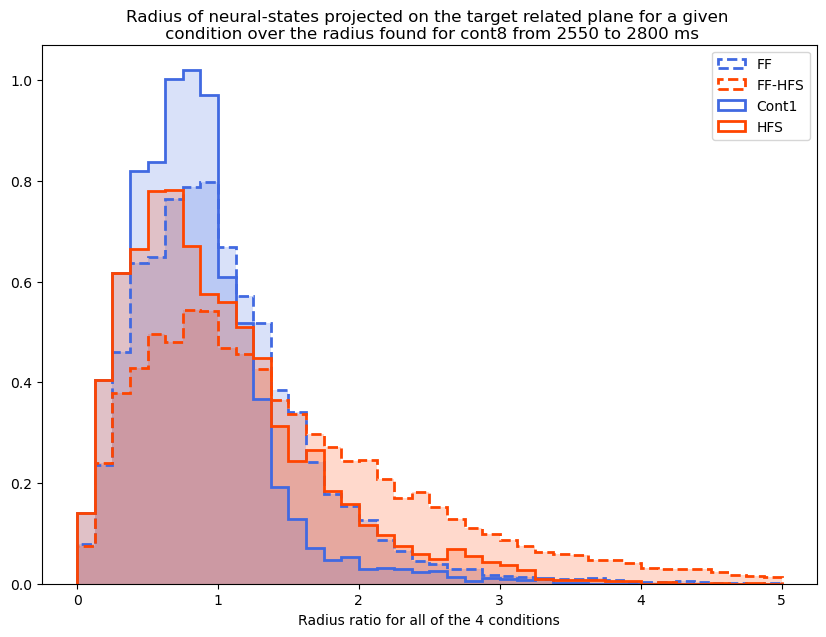

In [86]:
cond_list = ['FF', 'FF-HFS', 'Cont1', 'HFS']
colors = ['royalblue', 'orangered', 'royalblue', 'orangered']
linestyles = ['--', '--', '-', '-']
plt.figure(figsize =(10,7))
plt.rcParams['svg.fonttype'] = 'none'


for cond in range(4):
    plt.hist(radius_ratio[cond], density=True, range = (0,5), bins = 40, label = cond_list[cond], alpha = 1, histtype='step', linewidth = 2, color = colors[cond], linestyle=linestyles[cond])
    plt.hist(radius_ratio[cond], density=True, range = (0,5), bins = 40, alpha = 0.2, histtype='stepfilled', color = colors[cond])
plt.legend()

plt.xlabel('Radius ratio for all of the 4 conditions')
plt.title('Radius of neural-states projected on the target related plane for a given \n condition over the radius found for cont8 from 2550 to 2800 ms', wrap = True)

#plt.savefig(monkey+'_radius_ratio_'+centering+'.svg', transparent=True, bbox_inches="tight")

In [87]:
rr_thresh = 0.5

rvl_ff = np.zeros(120)
rvl_ffhfs = np.zeros(120)
rvl_cont1 = np.zeros(120)
rvl_hfs = np.zeros(120)


for T in range(120):
    (ang_reor_ff, rr_reor_ff, ang_reor_ffhfs, rr_reor_ffhfs, ang_reor_cont1, rr_reor_cont1, ang_reor_hfs, rr_reor_hfs) = get_reor_vars(angles, rr,T,T+10, targets_to_consider)
    
    selec_angle_ffhfs = ang_reor_ffhfs[:,:][(rr_reor_ffhfs[:,:]>rr_thresh)]
    rvl_ffhfs[T] = resultant_vector_length(selec_angle_ffhfs)
    
    selec_angle_ff = ang_reor_ff[:,:][(rr_reor_ff[:,:]>rr_thresh)]
    rvl_ff[T] = resultant_vector_length(selec_angle_ff)
    
    selec_angle_hfs = ang_reor_hfs[:,:][(rr_reor_hfs[:,:]>rr_thresh)]
    rvl_hfs[T] = resultant_vector_length(selec_angle_hfs)
    
    selec_angle_cont1 = ang_reor_cont1[:,:][(rr_reor_cont1[:,:]>rr_thresh)]
    rvl_cont1[T] = resultant_vector_length(selec_angle_cont1)


Text(0.5, 1.0, 'Resultant vector length for a distribution of neural angles over many trials at a given time.\n Only the trials with a radius ratio greater than 0.5 were selected')

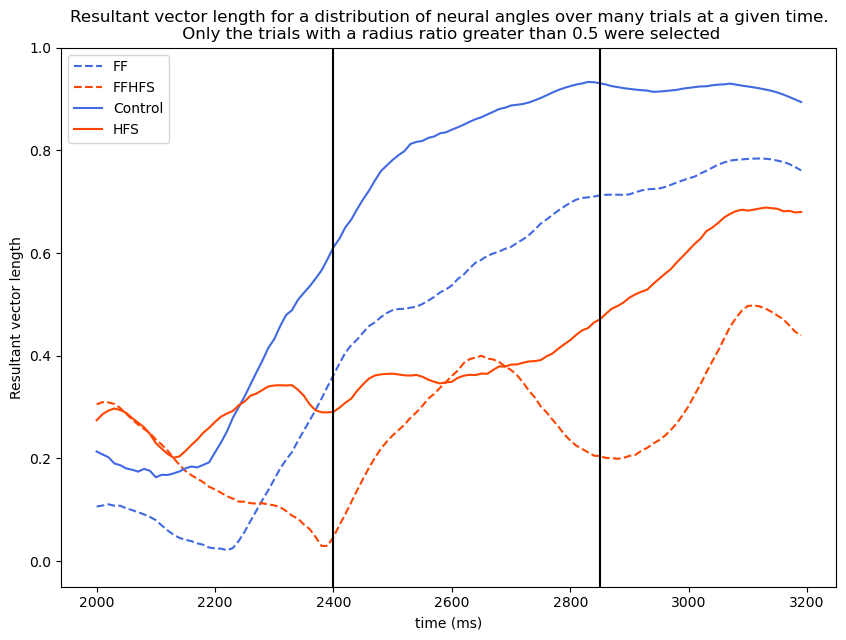

In [88]:
plt.figure(figsize = (10,7))
plt.rcParams['svg.fonttype'] = 'none'

plt.plot(times[:-10],rvl_ff, color = 'royalblue', linestyle = '--', label = 'FF')
plt.plot(times[:-10],rvl_ffhfs, color = 'orangered', linestyle = '--', label = 'FFHFS')
plt.plot(times[:-10],rvl_cont1, color = 'royalblue', label = 'Control')
plt.plot(times[:-10],rvl_hfs, color = 'orangered', label = 'HFS')

plt.vlines(times[T_start], -1, 1, color='k')
plt.vlines(times[T_end], -1, 1, color='k')
plt.ylim(-0.05, 1)
plt.xlabel('time (ms)')
plt.ylabel('Resultant vector length')
plt.legend()
plt.title('Resultant vector length for a distribution of neural angles over many trials at a given time.\n Only the trials with a radius ratio greater than %s were selected'%rr_thresh )
#plt.savefig(monkey+'_RVL_'+centering+'.svg', transparent=True, bbox_inches="tight")

In [89]:
(ang_reor_ff, rr_reor_ff, ang_reor_ffhfs, rr_reor_ffhfs, ang_reor_cont1, rr_reor_cont1, ang_reor_hfs, rr_reor_hfs) = get_reor_vars(angles, rr,T_start,T_end, targets_to_consider)

In [90]:
nb_bin_trials_early = 5
nb_bin_trials_late = 5

early_angle = []
intermediate_angle = []
late_angle = []

for (ang_reor,rr_reor) in [(ang_reor_ff, rr_reor_ff), (ang_reor_ffhfs, rr_reor_ffhfs), (ang_reor_cont1, rr_reor_cont1), (ang_reor_hfs, rr_reor_hfs)]:

    early_angle.append(ang_reor[:,:nb_bin_trials_early][(rr_reor[:,:nb_bin_trials_early]>rr_thresh)])
    late_angle.append(ang_reor[:,-nb_bin_trials_late:][(rr_reor[:,-nb_bin_trials_late:]>rr_thresh)])
    intermediate_angle.append(ang_reor[:,nb_bin_trials_early:-nb_bin_trials_late][(rr_reor[:,nb_bin_trials_early:-nb_bin_trials_late]>rr_thresh)])


total_percent_data_early =(rr_reor_ffhfs[:,:nb_bin_trials_early]>rr_thresh).sum()/ang_reor_ffhfs[:,:nb_bin_trials_early].ravel().shape[0]
total_percent_data_late = (rr_reor_ffhfs[:,-nb_bin_trials_late:]>rr_thresh).sum()/ang_reor_ffhfs[:,-nb_bin_trials_late:].ravel().shape[0]
total_percent_data_intermediate = (rr_reor_ffhfs[:,nb_bin_trials_early:-nb_bin_trials_late]>rr_thresh).sum()/ang_reor_ffhfs[:,nb_bin_trials_early:-nb_bin_trials_late].ravel().shape[0]

In [91]:
print(total_percent_data_early, total_percent_data_late, total_percent_data_intermediate)

0.8615942028985507 0.8847826086956522 0.8582125603864734


In [92]:
avg_angles = np.zeros((4,3))
std_angles = np.zeros((4,3))
err_angles = np.zeros((4,3))

for i in range(4):
    avg_angles[i,0] = compute_angle_average(early_angle[i])
    std_angles[i,0] = circstd(early_angle[i], high = np.pi, low = -np.pi)
    err_angles[i,0] = std_angles[i,0]/np.sqrt(len(early_angle[i]))
for i in range(4):
    avg_angles[i,1] = compute_angle_average(intermediate_angle[i])
    std_angles[i,1] = circstd(intermediate_angle[i], high = np.pi, low = -np.pi)
    err_angles[i,1] = std_angles[i,1]/np.sqrt(len(intermediate_angle[i]))
for i in range(4):
    avg_angles[i,2] = compute_angle_average(late_angle[i])
    std_angles[i,2] = circstd(late_angle[i], high = np.pi, low = -np.pi)
    err_angles[i,2] = std_angles[i,2]/np.sqrt(len(late_angle[i]))

In [93]:
FF_rel_to_cont_angles = get_ang_diff(avg_angles[0,[0,2]] - compute_angle_average(avg_angles[2]))
FFHFS_rel_to_hfs_angles =  get_ang_diff(avg_angles[1,[0,2]] - compute_angle_average(avg_angles[3]))

Text(0.5, 1.0, 'Angular deviation in the first 5 compared to the last 5 trials for sophie')

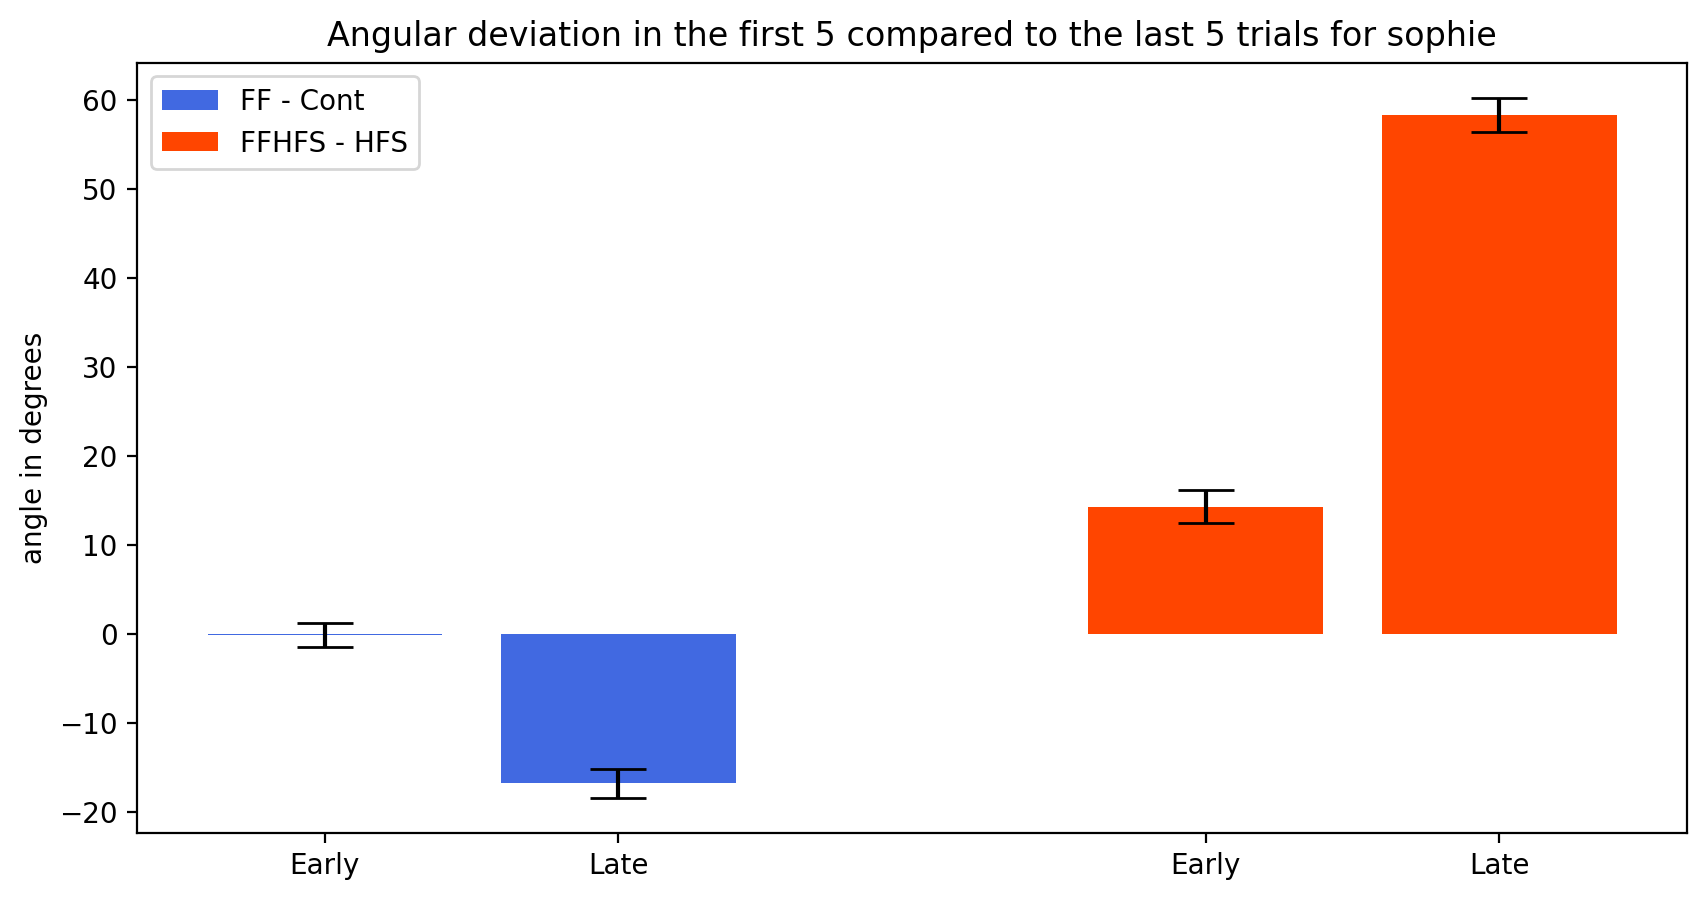

In [94]:
fig, ax = plt.subplots(figsize = (10,5), dpi = 200)
plt.rcParams['svg.fonttype'] = 'none'

xpos = np.array([-0.5,0.5])

colors = ['royalblue', 'orangered']

#ax.bar(xpos, avg_angles[0,[0,2]]*180/np.pi, yerr=err_angles[0,[0,2]]*180/np.pi , label= 'FF', color = colors[0], capsize = 10)
#ax.bar(xpos+3, avg_angles[1,[0,2]]*180/np.pi, yerr=err_angles[1,[0,2]]*180/np.pi , label = 'FFHFS', color = colors[1], capsize = 10)

ax.bar(xpos, FF_rel_to_cont_angles*180/np.pi, yerr=err_angles[0,[0,2]]*180/np.pi , label= 'FF - Cont', color = colors[0], capsize = 10)
ax.bar(xpos+3, FFHFS_rel_to_hfs_angles*180/np.pi, yerr=err_angles[1,[0,2]]*180/np.pi , label = 'FFHFS - HFS', color = colors[1], capsize = 10)

ax.set_xticks([-0.5,0.5,2.5,3.5])
ax.set_xticklabels(['Early', 'Late', 'Early', 'Late'])

ax.set_ylabel('angle in degrees')
ax.legend()
ax.set_title('Angular deviation in the first %d compared to the last %d trials for '%(nb_bin_trials_early, nb_bin_trials_late)+monkey)
#plt.savefig('Angular_dev_early_VS_late_with_standard_error_rel_to_cont_and_hfs'+monkey+'.svg', transparent=True, bbox_inches="tight")

In [95]:
ang_thru_tr_ffhfs = []
ang_thru_tr_ffhfs_avg = []
ang_thru_tr_ffhfs_std = []
ang_thru_tr_ffhfs_err = []
for bi in range(25//5):
    ang_thru_tr_ffhfs.append(ang_reor_ffhfs[:,bi*5:(bi+1)*5][(rr_reor_ffhfs[:,bi*5:(bi+1)*5]>rr_thresh)])

for bi in range(25//5):
    ang_thru_tr_ffhfs_avg.append(compute_angle_average(ang_thru_tr_ffhfs[bi]))
    ang_thru_tr_ffhfs_std.append(circstd(ang_thru_tr_ffhfs[bi], high = np.pi, low = -np.pi))
    ang_thru_tr_ffhfs_err.append(ang_thru_tr_ffhfs_std[-1]/np.sqrt(len(ang_thru_tr_ffhfs[bi])))
    

    
    
ang_thru_tr_ff = []
ang_thru_tr_ff_avg = []
ang_thru_tr_ff_std = []
ang_thru_tr_ff_err = []
for bi in range(25//5):
    ang_thru_tr_ff.append(ang_reor_ff[:,bi*5:(bi+1)*5][(rr_reor_ff[:,bi*5:(bi+1)*5]>rr_thresh)])

for bi in range(25//5):
    ang_thru_tr_ff_avg.append(compute_angle_average(ang_thru_tr_ff[bi]))
    ang_thru_tr_ff_std.append(circstd(ang_thru_tr_ff[bi], high = np.pi, low = -np.pi))
    ang_thru_tr_ff_err.append(ang_thru_tr_ff_std[-1]/np.sqrt(len(ang_thru_tr_ff[bi])))

In [96]:
np.array(ang_thru_tr_ffhfs_avg).shape

(5,)

Text(0.5, 0, 'trial, ordered from early trial to late trial')

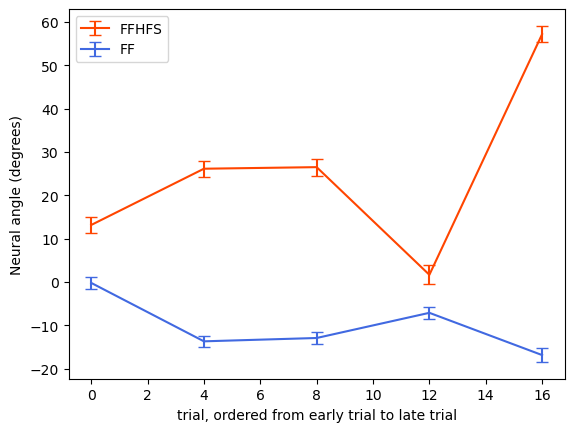

In [97]:
xpos = np.array([0,4,8,12,16])

plt.rcParams['svg.fonttype'] = 'none'


plt.errorbar(xpos, np.array(ang_thru_tr_ffhfs_avg- compute_angle_average(ang_reor_hfs[(rr_reor_hfs>rr_thresh)]))*180/np.pi, yerr = np.array(ang_thru_tr_ffhfs_err)*180/np.pi, color = 'orangered', label = 'FFHFS', capsize = 4)
plt.errorbar(xpos, (np.array(ang_thru_tr_ff_avg)-compute_angle_average(ang_reor_cont1[(rr_reor_cont1>rr_thresh)]))*180/np.pi,  yerr = np.array(ang_thru_tr_ff_err)*180/np.pi, color = 'royalblue', label = 'FF', capsize = 4)
plt.legend()
plt.ylabel('Neural angle (degrees)')
plt.xlabel('trial, ordered from early trial to late trial')
#plt.savefig('Angular_dev_thru_tr_with_standard_error_rel_to_cont_and_hfs_'+monkey+'.pdf', transparent=True, bbox_inches="tight")

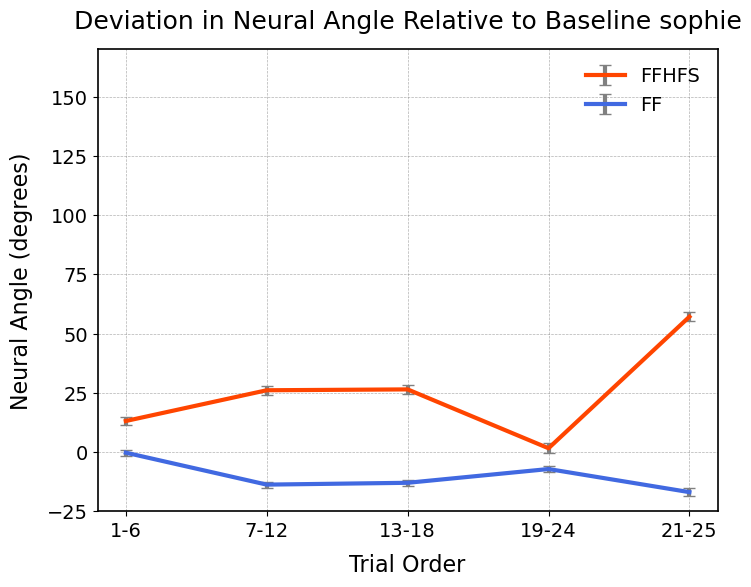

In [98]:
# Sample data, replace with actual data
xpos = np.array([0, 4, 8, 12, 16])  # X positions for data points

# Plotting Parameters
plt.figure(figsize=(8, 6))
plt.rcParams.update({
    'svg.fonttype': 'none',
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'lines.linewidth': 2.5,
    'axes.linewidth': 1.2,
})

# Inverting the order of xpos to follow the high-to-low convention
x_ordered = xpos

# Plotting the FFHFS and FF error bars with enhanced styling
plt.errorbar(x_ordered, 
             np.array(ang_thru_tr_ffhfs_avg-compute_angle_average(ang_reor_hfs[(rr_reor_hfs>rr_thresh)]))*180/np.pi,
             yerr=np.array(ang_thru_tr_ffhfs_err) * 180 / np.pi,
             color='orangered', label='FFHFS', 
             capsize=4, ecolor='grey', linewidth=3)

plt.errorbar(x_ordered, 
             (np.array(ang_thru_tr_ff_avg)-compute_angle_average(ang_reor_cont1[(rr_reor_cont1>rr_thresh)]))*180/np.pi,
             yerr=np.array(ang_thru_tr_ff_err) * 180 / np.pi,
             color='royalblue', label='FF', 
             capsize=4, ecolor='grey', linewidth=3)

plt.ylim((-25,170))

# Customizations for aesthetics
plt.ylabel('Neural Angle (degrees)', fontsize=16, labelpad=10)
plt.xlabel('Trial Order', fontsize=16, labelpad=10)
plt.title('Deviation in Neural Angle Relative to Baseline '+monkey, fontsize=18, pad=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.6)
plt.legend(loc='upper right', frameon=False)
plt.xticks(xpos, ['1-6','7-12','13-18','19-24','21-25'])

# Saving as high-resolution SVG
#plt.savefig('Rev1_angular_Deviation_through_tr_'+monkey+'_targets_'+str(targets_to_consider)+'start2400_stop2850'+'.svg', transparent=True, bbox_inches="tight", dpi=300)
#plt.savefig('Rev1_angular_Deviation_through_tr_'+monkey+'_targets_'+str(targets_to_consider)+'start2400_stop2850'+'.pdf', transparent=True, bbox_inches="tight", dpi=300)
plt.show()


# Neural Angle, learning (maximal deviation ordering)

## Sophie

In [99]:
monkey = 'sophie'
times = np.arange(2000, 3300, 10)
centering = 'go'
stats = np.load('stats_'+monkey+'_go_validt_maxdev_ordering_[15, 15, 25, 25]_windowsize_10.npy', allow_pickle=True)

In [100]:
T_start = 40
T_end = 85
print(times[T_start], times[T_end])

targets_to_consider = [1,2,3,5,6,7] 

2400 2850


In [101]:
# getting the radius of the projections on the TDR plane
radii = np.abs(stats[:,2])
radii_ct8 = np.abs(stats[:,3])
rr = radii/radii_ct8 # this is the radius ratio

angles = stats[:,1,:]

radius_ratio = [np.array([])]*4
for t in range(T_start,T_end):#range(times.shape[0]):
    for cond in range(4):
        radius_ratio[cond] = np.concatenate((radius_ratio[cond], rr[t,cond].ravel()))

/var/folders/tz/7jgtwmdx0rzbplvnb9_wvmp00000gp/T/ipykernel_56924/1167106644.py:4: RuntimeWarning: invalid value encountered in divide
  rr = radii/radii_ct8 # this is the radius ratio


Text(0.5, 1.0, 'Radius of neural-states projected on the target related plane for a given \n condition over the radius found for cont8 from 2550 to 2800 ms')

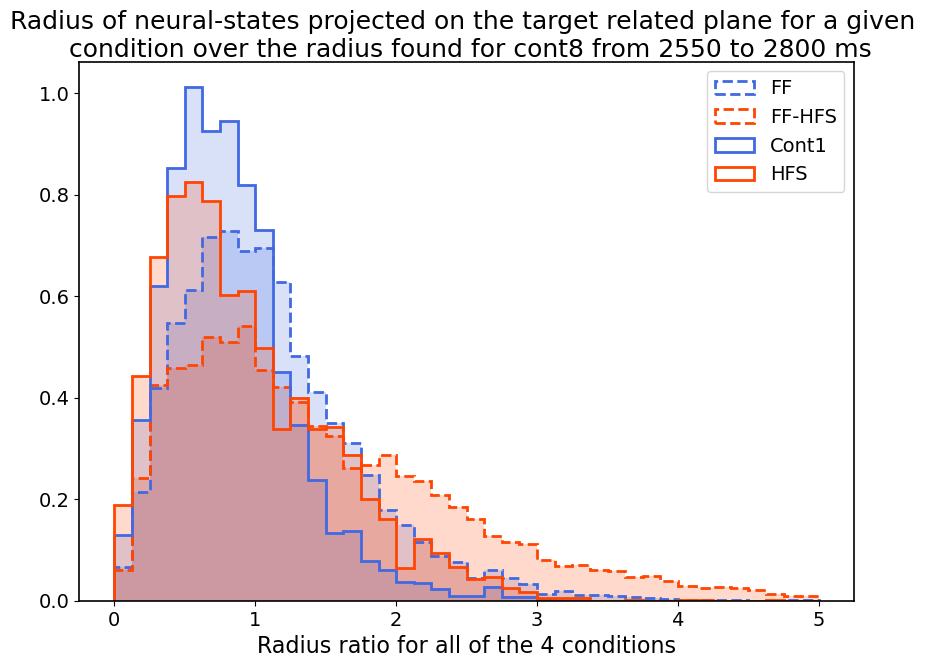

In [102]:
cond_list = ['FF', 'FF-HFS', 'Cont1', 'HFS']
colors = ['royalblue', 'orangered', 'royalblue', 'orangered']
linestyles = ['--', '--', '-', '-']
plt.figure(figsize =(10,7))
plt.rcParams['svg.fonttype'] = 'none'


for cond in range(4):
    plt.hist(radius_ratio[cond], density=True, range = (0,5), bins = 40, label = cond_list[cond], alpha = 1, histtype='step', linewidth = 2, color = colors[cond], linestyle=linestyles[cond])
    plt.hist(radius_ratio[cond], density=True, range = (0,5), bins = 40, alpha = 0.2, histtype='stepfilled', color = colors[cond])
plt.legend()

plt.xlabel('Radius ratio for all of the 4 conditions')
plt.title('Radius of neural-states projected on the target related plane for a given \n condition over the radius found for cont8 from 2550 to 2800 ms', wrap = True)

#plt.savefig(monkey+'_radius_ratio_'+centering+'.svg', transparent=True, bbox_inches="tight")

In [103]:
rr_thresh = 0.5

rvl_ff = np.zeros(120)
rvl_ffhfs = np.zeros(120)
rvl_cont1 = np.zeros(120)
rvl_hfs = np.zeros(120)


for T in range(120):
    (ang_reor_ff, rr_reor_ff, ang_reor_ffhfs, rr_reor_ffhfs, ang_reor_cont1, rr_reor_cont1, ang_reor_hfs, rr_reor_hfs) = get_reor_vars(angles, rr,T,T+10, targets_to_consider)
    
    selec_angle_ffhfs = ang_reor_ffhfs[:,:][(rr_reor_ffhfs[:,:]>rr_thresh)]
    rvl_ffhfs[T] = resultant_vector_length(selec_angle_ffhfs)
    
    selec_angle_ff = ang_reor_ff[:,:][(rr_reor_ff[:,:]>rr_thresh)]
    rvl_ff[T] = resultant_vector_length(selec_angle_ff)
    
    selec_angle_hfs = ang_reor_hfs[:,:][(rr_reor_hfs[:,:]>rr_thresh)]
    rvl_hfs[T] = resultant_vector_length(selec_angle_hfs)
    
    selec_angle_cont1 = ang_reor_cont1[:,:][(rr_reor_cont1[:,:]>rr_thresh)]
    rvl_cont1[T] = resultant_vector_length(selec_angle_cont1)


Text(0.5, 1.0, 'Resultant vector length for a distribution of neural angles over many trials at a given time.\n Only the trials with a radius ratio greater than 0.5 were selected')

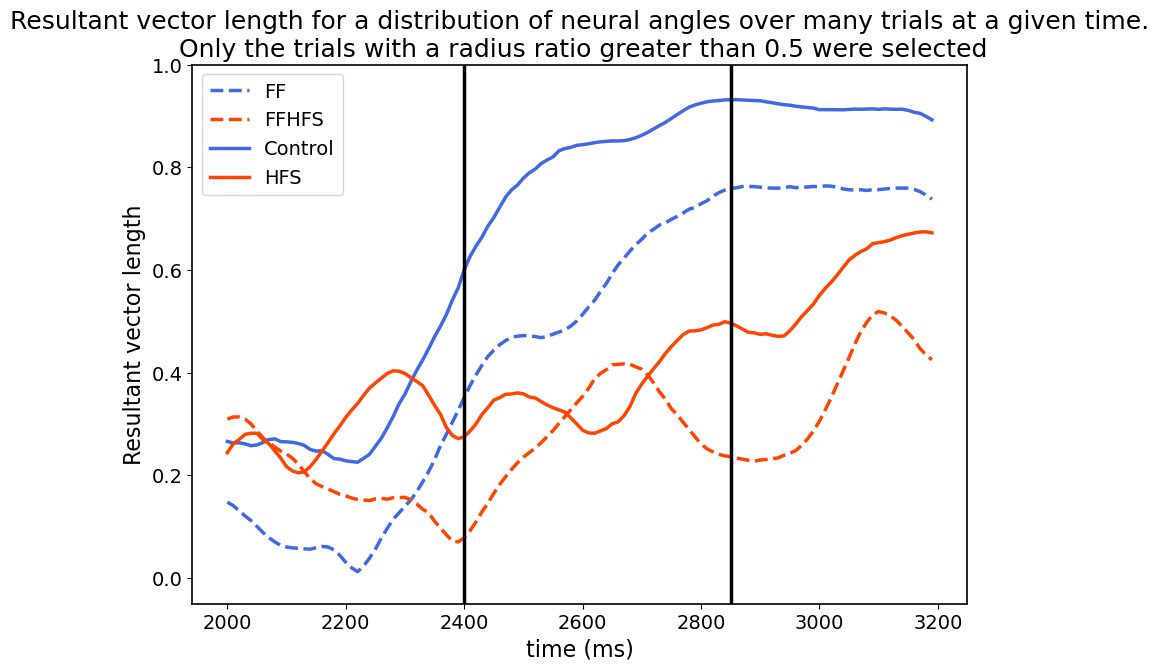

In [104]:
plt.figure(figsize = (10,7))
plt.rcParams['svg.fonttype'] = 'none'

plt.plot(times[:-10],rvl_ff, color = 'royalblue', linestyle = '--', label = 'FF')
plt.plot(times[:-10],rvl_ffhfs, color = 'orangered', linestyle = '--', label = 'FFHFS')
plt.plot(times[:-10],rvl_cont1, color = 'royalblue', label = 'Control')
plt.plot(times[:-10],rvl_hfs, color = 'orangered', label = 'HFS')

plt.vlines(times[T_start], -1, 1, color='k')
plt.vlines(times[T_end], -1, 1, color='k')
plt.ylim(-0.05, 1)
plt.xlabel('time (ms)')
plt.ylabel('Resultant vector length')
plt.legend()
plt.title('Resultant vector length for a distribution of neural angles over many trials at a given time.\n Only the trials with a radius ratio greater than %s were selected'%rr_thresh )
#plt.savefig(monkey+'_RVL_'+centering+'.svg', transparent=True, bbox_inches="tight")

In [105]:
(ang_reor_ff, rr_reor_ff, ang_reor_ffhfs, rr_reor_ffhfs, ang_reor_cont1, rr_reor_cont1, ang_reor_hfs, rr_reor_hfs) = get_reor_vars(angles, rr,T_start,T_end, targets_to_consider)

In [106]:
nb_bin_trials_early = 5
nb_bin_trials_late = 5

early_angle = []
intermediate_angle = []
late_angle = []

for (ang_reor,rr_reor) in [(ang_reor_ff, rr_reor_ff), (ang_reor_ffhfs, rr_reor_ffhfs), (ang_reor_cont1, rr_reor_cont1), (ang_reor_hfs, rr_reor_hfs)]:

    early_angle.append(ang_reor[:,:nb_bin_trials_early][(rr_reor[:,:nb_bin_trials_early]>rr_thresh)])
    late_angle.append(ang_reor[:,-nb_bin_trials_late:][(rr_reor[:,-nb_bin_trials_late:]>rr_thresh)])
    intermediate_angle.append(ang_reor[:,nb_bin_trials_early:-nb_bin_trials_late][(rr_reor[:,nb_bin_trials_early:-nb_bin_trials_late]>rr_thresh)])


total_percent_data_early =(rr_reor_ffhfs[:,:nb_bin_trials_early]>rr_thresh).sum()/ang_reor_ffhfs[:,:nb_bin_trials_early].ravel().shape[0]
total_percent_data_late = (rr_reor_ffhfs[:,-nb_bin_trials_late:]>rr_thresh).sum()/ang_reor_ffhfs[:,-nb_bin_trials_late:].ravel().shape[0]
total_percent_data_intermediate = (rr_reor_ffhfs[:,nb_bin_trials_early:-nb_bin_trials_late]>rr_thresh).sum()/ang_reor_ffhfs[:,nb_bin_trials_early:-nb_bin_trials_late].ravel().shape[0]

In [107]:
print(total_percent_data_early, total_percent_data_late, total_percent_data_intermediate)

0.8554347826086957 0.8590579710144928 0.8551932367149758


In [108]:
avg_angles = np.zeros((4,3))
std_angles = np.zeros((4,3))
err_angles = np.zeros((4,3))

for i in range(4):
    avg_angles[i,0] = compute_angle_average(early_angle[i])
    std_angles[i,0] = circstd(early_angle[i], high = np.pi, low = -np.pi)
    err_angles[i,0] = std_angles[i,0]/np.sqrt(len(early_angle[i]))
for i in range(4):
    avg_angles[i,1] = compute_angle_average(intermediate_angle[i])
    std_angles[i,1] = circstd(intermediate_angle[i], high = np.pi, low = -np.pi)
    err_angles[i,1] = std_angles[i,1]/np.sqrt(len(intermediate_angle[i]))
for i in range(4):
    avg_angles[i,2] = compute_angle_average(late_angle[i])
    std_angles[i,2] = circstd(late_angle[i], high = np.pi, low = -np.pi)
    err_angles[i,2] = std_angles[i,2]/np.sqrt(len(late_angle[i]))

In [109]:
FF_rel_to_cont_angles = get_ang_diff(avg_angles[0,[0,2]] - compute_angle_average(avg_angles[2]))
FFHFS_rel_to_hfs_angles =  get_ang_diff(avg_angles[1,[0,2]] - compute_angle_average(avg_angles[3]))

Text(0.5, 1.0, 'Angular deviation in the first 5 compared to the last 5 trials for sophie')

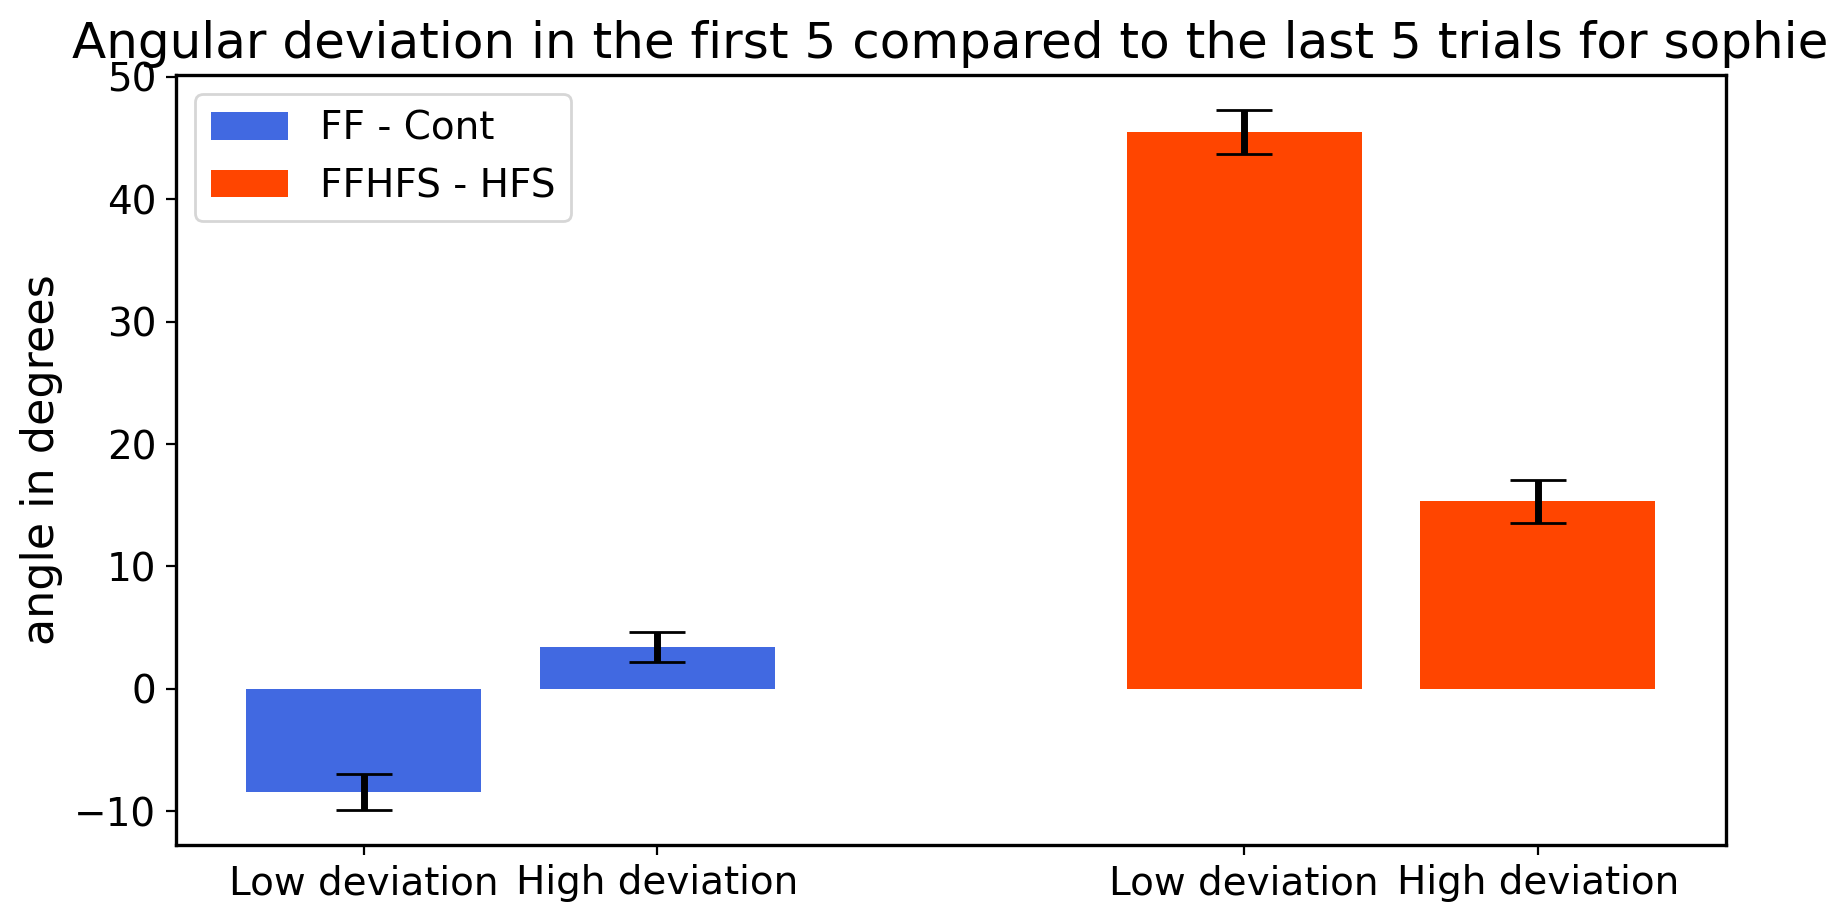

In [110]:
fig, ax = plt.subplots(figsize = (10,5), dpi = 200)
plt.rcParams['svg.fonttype'] = 'none'

xpos = np.array([-0.5,0.5])

colors = ['royalblue', 'orangered']

#ax.bar(xpos, avg_angles[0,[0,2]]*180/np.pi, yerr=err_angles[0,[0,2]]*180/np.pi , label= 'FF', color = colors[0], capsize = 10)
#ax.bar(xpos+3, avg_angles[1,[0,2]]*180/np.pi, yerr=err_angles[1,[0,2]]*180/np.pi , label = 'FFHFS', color = colors[1], capsize = 10)

ax.bar(xpos, FF_rel_to_cont_angles*180/np.pi, yerr=err_angles[0,[0,2]]*180/np.pi , label= 'FF - Cont', color = colors[0], capsize = 10)
ax.bar(xpos+3, FFHFS_rel_to_hfs_angles*180/np.pi, yerr=err_angles[1,[0,2]]*180/np.pi , label = 'FFHFS - HFS', color = colors[1], capsize = 10)

ax.set_xticks([-0.5,0.5,2.5,3.5])
ax.set_xticklabels(['Low deviation', 'High deviation', 'Low deviation', 'High deviation'])

ax.set_ylabel('angle in degrees')
ax.legend()
ax.set_title('Angular deviation in the first %d compared to the last %d trials for '%(nb_bin_trials_early, nb_bin_trials_late)+monkey)
#plt.savefig('Angular_dev_early_VS_late_with_standard_error_rel_to_cont_and_hfs'+monkey+'.pdf', transparent=True, bbox_inches="tight")

In [111]:
ang_thru_dev_ffhfs = []
ang_thru_dev_ffhfs_avg = []
ang_thru_dev_ffhfs_std = []
ang_thru_dev_ffhfs_err = []
for bi in range(25//5):
    ang_thru_dev_ffhfs.append(ang_reor_ffhfs[:,bi*5:(bi+1)*5][(rr_reor_ffhfs[:,bi*5:(bi+1)*5]>rr_thresh)])

for bi in range(25//5):
    ang_thru_dev_ffhfs_avg.append(compute_angle_average(ang_thru_dev_ffhfs[bi]))
    ang_thru_dev_ffhfs_std.append(circstd(ang_thru_dev_ffhfs[bi], high = np.pi, low = -np.pi))
    ang_thru_dev_ffhfs_err.append(ang_thru_dev_ffhfs_std[-1]/np.sqrt(len(ang_thru_dev_ffhfs[bi])))
    

    
    
ang_thru_dev_ff = []
ang_thru_dev_ff_avg = []
ang_thru_dev_ff_std = []
ang_thru_dev_ff_err = []
for bi in range(25//5):
    ang_thru_dev_ff.append(ang_reor_ff[:,bi*5:(bi+1)*5][(rr_reor_ff[:,bi*5:(bi+1)*5]>rr_thresh)])

for bi in range(25//5):
    ang_thru_dev_ff_avg.append(compute_angle_average(ang_thru_dev_ff[bi]))
    ang_thru_dev_ff_std.append(circstd(ang_thru_dev_ff[bi], high = np.pi, low = -np.pi))
    ang_thru_dev_ff_err.append(ang_thru_dev_ff_std[-1]/np.sqrt(len(ang_thru_dev_ff[bi])))

In [112]:
np.array(ang_thru_dev_ffhfs_avg).shape

(5,)

Text(0.5, 0, 'trial, ordered from high deviation to low deviation')

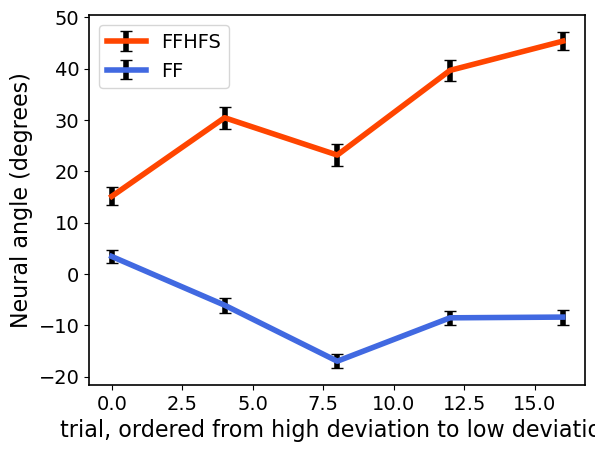

In [113]:
xpos = np.array([0,4,8,12,16])

plt.rcParams['svg.fonttype'] = 'none'


plt.errorbar(xpos[::-1], np.array(ang_thru_dev_ffhfs_avg- compute_angle_average(ang_reor_hfs[(rr_reor_hfs>rr_thresh)]))*180/np.pi, yerr = np.array(ang_thru_dev_ffhfs_err)*180/np.pi, color = 'orangered', label = 'FFHFS', capsize = 4, ecolor = 'k', linewidth = 4)
plt.errorbar(xpos[::-1], (np.array(ang_thru_dev_ff_avg)-compute_angle_average(ang_reor_cont1[(rr_reor_cont1>rr_thresh)]))*180/np.pi,  yerr = np.array(ang_thru_dev_ff_err)*180/np.pi, color = 'royalblue', label = 'FF', capsize = 4, ecolor = 'k', linewidth = 4)
plt.legend()
plt.ylabel('Neural angle (degrees)')
plt.xlabel('trial, ordered from high deviation to low deviation')
#plt.savefig('Angular_dev_thru_maxdev_with_standard_error_rel_to_cont_and_hfs_'+monkey+'.svg', transparent=True, bbox_inches="tight")

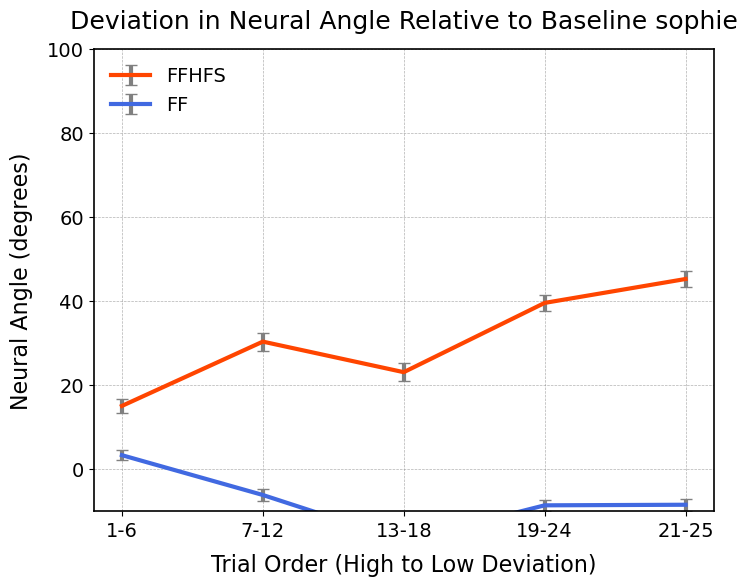

In [114]:
# Sample data, replace with actual data
xpos = np.array([0, 4, 8, 12,16])  # X positions for data points

# Plotting Parameters
plt.figure(figsize=(8, 6))
plt.rcParams.update({
    'svg.fonttype': 'none',
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'lines.linewidth': 2.5,
    'axes.linewidth': 1.2,
})

# Inverting the order of xpos to follow the high-to-low convention
x_ordered = xpos[::-1]

# Plotting the FFHFS and FF error bars with enhanced styling
plt.errorbar(x_ordered, 
             np.array(ang_thru_dev_ffhfs_avg- compute_angle_average(ang_reor_hfs[(rr_reor_hfs>rr_thresh)]))*180/np.pi,
             yerr=np.array(ang_thru_dev_ffhfs_err) * 180 / np.pi,
             color='orangered', label='FFHFS', 
             capsize=4, ecolor='grey', linewidth=3)

plt.errorbar(x_ordered, 
             (np.array(ang_thru_dev_ff_avg)-compute_angle_average(ang_reor_cont1[(rr_reor_cont1>rr_thresh)]))*180/np.pi,
             yerr=np.array(ang_thru_dev_ff_err) * 180 / np.pi,
             color='royalblue', label='FF', 
             capsize=4, ecolor='grey', linewidth=3)

plt.ylim((-10,100))

# Customizations for aesthetics
plt.ylabel('Neural Angle (degrees)', fontsize=16, labelpad=10)
plt.xlabel('Trial Order (High to Low Deviation)', fontsize=16, labelpad=10)
plt.title('Deviation in Neural Angle Relative to Baseline '+monkey, fontsize=18, pad=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.6)
plt.legend(loc='upper left', frameon=False)
plt.xticks(xpos, ['1-6','7-12','13-18','19-24','21-25'])

# Saving as high-resolution SVG
#plt.savefig('Rev1_angular_Deviation_through_maxdev_'+monkey+'_targets_'+str(targets_to_consider)+'start2600_stop2800'+'.svg', transparent=True, bbox_inches="tight", dpi=300)
#plt.savefig('Rev1_angular_Deviation_through_maxdev_'+monkey+'_targets_'+str(targets_to_consider)+'start2600_stop2800'+'.pdf', transparent=True, bbox_inches="tight", dpi=300)
plt.show()


## Penny

In [115]:
monkey = 'penny'
times = np.arange(2000, 3300, 10)
centering = 'go'
stats = np.load('stats_'+monkey+'_go_validt_maxdev_ordering_[10, 10, 25, 25]_windowsize_10.npy', allow_pickle=True)

In [116]:
T_start = 40
T_end = 85
print(times[T_start], times[T_end])

targets_to_consider = [3,7] 

2400 2850


In [117]:
# getting the radius of the projections on the TDR plane
radii = np.abs(stats[:,2])
radii_ct8 = np.abs(stats[:,3])
rr = radii/radii_ct8 # this is the radius ratio

angles = stats[:,1,:]

radius_ratio = [np.array([])]*4
for t in range(T_start,T_end):#range(times.shape[0]):
    for cond in range(4):
        radius_ratio[cond] = np.concatenate((radius_ratio[cond], rr[t,cond].ravel()))

/var/folders/tz/7jgtwmdx0rzbplvnb9_wvmp00000gp/T/ipykernel_56924/1167106644.py:4: RuntimeWarning: invalid value encountered in divide
  rr = radii/radii_ct8 # this is the radius ratio


Text(0.5, 1.0, 'Radius of neural-states projected on the target related plane for a given \n condition over the radius found for cont8 from 2550 to 2800 ms')

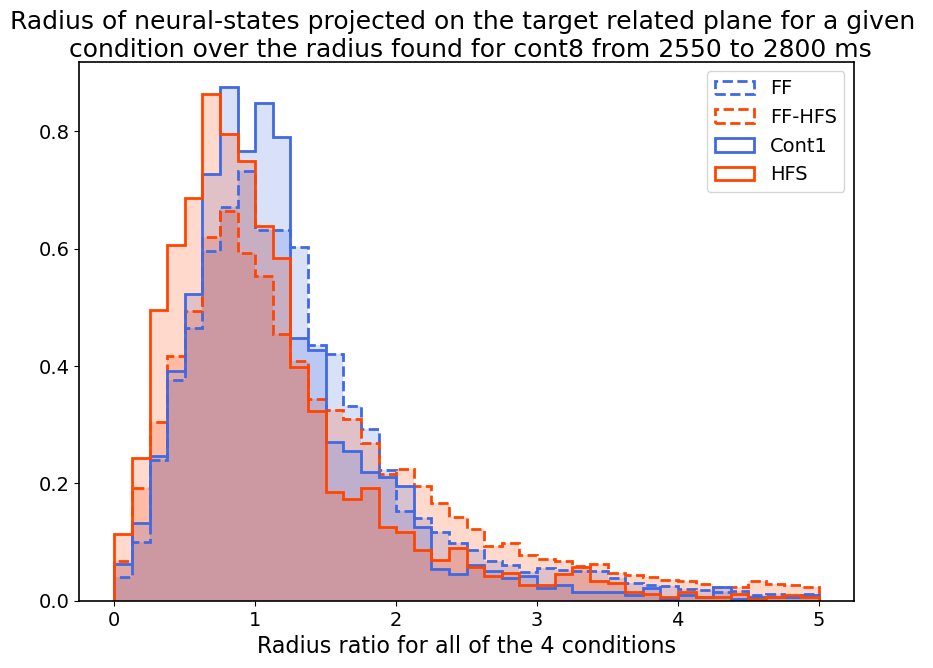

In [118]:
cond_list = ['FF', 'FF-HFS', 'Cont1', 'HFS']
colors = ['royalblue', 'orangered', 'royalblue', 'orangered']
linestyles = ['--', '--', '-', '-']
plt.figure(figsize =(10,7))
plt.rcParams['svg.fonttype'] = 'none'


for cond in range(4):
    plt.hist(radius_ratio[cond], density=True, range = (0,5), bins = 40, label = cond_list[cond], alpha = 1, histtype='step', linewidth = 2, color = colors[cond], linestyle=linestyles[cond])
    plt.hist(radius_ratio[cond], density=True, range = (0,5), bins = 40, alpha = 0.2, histtype='stepfilled', color = colors[cond])
plt.legend()

plt.xlabel('Radius ratio for all of the 4 conditions')
plt.title('Radius of neural-states projected on the target related plane for a given \n condition over the radius found for cont8 from 2550 to 2800 ms', wrap = True)

#plt.savefig(monkey+'_radius_ratio_'+centering+'.svg', transparent=True, bbox_inches="tight")

In [119]:
rr_thresh = 0.5

rvl_ff = np.zeros(120)
rvl_ffhfs = np.zeros(120)
rvl_cont1 = np.zeros(120)
rvl_hfs = np.zeros(120)


for T in range(120):
    (ang_reor_ff, rr_reor_ff, ang_reor_ffhfs, rr_reor_ffhfs, ang_reor_cont1, rr_reor_cont1, ang_reor_hfs, rr_reor_hfs) = get_reor_vars(angles, rr,T,T+10, targets_to_consider)
    
    selec_angle_ffhfs = ang_reor_ffhfs[:,:][(rr_reor_ffhfs[:,:]>rr_thresh)]
    rvl_ffhfs[T] = resultant_vector_length(selec_angle_ffhfs)
    
    selec_angle_ff = ang_reor_ff[:,:][(rr_reor_ff[:,:]>rr_thresh)]
    rvl_ff[T] = resultant_vector_length(selec_angle_ff)
    
    selec_angle_hfs = ang_reor_hfs[:,:][(rr_reor_hfs[:,:]>rr_thresh)]
    rvl_hfs[T] = resultant_vector_length(selec_angle_hfs)
    
    selec_angle_cont1 = ang_reor_cont1[:,:][(rr_reor_cont1[:,:]>rr_thresh)]
    rvl_cont1[T] = resultant_vector_length(selec_angle_cont1)


Text(0.5, 1.0, 'Resultant vector length for a distribution of neural angles over many trials at a given time.\n Only the trials with a radius ratio greater than 0.5 were selected')

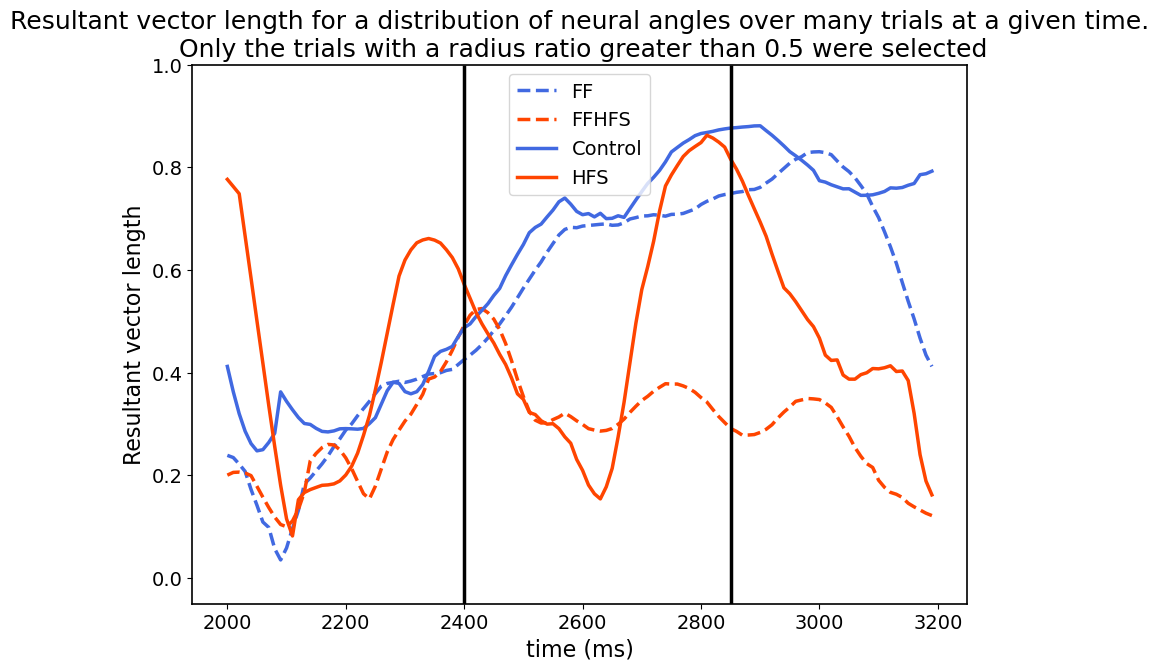

In [120]:
plt.figure(figsize = (10,7))
plt.rcParams['svg.fonttype'] = 'none'

plt.plot(times[:-10],rvl_ff, color = 'royalblue', linestyle = '--', label = 'FF')
plt.plot(times[:-10],rvl_ffhfs, color = 'orangered', linestyle = '--', label = 'FFHFS')
plt.plot(times[:-10],rvl_cont1, color = 'royalblue', label = 'Control')
plt.plot(times[:-10],rvl_hfs, color = 'orangered', label = 'HFS')

plt.vlines(times[T_start], -1, 1, color='k')
plt.vlines(times[T_end], -1, 1, color='k')
plt.ylim(-0.05, 1)
plt.xlabel('time (ms)')
plt.ylabel('Resultant vector length')
plt.legend()
plt.title('Resultant vector length for a distribution of neural angles over many trials at a given time.\n Only the trials with a radius ratio greater than %s were selected'%rr_thresh )
#plt.savefig(monkey+'_RVL_'+centering+'.svg', transparent=True, bbox_inches="tight")

In [121]:
(ang_reor_ff, rr_reor_ff, ang_reor_ffhfs, rr_reor_ffhfs, ang_reor_cont1, rr_reor_cont1, ang_reor_hfs, rr_reor_hfs) = get_reor_vars(angles, rr,T_start,T_end, targets_to_consider)

In [122]:
nb_bin_trials_early = 5
nb_bin_trials_late = 5

early_angle = []
intermediate_angle = []
late_angle = []

for (ang_reor,rr_reor) in [(ang_reor_ff, rr_reor_ff), (ang_reor_ffhfs, rr_reor_ffhfs), (ang_reor_cont1, rr_reor_cont1), (ang_reor_hfs, rr_reor_hfs)]:

    early_angle.append(ang_reor[:,:nb_bin_trials_early][(rr_reor[:,:nb_bin_trials_early]>rr_thresh)])
    late_angle.append(ang_reor[:,-nb_bin_trials_late:][(rr_reor[:,-nb_bin_trials_late:]>rr_thresh)])
    intermediate_angle.append(ang_reor[:,nb_bin_trials_early:-nb_bin_trials_late][(rr_reor[:,nb_bin_trials_early:-nb_bin_trials_late]>rr_thresh)])


total_percent_data_early =(rr_reor_ffhfs[:,:nb_bin_trials_early]>rr_thresh).sum()/ang_reor_ffhfs[:,:nb_bin_trials_early].ravel().shape[0]
total_percent_data_late = (rr_reor_ffhfs[:,-nb_bin_trials_late:]>rr_thresh).sum()/ang_reor_ffhfs[:,-nb_bin_trials_late:].ravel().shape[0]
total_percent_data_intermediate = (rr_reor_ffhfs[:,nb_bin_trials_early:-nb_bin_trials_late]>rr_thresh).sum()/ang_reor_ffhfs[:,nb_bin_trials_early:-nb_bin_trials_late].ravel().shape[0]

In [123]:
print(total_percent_data_early, total_percent_data_late, total_percent_data_intermediate)

0.9597826086956521 0.9119565217391304 0.9518115942028985


In [124]:
avg_angles = np.zeros((4,3))
std_angles = np.zeros((4,3))
err_angles = np.zeros((4,3))

for i in range(4):
    avg_angles[i,0] = compute_angle_average(early_angle[i])
    std_angles[i,0] = circstd(early_angle[i], high = np.pi, low = -np.pi)
    err_angles[i,0] = std_angles[i,0]/np.sqrt(len(early_angle[i]))
for i in range(4):
    avg_angles[i,1] = compute_angle_average(intermediate_angle[i])
    std_angles[i,1] = circstd(intermediate_angle[i], high = np.pi, low = -np.pi)
    err_angles[i,1] = std_angles[i,1]/np.sqrt(len(intermediate_angle[i]))
for i in range(4):
    avg_angles[i,2] = compute_angle_average(late_angle[i])
    std_angles[i,2] = circstd(late_angle[i], high = np.pi, low = -np.pi)
    err_angles[i,2] = std_angles[i,2]/np.sqrt(len(late_angle[i]))

/Users/ninou/Nextcloud/These/data_sharon/for_github/functions.py:29: RuntimeWarning: Mean of empty slice
  return np.angle(np.nanmean(cplx, axis=axis))


In [125]:
FF_rel_to_cont_angles = get_ang_diff(avg_angles[0,[0,2]] - compute_angle_average(avg_angles[2]))
FFHFS_rel_to_hfs_angles =  get_ang_diff(avg_angles[1,[0,2]] - compute_angle_average(avg_angles[3]))

Text(0.5, 1.0, 'Angular deviation in the first 5 compared to the last 5 trials for penny')

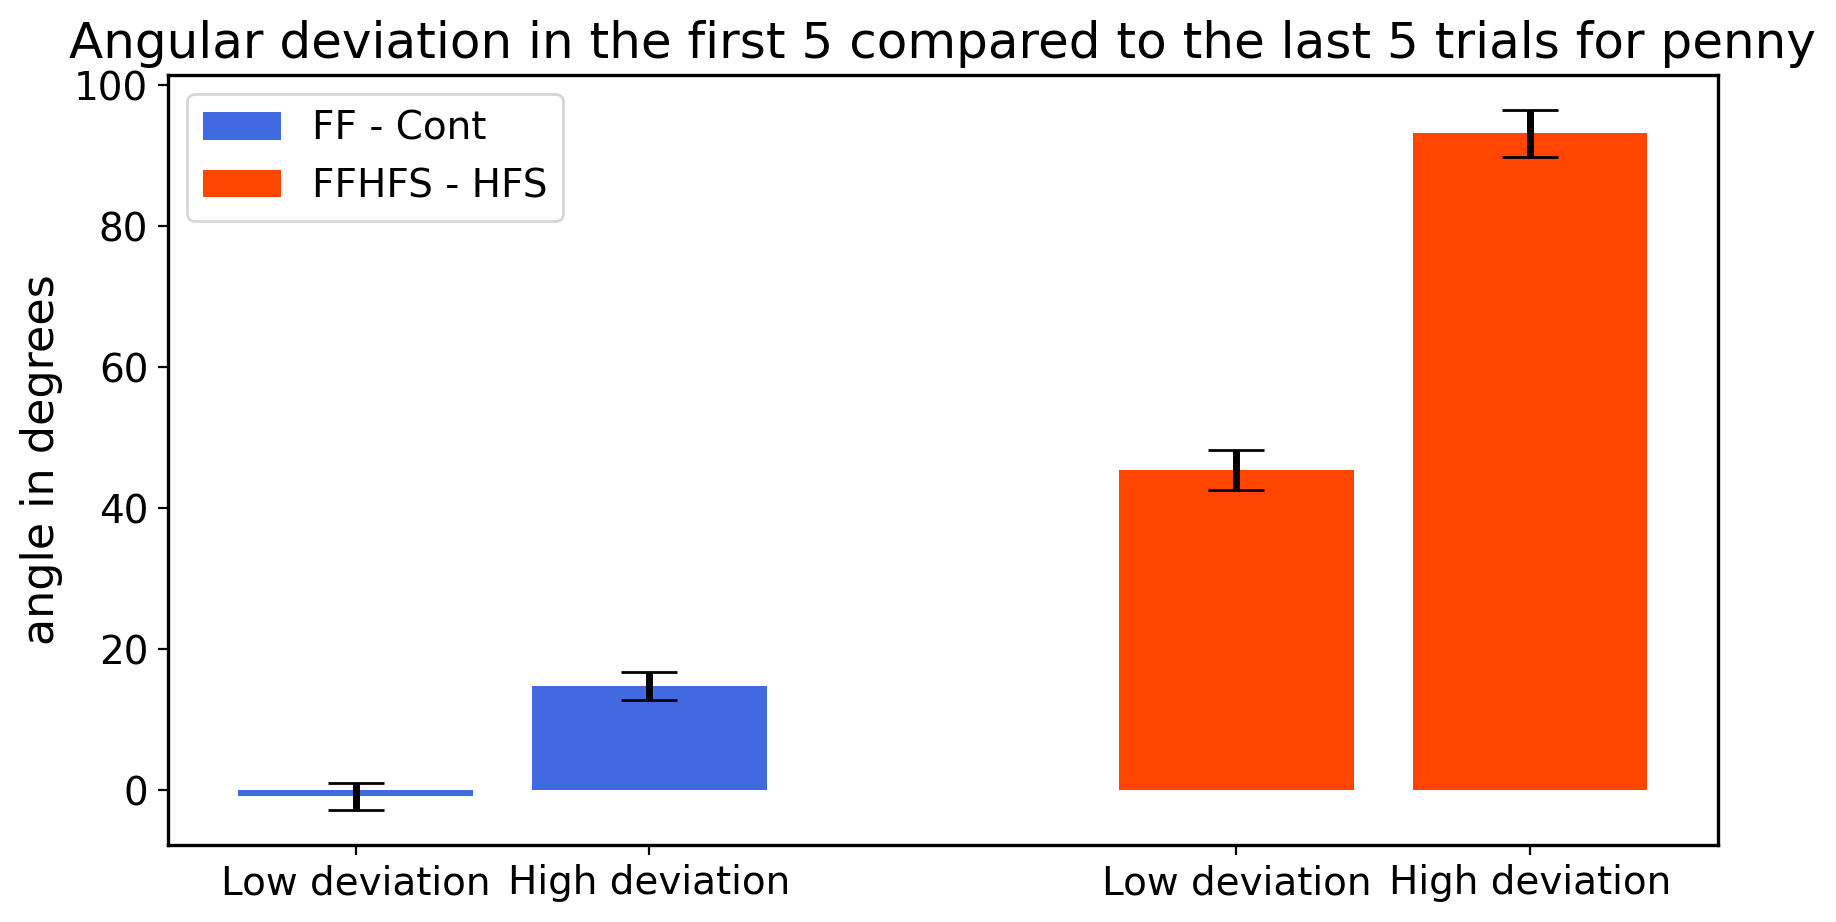

In [126]:
fig, ax = plt.subplots(figsize = (10,5), dpi = 200)
plt.rcParams['svg.fonttype'] = 'none'

xpos = np.array([-0.5,0.5])

colors = ['royalblue', 'orangered']

#ax.bar(xpos, avg_angles[0,[0,2]]*180/np.pi, yerr=err_angles[0,[0,2]]*180/np.pi , label= 'FF', color = colors[0], capsize = 10)
#ax.bar(xpos+3, avg_angles[1,[0,2]]*180/np.pi, yerr=err_angles[1,[0,2]]*180/np.pi , label = 'FFHFS', color = colors[1], capsize = 10)

ax.bar(xpos, FF_rel_to_cont_angles*180/np.pi, yerr=err_angles[0,[0,2]]*180/np.pi , label= 'FF - Cont', color = colors[0], capsize = 10)
ax.bar(xpos+3, FFHFS_rel_to_hfs_angles*180/np.pi, yerr=err_angles[1,[0,2]]*180/np.pi , label = 'FFHFS - HFS', color = colors[1], capsize = 10)

ax.set_xticks([-0.5,0.5,2.5,3.5])
ax.set_xticklabels(['Low deviation', 'High deviation', 'Low deviation', 'High deviation'])

ax.set_ylabel('angle in degrees')
ax.legend()
ax.set_title('Angular deviation in the first %d compared to the last %d trials for '%(nb_bin_trials_early, nb_bin_trials_late)+monkey)
#plt.savefig('Angular_dev_early_VS_late_with_standard_error_rel_to_cont_and_hfs'+monkey+'.svg', transparent=True, bbox_inches="tight")

In [127]:
ang_thru_dev_ffhfs = []
ang_thru_dev_ffhfs_avg = []
ang_thru_dev_ffhfs_std = []
ang_thru_dev_ffhfs_err = []
for bi in range(25//5):
    ang_thru_dev_ffhfs.append(ang_reor_ffhfs[:,bi*5:(bi+1)*5][(rr_reor_ffhfs[:,bi*5:(bi+1)*5]>rr_thresh)])

for bi in range(25//5):
    ang_thru_dev_ffhfs_avg.append(compute_angle_average(ang_thru_dev_ffhfs[bi]))
    ang_thru_dev_ffhfs_std.append(circstd(ang_thru_dev_ffhfs[bi], high = np.pi, low = -np.pi))
    ang_thru_dev_ffhfs_err.append(ang_thru_dev_ffhfs_std[-1]/np.sqrt(len(ang_thru_dev_ffhfs[bi])))
    

    
    
ang_thru_dev_ff = []
ang_thru_dev_ff_avg = []
ang_thru_dev_ff_std = []
ang_thru_dev_ff_err = []
for bi in range(25//5):
    ang_thru_dev_ff.append(ang_reor_ff[:,bi*5:(bi+1)*5][(rr_reor_ff[:,bi*5:(bi+1)*5]>rr_thresh)])

for bi in range(25//5):
    ang_thru_dev_ff_avg.append(compute_angle_average(ang_thru_dev_ff[bi]))
    ang_thru_dev_ff_std.append(circstd(ang_thru_dev_ff[bi], high = np.pi, low = -np.pi))
    ang_thru_dev_ff_err.append(ang_thru_dev_ff_std[-1]/np.sqrt(len(ang_thru_dev_ff[bi])))

In [128]:
np.array(ang_thru_dev_ffhfs_avg).shape

(5,)

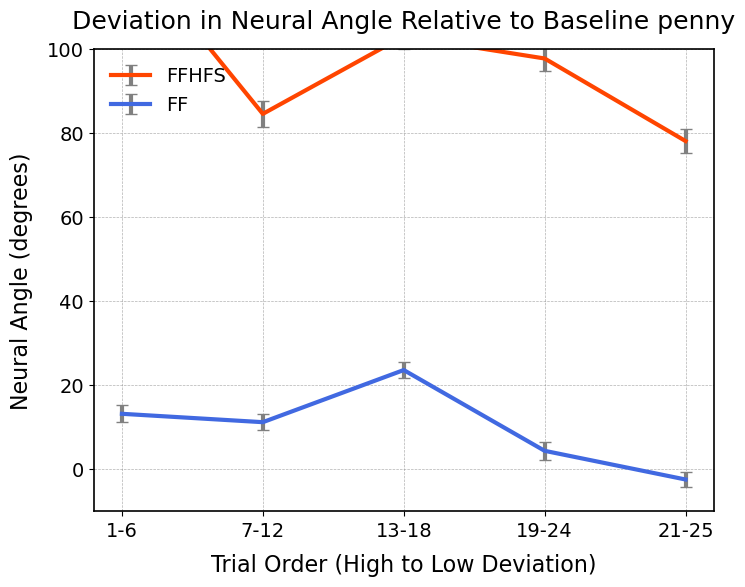

In [129]:
# Sample data, replace with actual data
xpos = np.array([0, 4, 8, 12,16])  # X positions for data points

# Plotting Parameters
plt.figure(figsize=(8, 6))
plt.rcParams.update({
    'svg.fonttype': 'none',
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'lines.linewidth': 2.5,
    'axes.linewidth': 1.2,
})

# Inverting the order of xpos to follow the high-to-low convention
x_ordered = xpos[::-1]

# Plotting the FFHFS and FF error bars with enhanced styling
plt.errorbar(x_ordered, 
             np.array(ang_thru_dev_ffhfs_avg- compute_angle_average(ang_reor_hfs[(rr_reor_hfs>rr_thresh)]))*180/np.pi,
             yerr=np.array(ang_thru_dev_ffhfs_err) * 180 / np.pi,
             color='orangered', label='FFHFS', 
             capsize=4, ecolor='grey', linewidth=3)

plt.errorbar(x_ordered, 
             (np.array(ang_thru_dev_ff_avg)-compute_angle_average(ang_reor_cont1[(rr_reor_cont1>rr_thresh)]))*180/np.pi,
             yerr=np.array(ang_thru_dev_ff_err) * 180 / np.pi,
             color='royalblue', label='FF', 
             capsize=4, ecolor='grey', linewidth=3)

plt.ylim((-10,100))

# Customizations for aesthetics
plt.ylabel('Neural Angle (degrees)', fontsize=16, labelpad=10)
plt.xlabel('Trial Order (High to Low Deviation)', fontsize=16, labelpad=10)
plt.title('Deviation in Neural Angle Relative to Baseline '+monkey, fontsize=18, pad=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.6)
plt.legend(loc='upper left', frameon=False)
plt.xticks(xpos, ['1-6','7-12','13-18','19-24','21-25'])

# Saving as high-resolution SVG
#plt.savefig('Rev1_angular_Deviation_through_maxdev_'+monkey+'_targets_'+str(targets_to_consider)+'start2600_stop2800'+'.svg', transparent=True, bbox_inches="tight", dpi=300)
#plt.savefig('Rev1_angular_Deviation_through_maxdev_'+monkey+'_targets_'+str(targets_to_consider)+'start2600_stop2800'+'.pdf', transparent=True, bbox_inches="tight", dpi=300)
plt.show()


## Penny

In [130]:
monkey = 'penny'
times = np.arange(2000, 3300, 10)
centering = 'go'
stats = np.load('stats_'+monkey+'_go_validt_maxdev_ordering_[10, 10, 25, 25]_windowsize_10.npy', allow_pickle=True)

In [131]:
T_start = 40
T_end = 85
print(times[T_start], times[T_end])

targets_to_consider =[3,7]#[1,2,3,5,6,7]#[3,7] 

2400 2850


In [132]:
# getting the radius of the projections on the TDR plane
radii = np.abs(stats[:,2])
radii_ct8 = np.abs(stats[:,3])
rr = radii/radii_ct8 # this is the radius ratio

angles = stats[:,1,:]

radius_ratio = [np.array([])]*4
for t in range(T_start,T_end):#range(times.shape[0]):
    for cond in range(4):
        radius_ratio[cond] = np.concatenate((radius_ratio[cond], rr[t,cond].ravel()))

/var/folders/tz/7jgtwmdx0rzbplvnb9_wvmp00000gp/T/ipykernel_56924/1167106644.py:4: RuntimeWarning: invalid value encountered in divide
  rr = radii/radii_ct8 # this is the radius ratio


Text(0.5, 1.0, 'Radius of neural-states projected on the target related plane for a given \n condition over the radius found for cont8 from 2550 to 2800 ms')

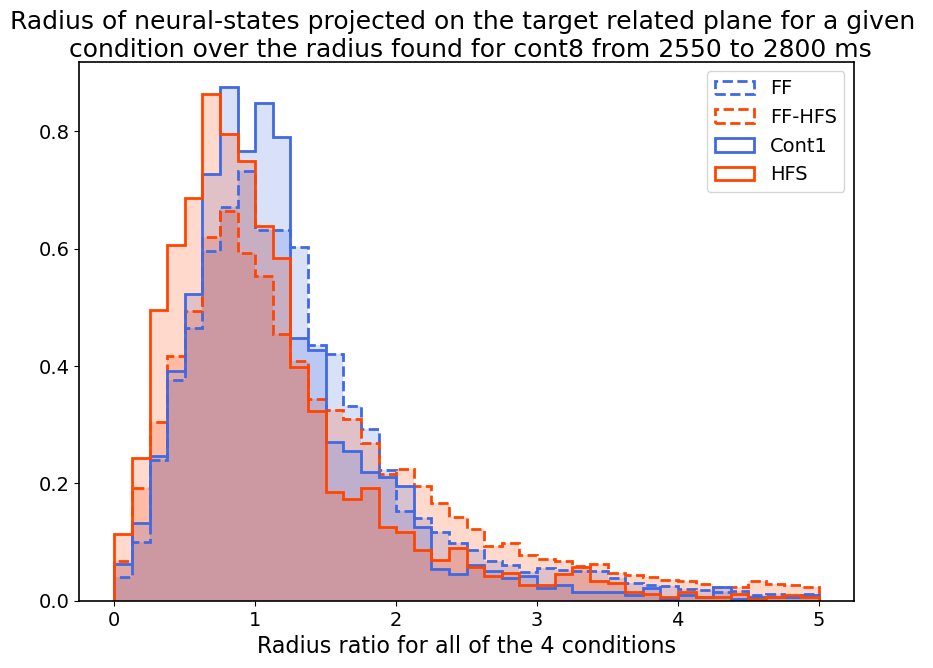

In [133]:
cond_list = ['FF', 'FF-HFS', 'Cont1', 'HFS']
colors = ['royalblue', 'orangered', 'royalblue', 'orangered']
linestyles = ['--', '--', '-', '-']
plt.figure(figsize =(10,7))
plt.rcParams['svg.fonttype'] = 'none'


for cond in range(4):
    plt.hist(radius_ratio[cond], density=True, range = (0,5), bins = 40, label = cond_list[cond], alpha = 1, histtype='step', linewidth = 2, color = colors[cond], linestyle=linestyles[cond])
    plt.hist(radius_ratio[cond], density=True, range = (0,5), bins = 40, alpha = 0.2, histtype='stepfilled', color = colors[cond])
plt.legend()

plt.xlabel('Radius ratio for all of the 4 conditions')
plt.title('Radius of neural-states projected on the target related plane for a given \n condition over the radius found for cont8 from 2550 to 2800 ms', wrap = True)

#plt.savefig(monkey+'_radius_ratio_'+centering+'.svg', transparent=True, bbox_inches="tight")

In [134]:
rr_thresh = 0.5

rvl_ff = np.zeros(120)
rvl_ffhfs = np.zeros(120)
rvl_cont1 = np.zeros(120)
rvl_hfs = np.zeros(120)


for T in range(120):
    (ang_reor_ff, rr_reor_ff, ang_reor_ffhfs, rr_reor_ffhfs, ang_reor_cont1, rr_reor_cont1, ang_reor_hfs, rr_reor_hfs) = get_reor_vars(angles, rr,T,T+10, targets_to_consider)
    
    selec_angle_ffhfs = ang_reor_ffhfs[:,:][(rr_reor_ffhfs[:,:]>rr_thresh)]
    rvl_ffhfs[T] = resultant_vector_length(selec_angle_ffhfs)
    
    selec_angle_ff = ang_reor_ff[:,:][(rr_reor_ff[:,:]>rr_thresh)]
    rvl_ff[T] = resultant_vector_length(selec_angle_ff)
    
    selec_angle_hfs = ang_reor_hfs[:,:][(rr_reor_hfs[:,:]>rr_thresh)]
    rvl_hfs[T] = resultant_vector_length(selec_angle_hfs)
    
    selec_angle_cont1 = ang_reor_cont1[:,:][(rr_reor_cont1[:,:]>rr_thresh)]
    rvl_cont1[T] = resultant_vector_length(selec_angle_cont1)


Text(0.5, 1.0, 'Resultant vector length for a distribution of neural angles over many trials at a given time.\n Only the trials with a radius ratio greater than 0.5 were selected')

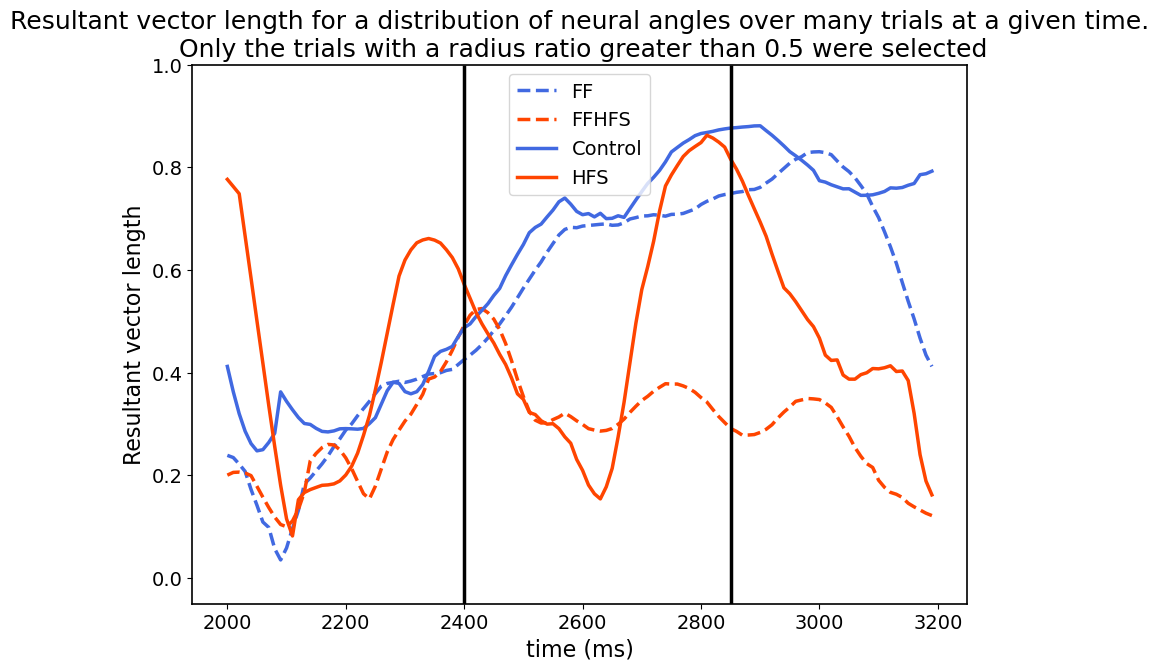

In [135]:
plt.figure(figsize = (10,7))
plt.rcParams['svg.fonttype'] = 'none'

plt.plot(times[:-10],rvl_ff, color = 'royalblue', linestyle = '--', label = 'FF')
plt.plot(times[:-10],rvl_ffhfs, color = 'orangered', linestyle = '--', label = 'FFHFS')
plt.plot(times[:-10],rvl_cont1, color = 'royalblue', label = 'Control')
plt.plot(times[:-10],rvl_hfs, color = 'orangered', label = 'HFS')

plt.vlines(times[T_start], -1, 1, color='k')
plt.vlines(times[T_end], -1, 1, color='k')
plt.ylim(-0.05, 1)
plt.xlabel('time (ms)')
plt.ylabel('Resultant vector length')
plt.legend()
plt.title('Resultant vector length for a distribution of neural angles over many trials at a given time.\n Only the trials with a radius ratio greater than %s were selected'%rr_thresh )
#plt.savefig(monkey+'_RVL_'+centering+'.svg', transparent=True, bbox_inches="tight")

In [136]:
(ang_reor_ff, rr_reor_ff, ang_reor_ffhfs, rr_reor_ffhfs, ang_reor_cont1, rr_reor_cont1, ang_reor_hfs, rr_reor_hfs) = get_reor_vars(angles, rr,T_start,T_end, targets_to_consider)

In [137]:
nb_bin_trials_early = 5
nb_bin_trials_late = 5

early_angle = []
intermediate_angle = []
late_angle = []

for (ang_reor,rr_reor) in [(ang_reor_ff, rr_reor_ff), (ang_reor_ffhfs, rr_reor_ffhfs), (ang_reor_cont1, rr_reor_cont1), (ang_reor_hfs, rr_reor_hfs)]:

    early_angle.append(ang_reor[:,:nb_bin_trials_early][(rr_reor[:,:nb_bin_trials_early]>rr_thresh)])
    late_angle.append(ang_reor[:,-nb_bin_trials_late:][(rr_reor[:,-nb_bin_trials_late:]>rr_thresh)])
    intermediate_angle.append(ang_reor[:,nb_bin_trials_early:-nb_bin_trials_late][(rr_reor[:,nb_bin_trials_early:-nb_bin_trials_late]>rr_thresh)])


total_percent_data_early =(rr_reor_ffhfs[:,:nb_bin_trials_early]>rr_thresh).sum()/ang_reor_ffhfs[:,:nb_bin_trials_early].ravel().shape[0]
total_percent_data_late = (rr_reor_ffhfs[:,-nb_bin_trials_late:]>rr_thresh).sum()/ang_reor_ffhfs[:,-nb_bin_trials_late:].ravel().shape[0]
total_percent_data_intermediate = (rr_reor_ffhfs[:,nb_bin_trials_early:-nb_bin_trials_late]>rr_thresh).sum()/ang_reor_ffhfs[:,nb_bin_trials_early:-nb_bin_trials_late].ravel().shape[0]

In [138]:
print(total_percent_data_early, total_percent_data_late, total_percent_data_intermediate)

0.9597826086956521 0.9119565217391304 0.9518115942028985


In [139]:
avg_angles = np.zeros((4,3))
std_angles = np.zeros((4,3))
err_angles = np.zeros((4,3))

for i in range(4):
    avg_angles[i,0] = compute_angle_average(early_angle[i])
    std_angles[i,0] = circstd(early_angle[i], high = np.pi, low = -np.pi)
    err_angles[i,0] = std_angles[i,0]/np.sqrt(len(early_angle[i]))
for i in range(4):
    avg_angles[i,1] = compute_angle_average(intermediate_angle[i])
    std_angles[i,1] = circstd(intermediate_angle[i], high = np.pi, low = -np.pi)
    err_angles[i,1] = std_angles[i,1]/np.sqrt(len(intermediate_angle[i]))
for i in range(4):
    avg_angles[i,2] = compute_angle_average(late_angle[i])
    std_angles[i,2] = circstd(late_angle[i], high = np.pi, low = -np.pi)
    err_angles[i,2] = std_angles[i,2]/np.sqrt(len(late_angle[i]))

/Users/ninou/Nextcloud/These/data_sharon/for_github/functions.py:29: RuntimeWarning: Mean of empty slice
  return np.angle(np.nanmean(cplx, axis=axis))


In [140]:
FF_rel_to_cont_angles = get_ang_diff(avg_angles[0,[0,2]] - compute_angle_average(avg_angles[2]))
FFHFS_rel_to_hfs_angles =  get_ang_diff(avg_angles[1,[0,2]] - compute_angle_average(avg_angles[3]))

Text(0.5, 1.0, 'Angular deviation in the first 5 compared to the last 5 trials for penny')

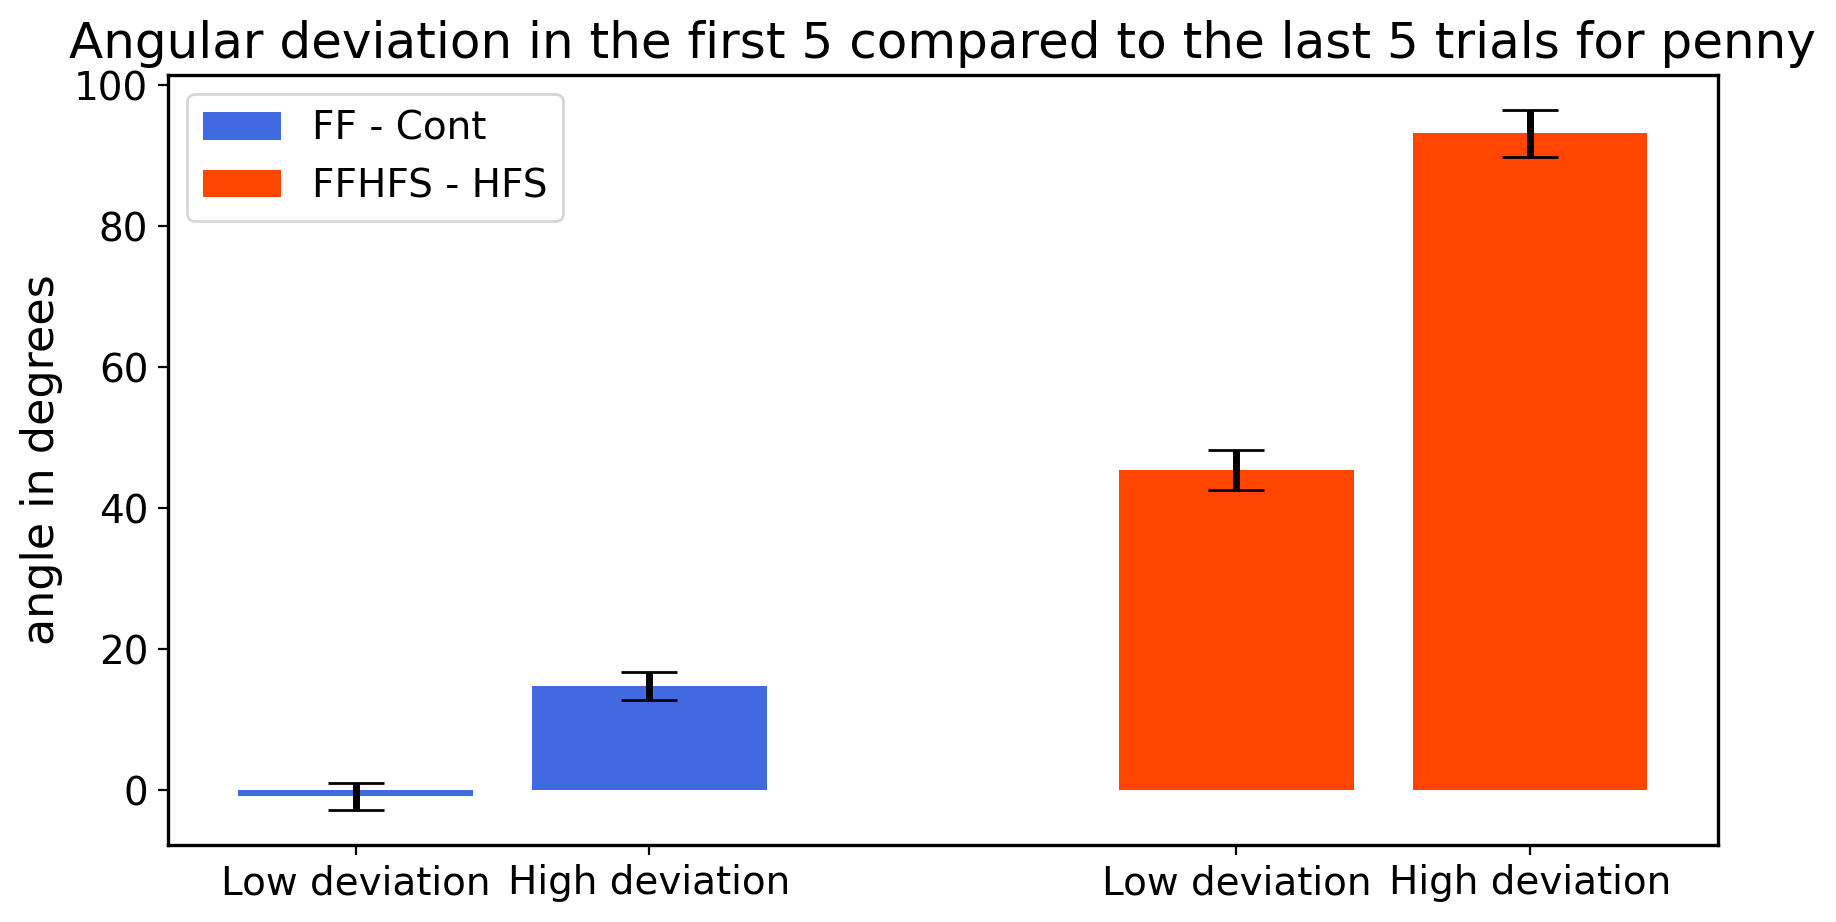

In [141]:
fig, ax = plt.subplots(figsize = (10,5), dpi = 200)
plt.rcParams['svg.fonttype'] = 'none'

xpos = np.array([-0.5,0.5])

colors = ['royalblue', 'orangered']

#ax.bar(xpos, avg_angles[0,[0,2]]*180/np.pi, yerr=err_angles[0,[0,2]]*180/np.pi , label= 'FF', color = colors[0], capsize = 10)
#ax.bar(xpos+3, avg_angles[1,[0,2]]*180/np.pi, yerr=err_angles[1,[0,2]]*180/np.pi , label = 'FFHFS', color = colors[1], capsize = 10)

ax.bar(xpos, FF_rel_to_cont_angles*180/np.pi, yerr=err_angles[0,[0,2]]*180/np.pi , label= 'FF - Cont', color = colors[0], capsize = 10)
ax.bar(xpos+3, FFHFS_rel_to_hfs_angles*180/np.pi, yerr=err_angles[1,[0,2]]*180/np.pi , label = 'FFHFS - HFS', color = colors[1], capsize = 10)

ax.set_xticks([-0.5,0.5,2.5,3.5])
ax.set_xticklabels(['Low deviation', 'High deviation', 'Low deviation', 'High deviation'])

ax.set_ylabel('angle in degrees')
ax.legend()
ax.set_title('Angular deviation in the first %d compared to the last %d trials for '%(nb_bin_trials_early, nb_bin_trials_late)+monkey)
#plt.savefig('Angular_dev_early_VS_late_with_standard_error_rel_to_cont_and_hfs'+monkey+'.svg', transparent=True, bbox_inches="tight")

In [142]:
ang_thru_dev_ffhfs = []
ang_thru_dev_ffhfs_avg = []
ang_thru_dev_ffhfs_std = []
ang_thru_dev_ffhfs_err = []
nb_bins = 5
for bi in range(nb_bins):
    ang_thru_dev_ffhfs.append(ang_reor_ffhfs[:,bi*25//nb_bins:(bi+1)*25//nb_bins][(rr_reor_ffhfs[:,bi*25//nb_bins:(bi+1)*25//nb_bins]>rr_thresh)])

for bi in range(nb_bins):
    ang_thru_dev_ffhfs_avg.append(compute_angle_average(ang_thru_dev_ffhfs[bi]))
    ang_thru_dev_ffhfs_std.append(circstd(ang_thru_dev_ffhfs[bi], high = np.pi, low = -np.pi))
    ang_thru_dev_ffhfs_err.append(ang_thru_dev_ffhfs_std[-1]/np.sqrt(len(ang_thru_dev_ffhfs[bi])))
    

    
    
ang_thru_dev_ff = []
ang_thru_dev_ff_avg = []
ang_thru_dev_ff_std = []
ang_thru_dev_ff_err = []
for bi in range(nb_bins):
    ang_thru_dev_ff.append(ang_reor_ff[:,bi*25//nb_bins:(bi+1)*25//nb_bins][(rr_reor_ff[:,bi*25//nb_bins:(bi+1)*25//nb_bins]>rr_thresh)])

for bi in range(nb_bins):
    ang_thru_dev_ff_avg.append(compute_angle_average(ang_thru_dev_ff[bi]))
    ang_thru_dev_ff_std.append(circstd(ang_thru_dev_ff[bi], high = np.pi, low = -np.pi))
    ang_thru_dev_ff_err.append(ang_thru_dev_ff_std[-1]/np.sqrt(len(ang_thru_dev_ff[bi])))

In [143]:
compute_angle_average(avg_angles[3])

-1.493074630487933

Text(0.5, 0, 'trial, ordered from high deviation to low deviation')

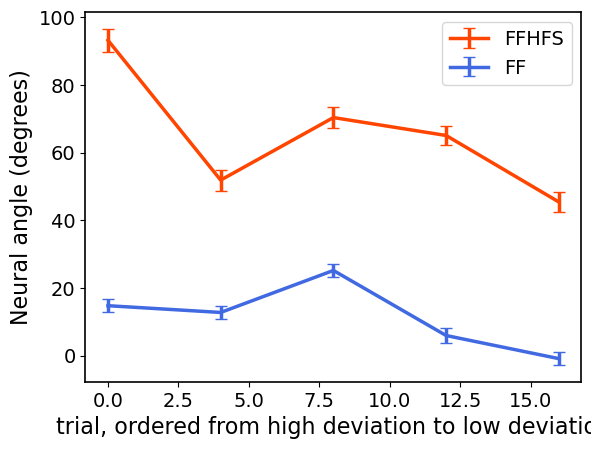

In [144]:
xpos = np.array([0,4,8,12,16])

plt.rcParams['svg.fonttype'] = 'none'


plt.errorbar(xpos[::-1], np.array(ang_thru_dev_ffhfs_avg- compute_angle_average(avg_angles[3]))*180/np.pi, yerr = np.array(ang_thru_dev_ffhfs_err)*180/np.pi, color = 'orangered', label = 'FFHFS', capsize = 4)
plt.errorbar(xpos[::-1], (np.array(ang_thru_dev_ff_avg)-compute_angle_average(avg_angles[2]))*180/np.pi,  yerr = np.array(ang_thru_dev_ff_err)*180/np.pi, color = 'royalblue', label = 'FF', capsize = 4)
plt.legend()
plt.ylabel('Neural angle (degrees)')
plt.xlabel('trial, ordered from high deviation to low deviation')
#plt.savefig('Angular_dev_thru_maxdev_with_standard_error_rel_to_cont_and_hfs_'+monkey+'.pdf', transparent=True, bbox_inches="tight")

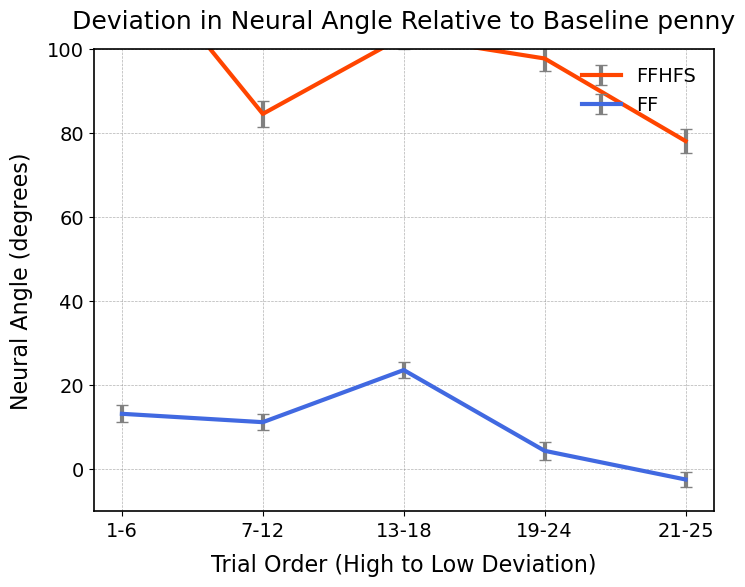

In [145]:
# Sample data, replace with actual data
xpos = np.array([0, 4, 8, 12, 16])  # X positions for data points

# Plotting Parameters
plt.figure(figsize=(8, 6))
plt.rcParams.update({
    'svg.fonttype': 'none',
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'lines.linewidth': 2.5,
    'axes.linewidth': 1.2,
})

# Inverting the order of xpos to follow the high-to-low convention
x_ordered = xpos[::-1]

# Plotting the FFHFS and FF error bars with enhanced styling
plt.errorbar(x_ordered, 
             np.array(ang_thru_dev_ffhfs_avg-compute_angle_average(ang_reor_hfs[(rr_reor_hfs>rr_thresh)]))*180/np.pi,
             yerr=np.array(ang_thru_dev_ffhfs_err) * 180 / np.pi,
             color='orangered', label='FFHFS', 
             capsize=4, ecolor='grey', linewidth=3)

plt.errorbar(x_ordered, 
             (np.array(ang_thru_dev_ff_avg)-compute_angle_average(ang_reor_cont1[(rr_reor_cont1>rr_thresh)]))*180/np.pi,
             yerr=np.array(ang_thru_dev_ff_err) * 180 / np.pi,
             color='royalblue', label='FF', 
             capsize=4, ecolor='grey', linewidth=3)

plt.ylim((-10,100))

# Customizations for aesthetics
plt.ylabel('Neural Angle (degrees)', fontsize=16, labelpad=10)
plt.xlabel('Trial Order (High to Low Deviation)', fontsize=16, labelpad=10)
plt.title('Deviation in Neural Angle Relative to Baseline '+monkey, fontsize=18, pad=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.6)
plt.legend(loc='upper right', frameon=False)
plt.xticks(xpos, ['1-6','7-12','13-18','19-24','21-25'])

# Saving as high-resolution SVG
#plt.savefig('Rev1_angular_Deviation_through_maxdev_'+monkey+'_targets_'+str(targets_to_consider)+'start2800_stop3000'+'.svg', transparent=True, bbox_inches="tight", dpi=300)
#plt.savefig('Rev1_angular_Deviation_through_maxdev_'+monkey+'_targets_'+str(targets_to_consider)+'start2800_stop3000'+'.pdf', transparent=True, bbox_inches="tight", dpi=300)
plt.show()


# SNRs

In [52]:
# times during the preparation period at whcih we pick the SNRs
times_start_sophie = [0, 80, 55, 90, 0, 70, 65, 40]
times_end_sophie = [0, 85, 60, 95, 0, 75, 70, 45]

times_start_penny = [80, 65, 85, 65, 95, 50, 60, 60]
times_end_penny = [85, 70, 90, 70, 100, 55, 65, 65]

## For Penny

In [3]:
monkey = 'penny'
snrs = np.load('snrs_'+monkey+'_go_validt_tr_ordering_no_binning_windowsize_10.npy')
times = np.arange(2000, 3300, 10)

targets_to_consider = [1,2,3,5,6,7]

snrs_ff = snrs[:,:,0,:]
snrs_ffhfs = snrs[:,:,1,:]

intercepts_ff_penny = []
slopes_ff_penny = []
intercepts_ffhfs_penny = []
slopes_ffhfs_penny = []
for target in targets_to_consider:
    xpos = np.linspace(0,25,num=25)
    FF_reg = linregress(xpos, snrs_ff[times_start_penny[target]:times_end_penny[target],:,target].mean(axis=(0)) )
    FFHFS_reg = linregress(xpos, snrs_ffhfs[times_start_penny[target]:times_end_penny[target],:,target].mean(axis=(0)) )
    intercepts_ff_penny.append(FF_reg.intercept)
    slopes_ff_penny.append(FF_reg.slope)
    intercepts_ffhfs_penny.append(FFHFS_reg.intercept)
    slopes_ffhfs_penny.append(FFHFS_reg.slope)
    


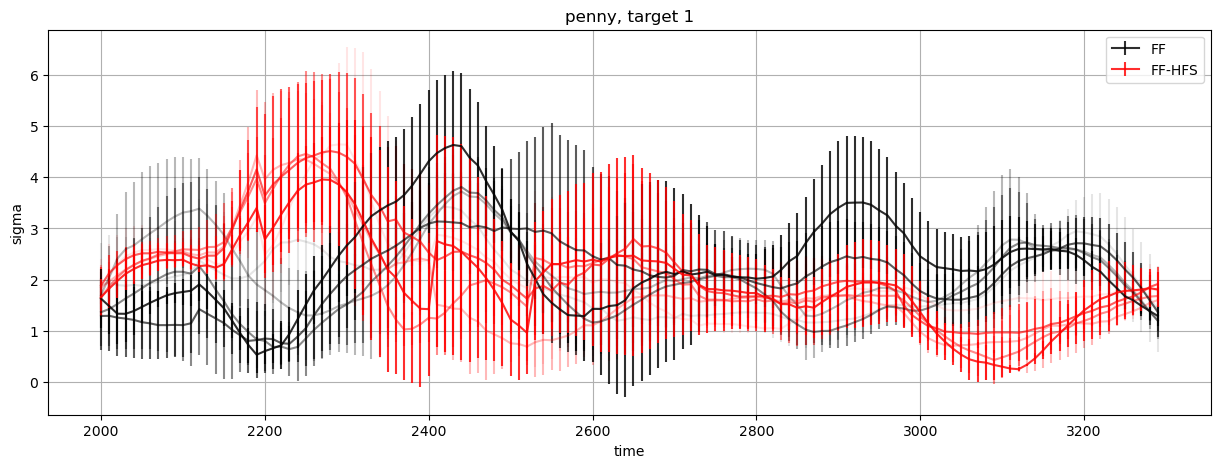

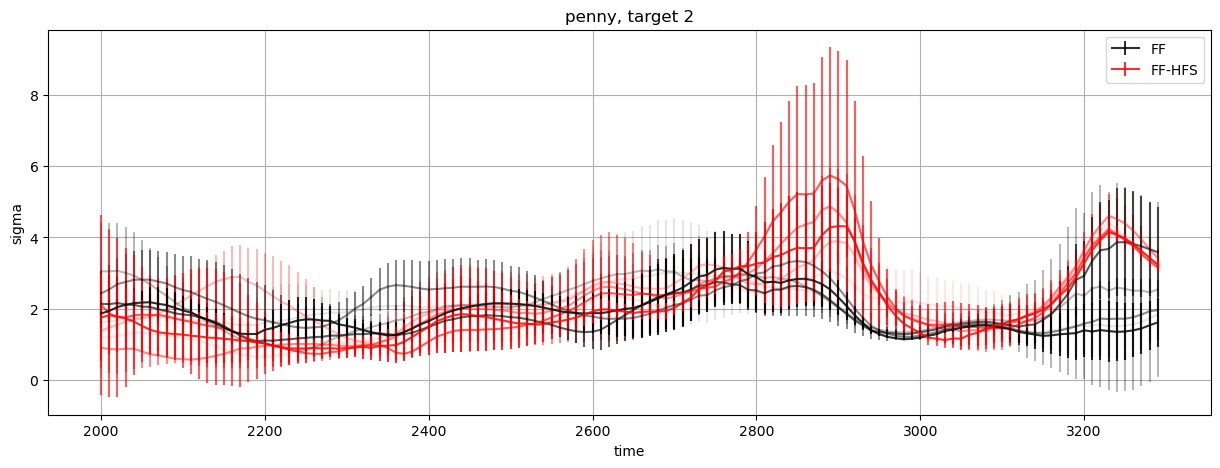

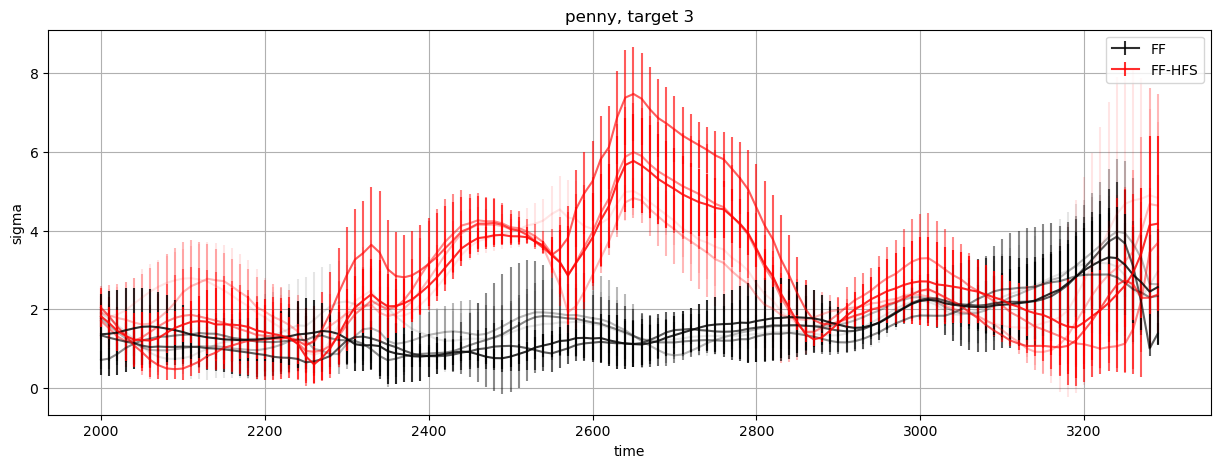

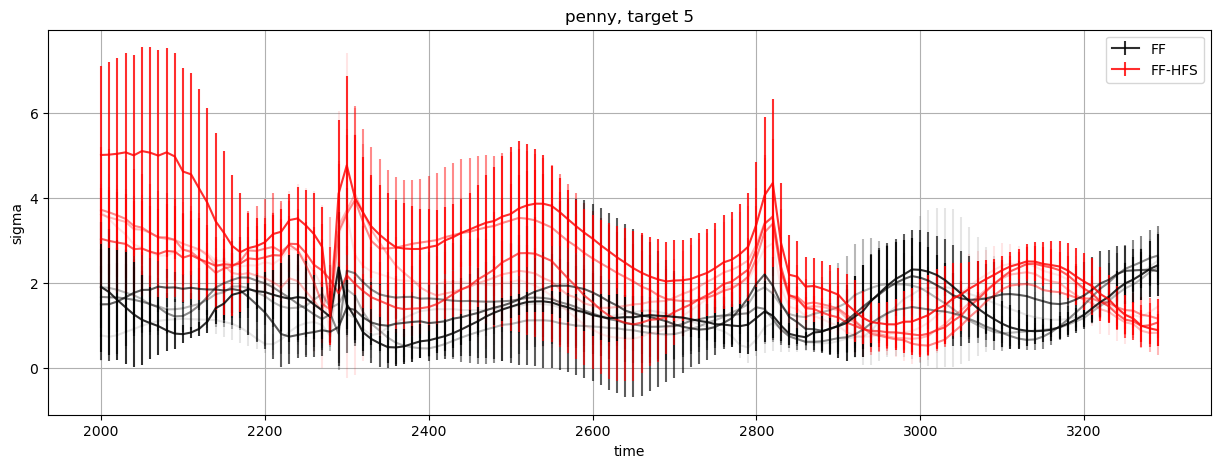

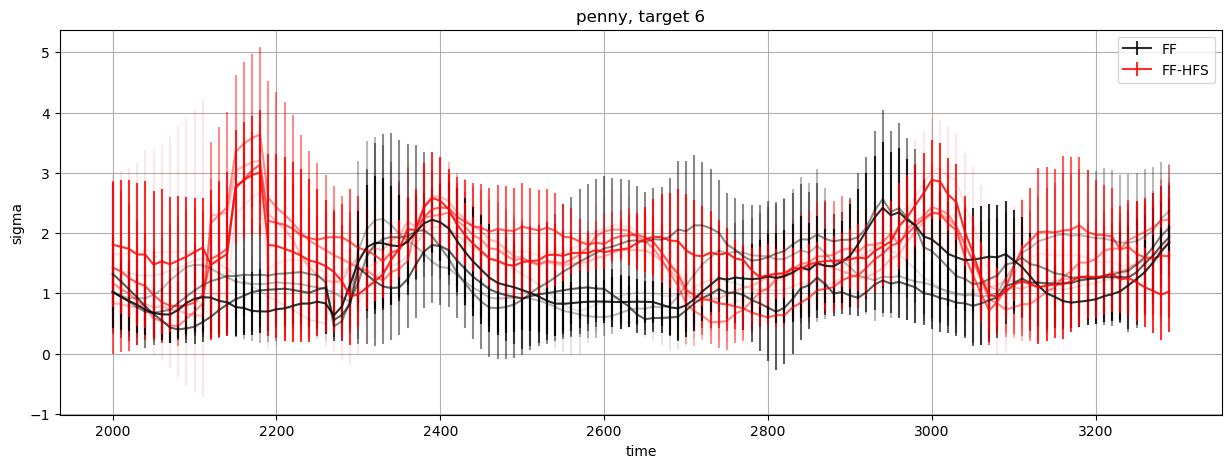

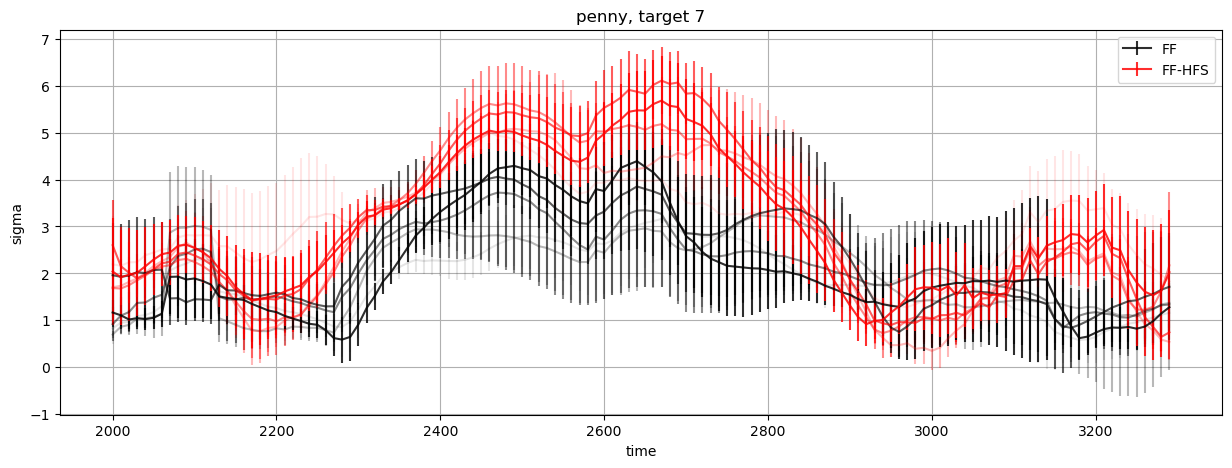

In [4]:
for target in targets_to_consider:

    plt.figure(figsize = (15,5))

    for tr_bin in range(4):
        plt.errorbar(times, snrs_ff[:,5*tr_bin:5*(tr_bin+1),[target]].mean(axis=(1,2)), yerr = snrs_ff[:,5*tr_bin:5*(tr_bin+1),[target]].mean(axis=(2)).std(axis=1), c='k', alpha = 0.1+0.18*tr_bin)
        plt.errorbar(times, snrs_ffhfs[:,5*tr_bin:5*(tr_bin+1),[target]].mean(axis=(1,2)), yerr = snrs_ffhfs[:,5*tr_bin:5*(tr_bin+1),[target]].mean(axis=(2)).std(axis=1), c='r', alpha = 0.1+0.18*tr_bin)

    tr_bin = 4
    plt.rcParams['svg.fonttype'] = 'none'

    plt.errorbar(times, snrs_ff[:,5*tr_bin:5*(tr_bin+1),[target]].mean(axis=(1,2)), yerr = snrs_ff[:,5*tr_bin:5*(tr_bin+1),[target]].mean(axis=(2)).std(axis=1), c='k', alpha = 0.1+0.18*tr_bin, label = 'FF')
    plt.errorbar(times, snrs_ffhfs[:,5*tr_bin:5*(tr_bin+1),[target]].mean(axis=(1,2)), yerr = snrs_ffhfs[:,5*tr_bin:5*(tr_bin+1),[target]].mean(axis=(2)).std(axis=1), c='r', alpha = 0.1+0.18*tr_bin, label = 'FF-HFS')

    plt.ylabel('sigma')
    plt.xlabel('time')
    plt.title(monkey+', target %s'%target)
    plt.legend()
    plt.grid()
    #plt.savefig(monkey+'_SNR_target%s_time.svg'%target, transparent=True, bbox_inches="tight")
    
    
    
    


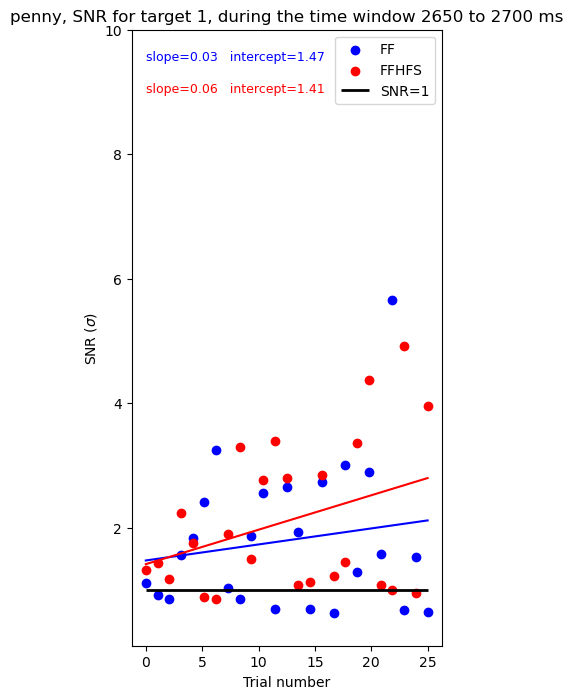

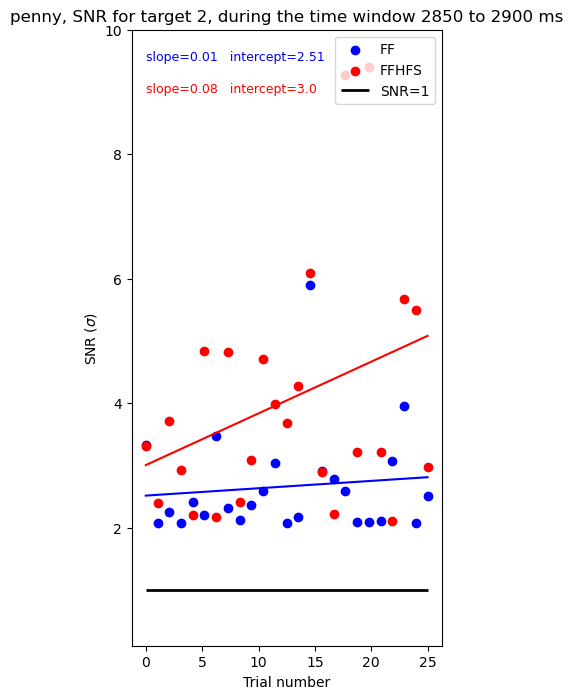

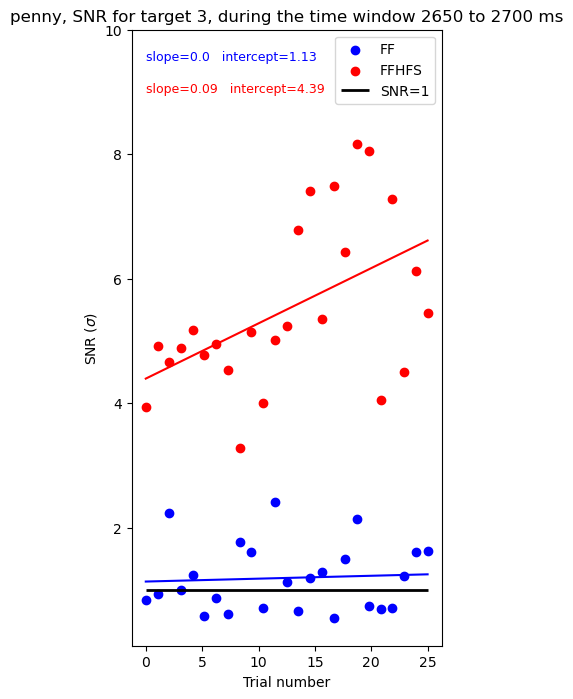

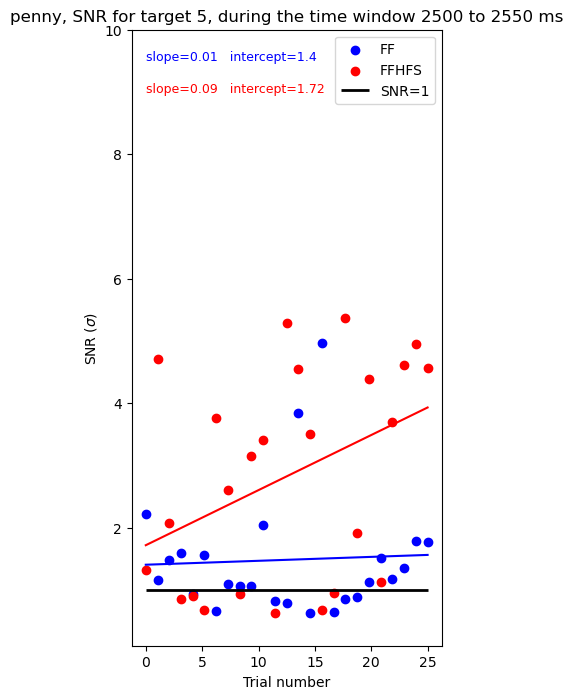

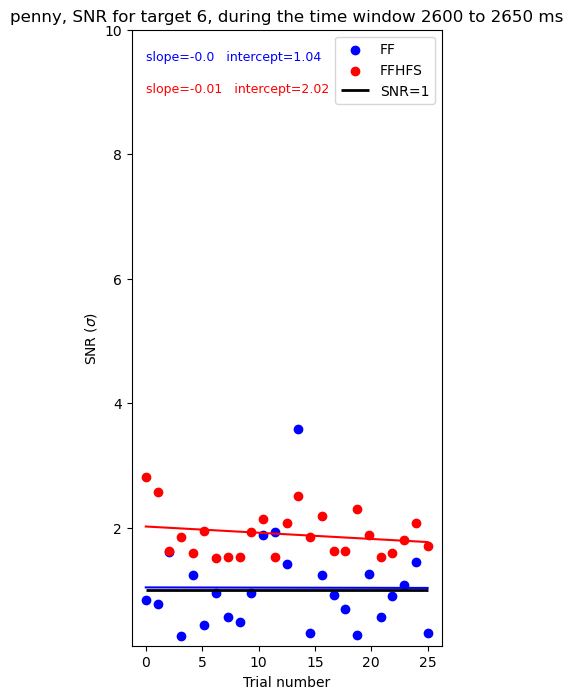

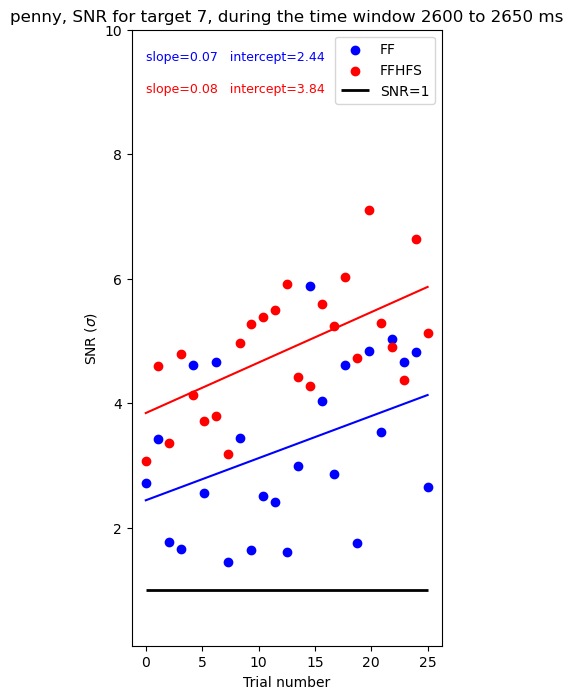

In [5]:
for target in targets_to_consider:
    t_start , t_end = times_start_penny[target], times_end_penny[target]
    
    xpos = np.linspace(0,25,num=25)
    FF_reg = linregress(xpos, snrs_ff[times_start_penny[target]:times_end_penny[target],:,target].mean(axis=(0)) )
    FFHFS_reg = linregress(xpos, snrs_ffhfs[times_start_penny[target]:times_end_penny[target],:,target].mean(axis=(0)) )
    
    plt.figure(figsize = (4,8))
    plt.rcParams['svg.fonttype'] = 'none'

    plt.scatter(xpos, snrs_ff[t_start:t_end,:,[target]].mean(axis=(0,2)), c='blue', label ='FF')
    plt.scatter(xpos, snrs_ffhfs[t_start:t_end,:,[target]].mean(axis=(0,2)), c='red', label = 'FFHFS')

    plt.plot(xpos, xpos*FF_reg.slope+FF_reg.intercept, c = 'blue')
    plt.plot(xpos, xpos*FFHFS_reg.slope+FFHFS_reg.intercept, c='red')

    plt.hlines(y=1, xmin = 0, xmax=25, linewidth = 2, color='k', label = 'SNR=1')
    plt.ylim((0.1,10))

    plt.text(0,9.5, 'slope=%s   intercept=%s'%(np.round(FF_reg.slope, 2), np.round(FF_reg.intercept,2)), color = 'blue', size = 9)
    plt.text(0,9, 'slope=%s   intercept=%s'%(np.round(FFHFS_reg.slope, 2), np.round(FFHFS_reg.intercept,2)), color = 'red', size = 9)


    plt.legend(loc='upper right')
    plt.ylabel('SNR ($\sigma$)')
    plt.xlabel('Trial number')
    plt.title(monkey+', SNR for target %s, during the time window %d to %d ms'%(target, times[t_start], times[t_end]))
    #plt.savefig(monkey+'_SNR_learning_target%s.svg'%target, transparent=True, bbox_inches="tight")

## For Sophie

In [6]:
monkey = 'sophie'
snrs = np.load('snrs_'+monkey+'_go_validt_tr_ordering_no_binning_windowsize_10.npy')
times = np.arange(2000, 3300, 10)

targets_to_consider = [1,2,3,5,6,7]

snrs_ff = snrs[:,:,0,:]
snrs_ffhfs = snrs[:,:,1,:]

intercepts_ff_sophie = []
slopes_ff_sophie = []
intercepts_ffhfs_sophie = []
slopes_ffhfs_sophie = []
for target in targets_to_consider:
    xpos = np.linspace(0,25,num=25)
    FF_reg = linregress(xpos, snrs_ff[times_start_sophie[target]:times_end_sophie[target],:,target].mean(axis=(0)) )
    FFHFS_reg = linregress(xpos, snrs_ffhfs[times_start_sophie[target]:times_end_sophie[target],:,target].mean(axis=(0)) )
    intercepts_ff_sophie.append(FF_reg.intercept)
    slopes_ff_sophie.append(FF_reg.slope)
    intercepts_ffhfs_sophie.append(FFHFS_reg.intercept)
    slopes_ffhfs_sophie.append(FFHFS_reg.slope)

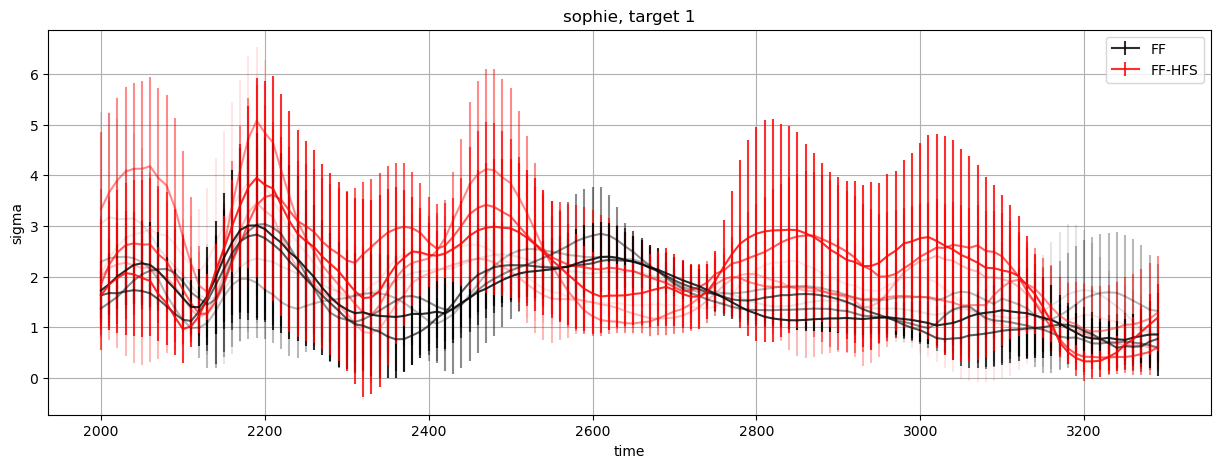

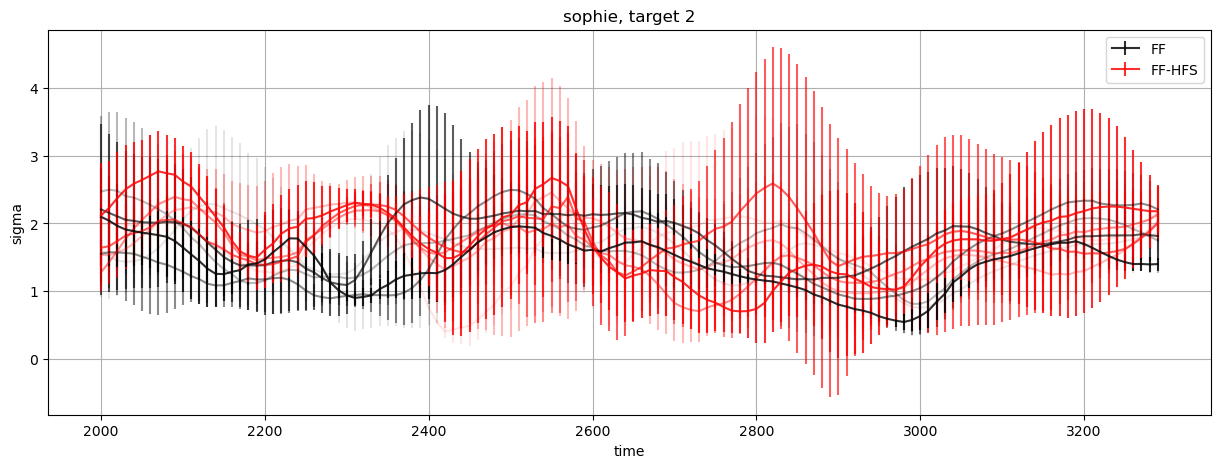

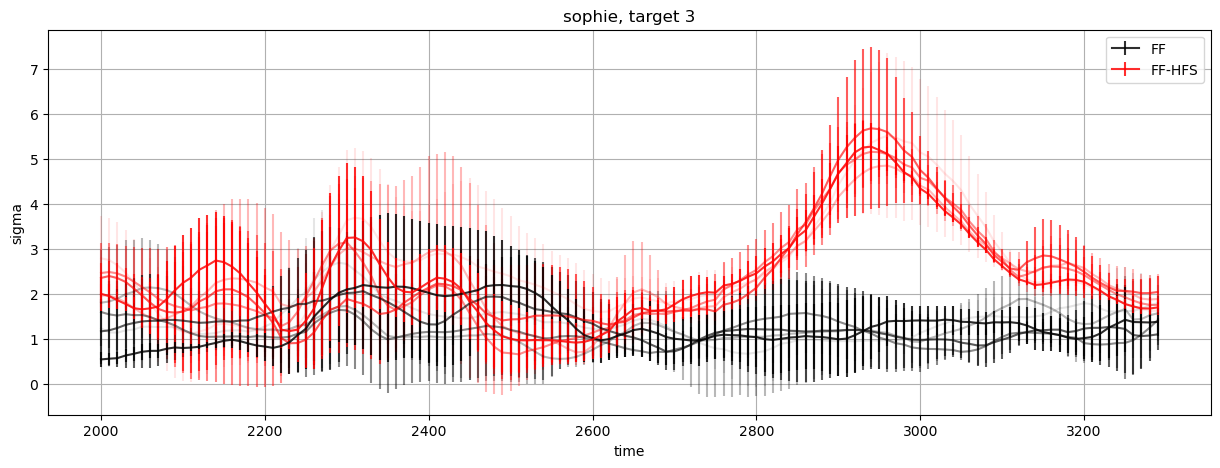

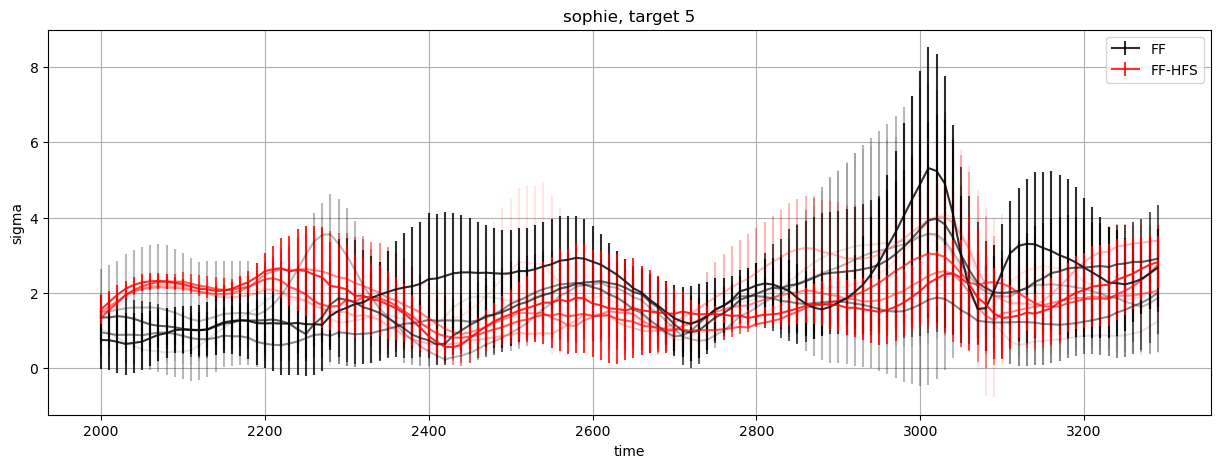

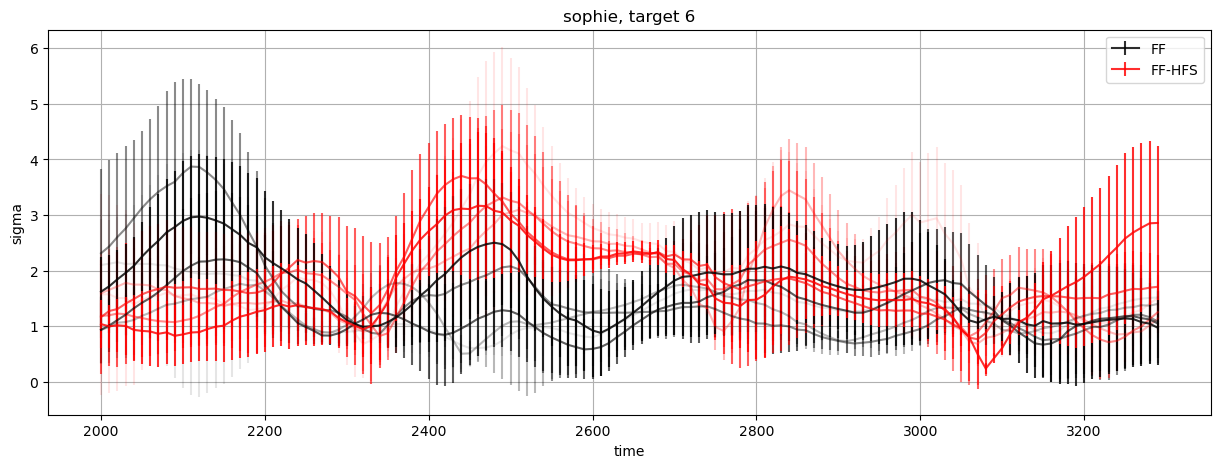

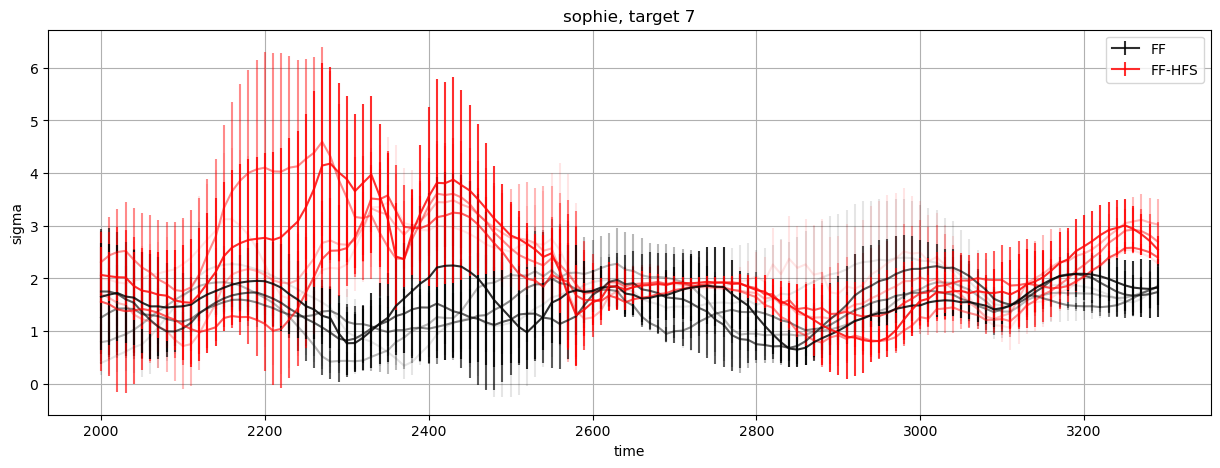

In [7]:
for target in targets_to_consider:

    plt.figure(figsize = (15,5))

    for tr_bin in range(4):
        plt.errorbar(times, snrs_ff[:,5*tr_bin:5*(tr_bin+1),[target]].mean(axis=(1,2)), yerr = snrs_ff[:,5*tr_bin:5*(tr_bin+1),[target]].mean(axis=(2)).std(axis=1), c='k', alpha = 0.1+0.18*tr_bin)
        plt.errorbar(times, snrs_ffhfs[:,5*tr_bin:5*(tr_bin+1),[target]].mean(axis=(1,2)), yerr = snrs_ffhfs[:,5*tr_bin:5*(tr_bin+1),[target]].mean(axis=(2)).std(axis=1), c='r', alpha = 0.1+0.18*tr_bin)

    tr_bin = 4
    plt.rcParams['svg.fonttype'] = 'none'
    plt.errorbar(times, snrs_ff[:,5*tr_bin:5*(tr_bin+1),[target]].mean(axis=(1,2)), yerr = snrs_ff[:,5*tr_bin:5*(tr_bin+1),[target]].mean(axis=(2)).std(axis=1), c='k', alpha = 0.1+0.18*tr_bin, label = 'FF')
    plt.errorbar(times, snrs_ffhfs[:,5*tr_bin:5*(tr_bin+1),[target]].mean(axis=(1,2)), yerr = snrs_ffhfs[:,5*tr_bin:5*(tr_bin+1),[target]].mean(axis=(2)).std(axis=1), c='r', alpha = 0.1+0.18*tr_bin, label = 'FF-HFS')

    plt.ylabel('sigma')
    plt.xlabel('time')
    plt.title(monkey+', target %s'%target)
    plt.legend()
    plt.grid()
    #plt.savefig(monkey+'_SNR_target%s_time.svg'%target, transparent=True, bbox_inches="tight")
    
    
    
    


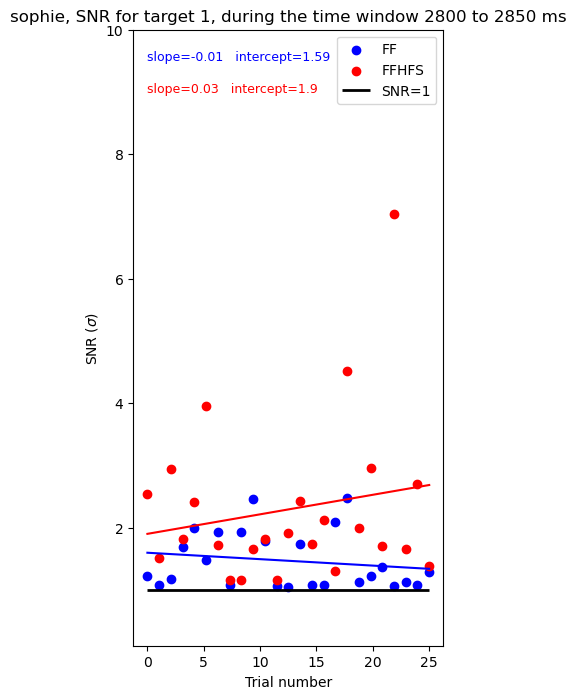

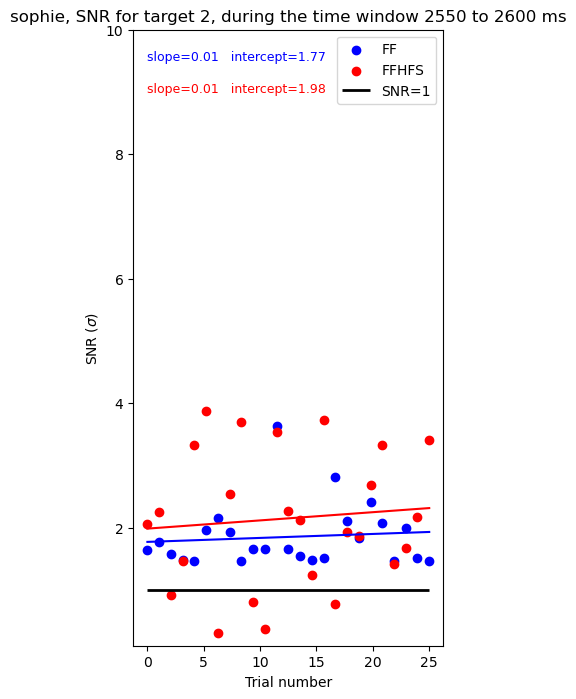

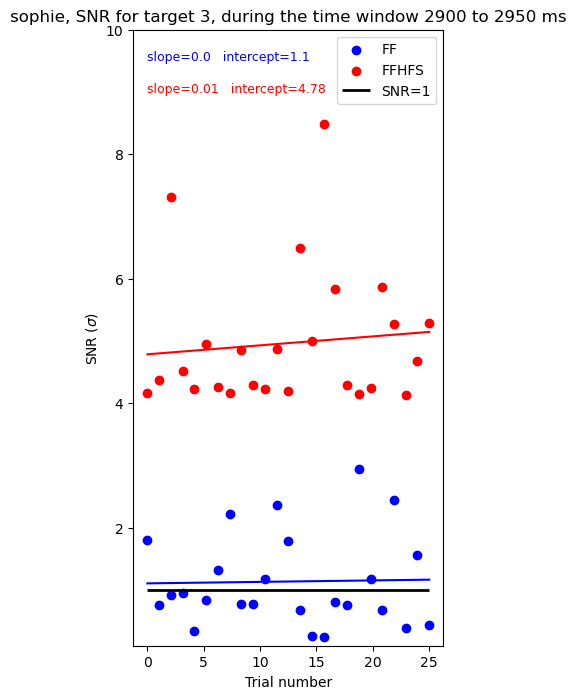

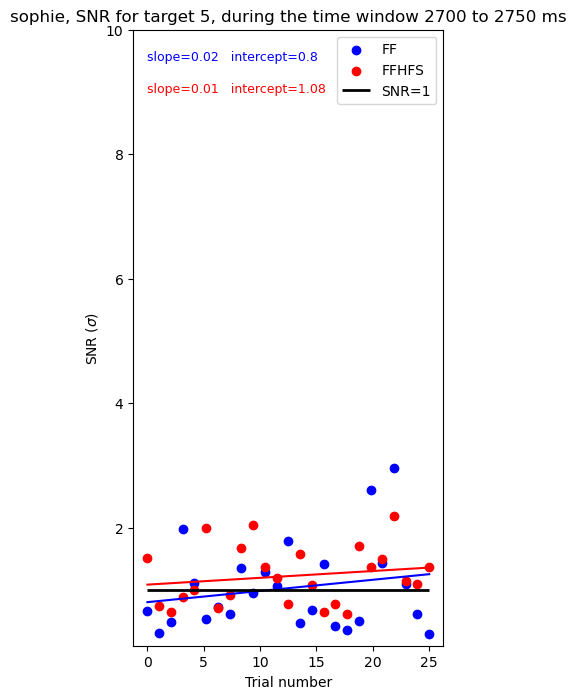

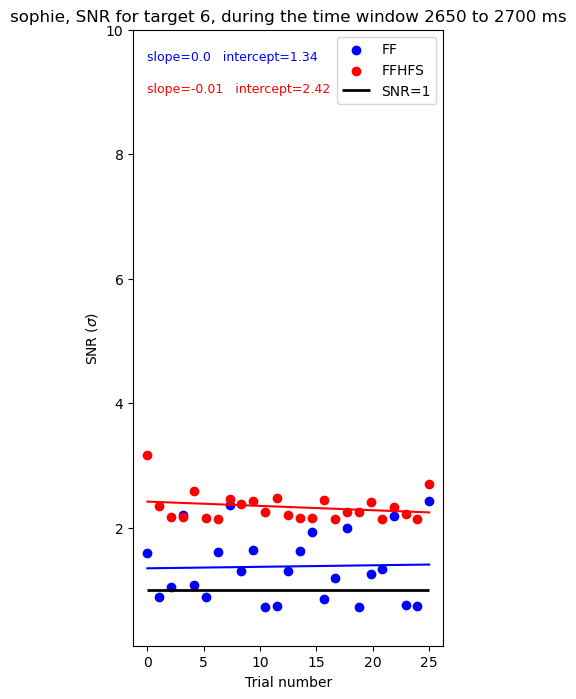

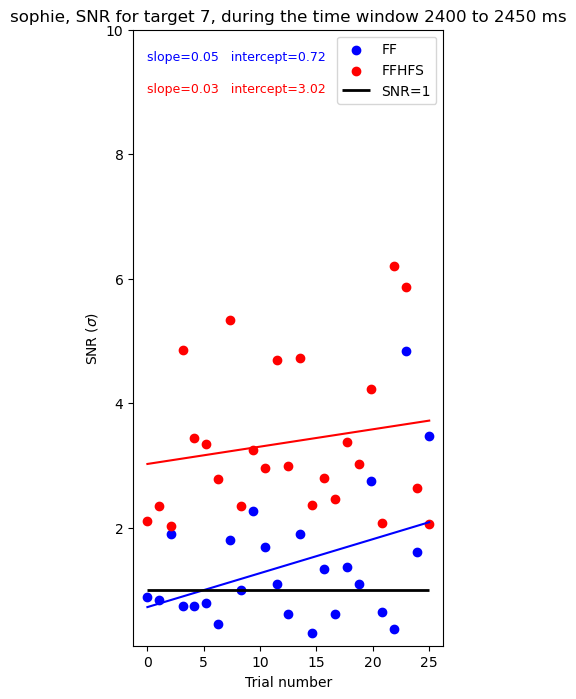

In [8]:
for target in targets_to_consider:
    t_start , t_end = times_start_sophie[target], times_end_sophie[target]
    
    xpos = np.linspace(0,25,num=25)
    FF_reg = linregress(xpos, snrs_ff[times_start_sophie[target]:times_end_sophie[target],:,target].mean(axis=(0)) )
    FFHFS_reg = linregress(xpos, snrs_ffhfs[times_start_sophie[target]:times_end_sophie[target],:,target].mean(axis=(0)) )
    
    plt.figure(figsize = (4,8))
    plt.rcParams['svg.fonttype'] = 'none'

    plt.scatter(xpos, snrs_ff[t_start:t_end,:,[target]].mean(axis=(0,2)), c='blue', label ='FF')
    plt.scatter(xpos, snrs_ffhfs[t_start:t_end,:,[target]].mean(axis=(0,2)), c='red', label = 'FFHFS')

    plt.plot(xpos, xpos*FF_reg.slope+FF_reg.intercept, c = 'blue')
    plt.plot(xpos, xpos*FFHFS_reg.slope+FFHFS_reg.intercept, c='red')

    plt.hlines(y=1, xmin = 0, xmax=25, linewidth = 2, color='k', label = 'SNR=1')
    plt.ylim((0.1,10))

    plt.text(0,9.5, 'slope=%s   intercept=%s'%(np.round(FF_reg.slope, 2), np.round(FF_reg.intercept,2)), color = 'blue', size = 9)
    plt.text(0,9, 'slope=%s   intercept=%s'%(np.round(FFHFS_reg.slope, 2), np.round(FFHFS_reg.intercept,2)), color = 'red', size = 9)


    plt.legend(loc='upper right')
    plt.ylabel('SNR ($\sigma$)')
    plt.xlabel('Trial number')
    plt.title(monkey+', SNR for target %s, during the time window %d to %d ms'%(target, times[t_start], times[t_end]))
    #plt.savefig(monkey+'_SNR_learning_target%s.svg'%target, transparent=True, bbox_inches="tight")

## DC plot

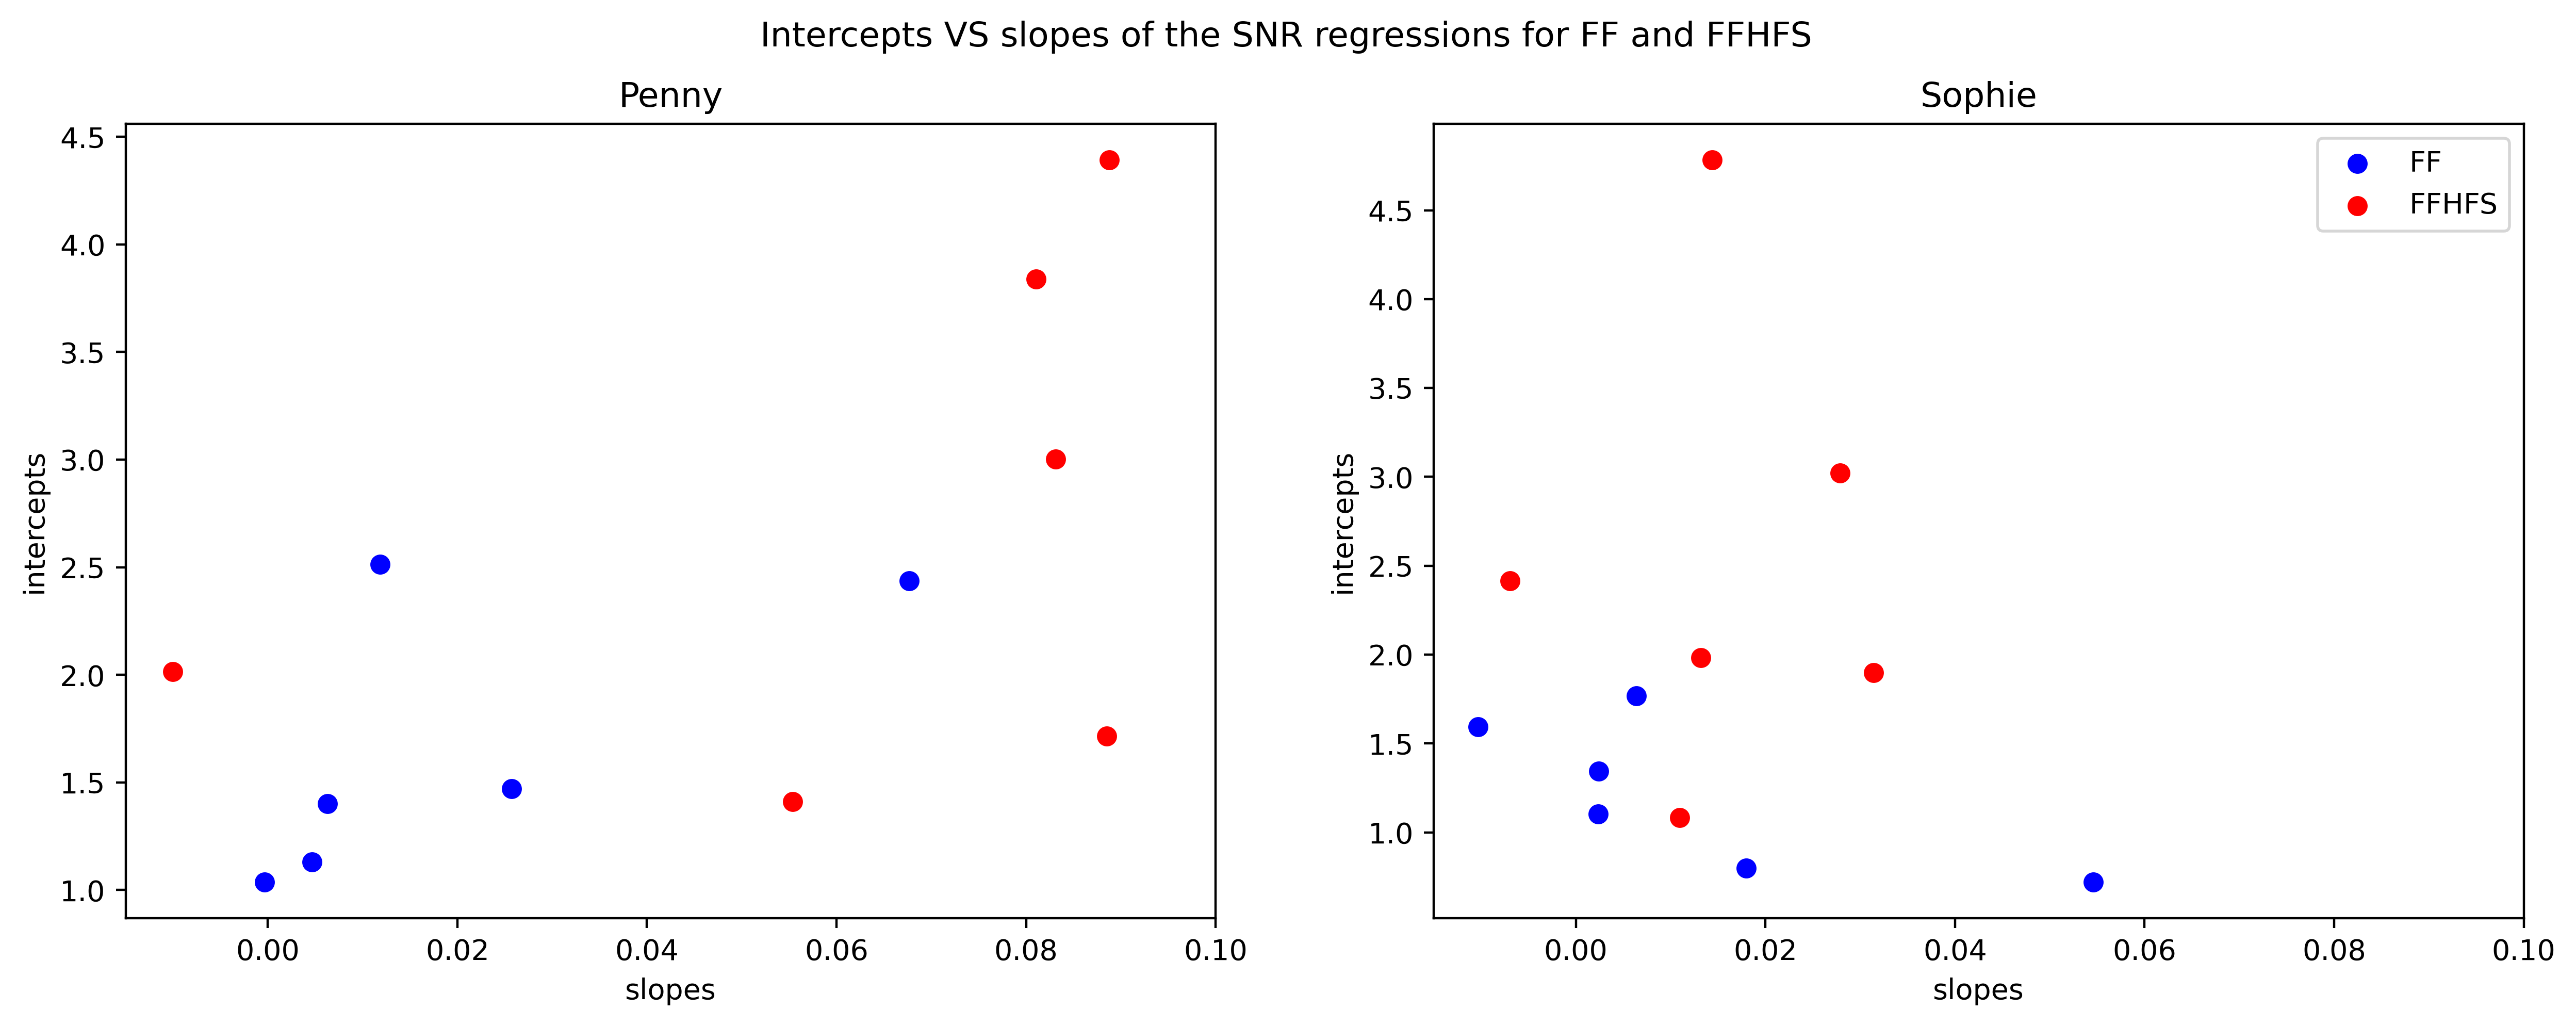

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15,5), dpi = 400)
plt.rcParams['svg.fonttype'] = 'none'
ax[0].scatter(slopes_ff_penny, intercepts_ff_penny, label = 'FF', color = 'blue')
ax[0].scatter(slopes_ffhfs_penny, intercepts_ffhfs_penny, label = 'FFHFS', color= 'red')
ax[0].set_ylabel('intercepts')
ax[0].set_xlabel('slopes')
ax[0].set_xlim(-0.015, 0.1)
ax[0].set_title('Penny')

ax[1].scatter(slopes_ff_sophie, intercepts_ff_sophie, label = 'FF', color = 'blue')
ax[1].scatter(slopes_ffhfs_sophie, intercepts_ffhfs_sophie, label = 'FFHFS', color = 'red')
ax[1].set_ylabel('intercepts')
ax[1].set_xlabel('slopes')
ax[1].set_xlim(-0.015, 0.1)
ax[1].set_title('Sophie')

plt.legend()
plt.suptitle('Intercepts VS slopes of the SNR regressions for FF and FFHFS')
#plt.savefig('Intercept_VS_slope_target%s.svg'%targets_to_consider, transparent=True, bbox_inches="tight")